# Team 12: Final Code

In [49]:
# INSTALLS AND IMPORTS
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("dplyr")) install.packages("dplyr")
if (!require("corrplot")) install.packages("corrplot")
if (!require("pROC")) install.packages("pROC")
if (!require("neuralnet")) install.packages("neuralnet")
if (!require("rsample")) install.packages("rsample")
if (!require("caret")) install.packages("caret")
if (!require("tidyverse")) install.packages("tidyverse")
if (!require("car")) install.packages("car")
if (!require("SSBtools")) install.packages("SSBtools")
if (!require("moments")) install.packages("moments")
if (!require("rpart.plot")) install.packages("rpart.plot")

In [50]:
library(ggplot2)
library(dplyr)
library(MASS)
library(corrplot)
library(pROC)
library(neuralnet)
library(rsample)
library(caret)
library(tidyverse)
library(car)
library(SSBtools)
library(moments)
library(rpart)
library("rpart.plot")

options(repr.plot.width=20, repr.plot.height=8)
options(warn=-1)


In [3]:
# reading the data set and taking a look at the preview
approval_ds <- read.csv("credit_dataset.csv")
head(approval_ds, n=10)

Gender Age   Debt   Married BankCustomer Industry              Ethnicity
1  1      30.83  0.000 1       1            Industrials           White    
2  0      58.67  4.460 1       1            Materials             Black    
3  0      24.50  0.500 1       1            Materials             Black    
4  1      27.83  1.540 1       1            Industrials           White    
5  1      20.17  5.625 1       1            Industrials           White    
6  1      32.08  4.000 1       1            CommunicationServices White    
7  1      33.17  1.040 1       1            Transport             Black    
8  0      22.92 11.585 1       1            InformationTechnology White    
9  1      54.42  0.500 0       0            Financials            Black    
10 1      42.50  4.915 0       0            Industrials           White    
   YearsEmployed PriorDefault Employed CreditScore DriversLicense Citizen     
1  1.250         1            1        1           0              ByBirth     
2  3.040         1            1        6           0              ByBirth     
3  1.500         1            0        0           0              ByBirth     
4  3.750         1            1        5           1              ByBirth     
5  1.710         1            0        0           0              ByOtherMeans
6  2.500         1            0        0           1              ByBirth     
7  6.500         1            0        0           1              ByBirth     
8  0.040         1            0        0           0              ByBirth     
9  3.960         1            0        0           0              ByBirth     
10 3.165         1            0        0           1              ByBirth     
   ZipCode Income Approved
1  202         0  1       
2   43       560  1       
3  280       824  1       
4  100         3  1       
5  120         0  1       
6  360         0  1       
7  164     31285  1       
8   80      1349  1       
9  180       314  1       
10  52      1442  1

## Data Manipulation

In [4]:

# renaming the approval dataset for further analysis
credit_data <- approval_ds
any(is.na(credit_data))
summary(credit_data)
###Data prepping . Converting category variables into factor for easier graphing. 
Gender_f <-factor(credit_data$Gender)
Approval_f <- factor(credit_data$Approved)
Married_f <-factor(credit_data$Married)
Bank_f <-factor(credit_data$BankCustomer)
Default_f <-factor(credit_data$PriorDefault)
Employed_f <-factor(credit_data$Employed)
Driver_license_f<-factor(credit_data$DriversLicense)

[1] FALSE

     Gender            Age             Debt           Married      
 Min.   :0.0000   Min.   :13.75   Min.   : 0.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:22.67   1st Qu.: 1.000   1st Qu.:1.0000  
 Median :1.0000   Median :28.46   Median : 2.750   Median :1.0000  
 Mean   :0.6957   Mean   :31.51   Mean   : 4.759   Mean   :0.7609  
 3rd Qu.:1.0000   3rd Qu.:37.71   3rd Qu.: 7.207   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :80.25   Max.   :28.000   Max.   :1.0000  
  BankCustomer      Industry          Ethnicity         YearsEmployed   
 Min.   :0.0000   Length:690         Length:690         Min.   : 0.000  
 1st Qu.:1.0000   Class :character   Class :character   1st Qu.: 0.165  
 Median :1.0000   Mode  :character   Mode  :character   Median : 1.000  
 Mean   :0.7638                                         Mean   : 2.223  
 3rd Qu.:1.0000                                         3rd Qu.: 2.625  
 Max.   :1.0000                                         Max.   :28.500  
  PriorDefaul

In [5]:
# checking if missing values exist
paste0("Gender: Null values - ",sum(is.na(approval_ds$Gender)))
paste0("Age: Null values - ",sum(is.na(approval_ds$Age)))
paste0("Debt: Null values - ",sum(is.na(approval_ds$Debt)))
paste0("Married: Null values - ",sum(is.na(approval_ds$Married)))
paste0("BankCustomer: Null values - ",sum(is.na(approval_ds$BankCustomer)))
paste0("Industry: Null values - ",sum(is.na(approval_ds$Industry)))
paste0("Ethnicity: Null values - ",sum(is.na(approval_ds$Ethnicity)))
paste0("YearsEmployed: Null values - ",sum(is.na(approval_ds$YearsEmployed)))
paste0("PriorDefault: Null values - ",sum(is.na(approval_ds$PriorDefault)))
paste0("Employed: Null values - ",sum(is.na(approval_ds$Employed)))
paste0("CreditScore: Null values - ",sum(is.na(approval_ds$CreditScore)))
paste0("DriversLicense: Null values - ",sum(is.na(approval_ds$DriversLicense)))
paste0("Citizen: Null values - ",sum(is.na(approval_ds$Citizen)))
paste0("ZipCode: Null values - ",sum(is.na(approval_ds$ZipCode)))
paste0("Income: Null values - ",sum(is.na(approval_ds$Income)))
paste0("Approved: Null values - ",sum(is.na(approval_ds$Approved)))

[1] "Gender: Null values - 0"

[1] "Age: Null values - 0"

[1] "Debt: Null values - 0"

[1] "Married: Null values - 0"

[1] "BankCustomer: Null values - 0"

[1] "Industry: Null values - 0"

[1] "Ethnicity: Null values - 0"

[1] "YearsEmployed: Null values - 0"

[1] "PriorDefault: Null values - 0"

[1] "Employed: Null values - 0"

[1] "CreditScore: Null values - 0"

[1] "DriversLicense: Null values - 0"

[1] "Citizen: Null values - 0"

[1] "ZipCode: Null values - 0"

[1] "Income: Null values - 0"

[1] "Approved: Null values - 0"

####   We can clearly see that there are not missing values in both dependent and independent variables to we dont have to perform data imputation

# Exploratory Data Analysis
----

### How income and credit score are varying with respect to credit approval

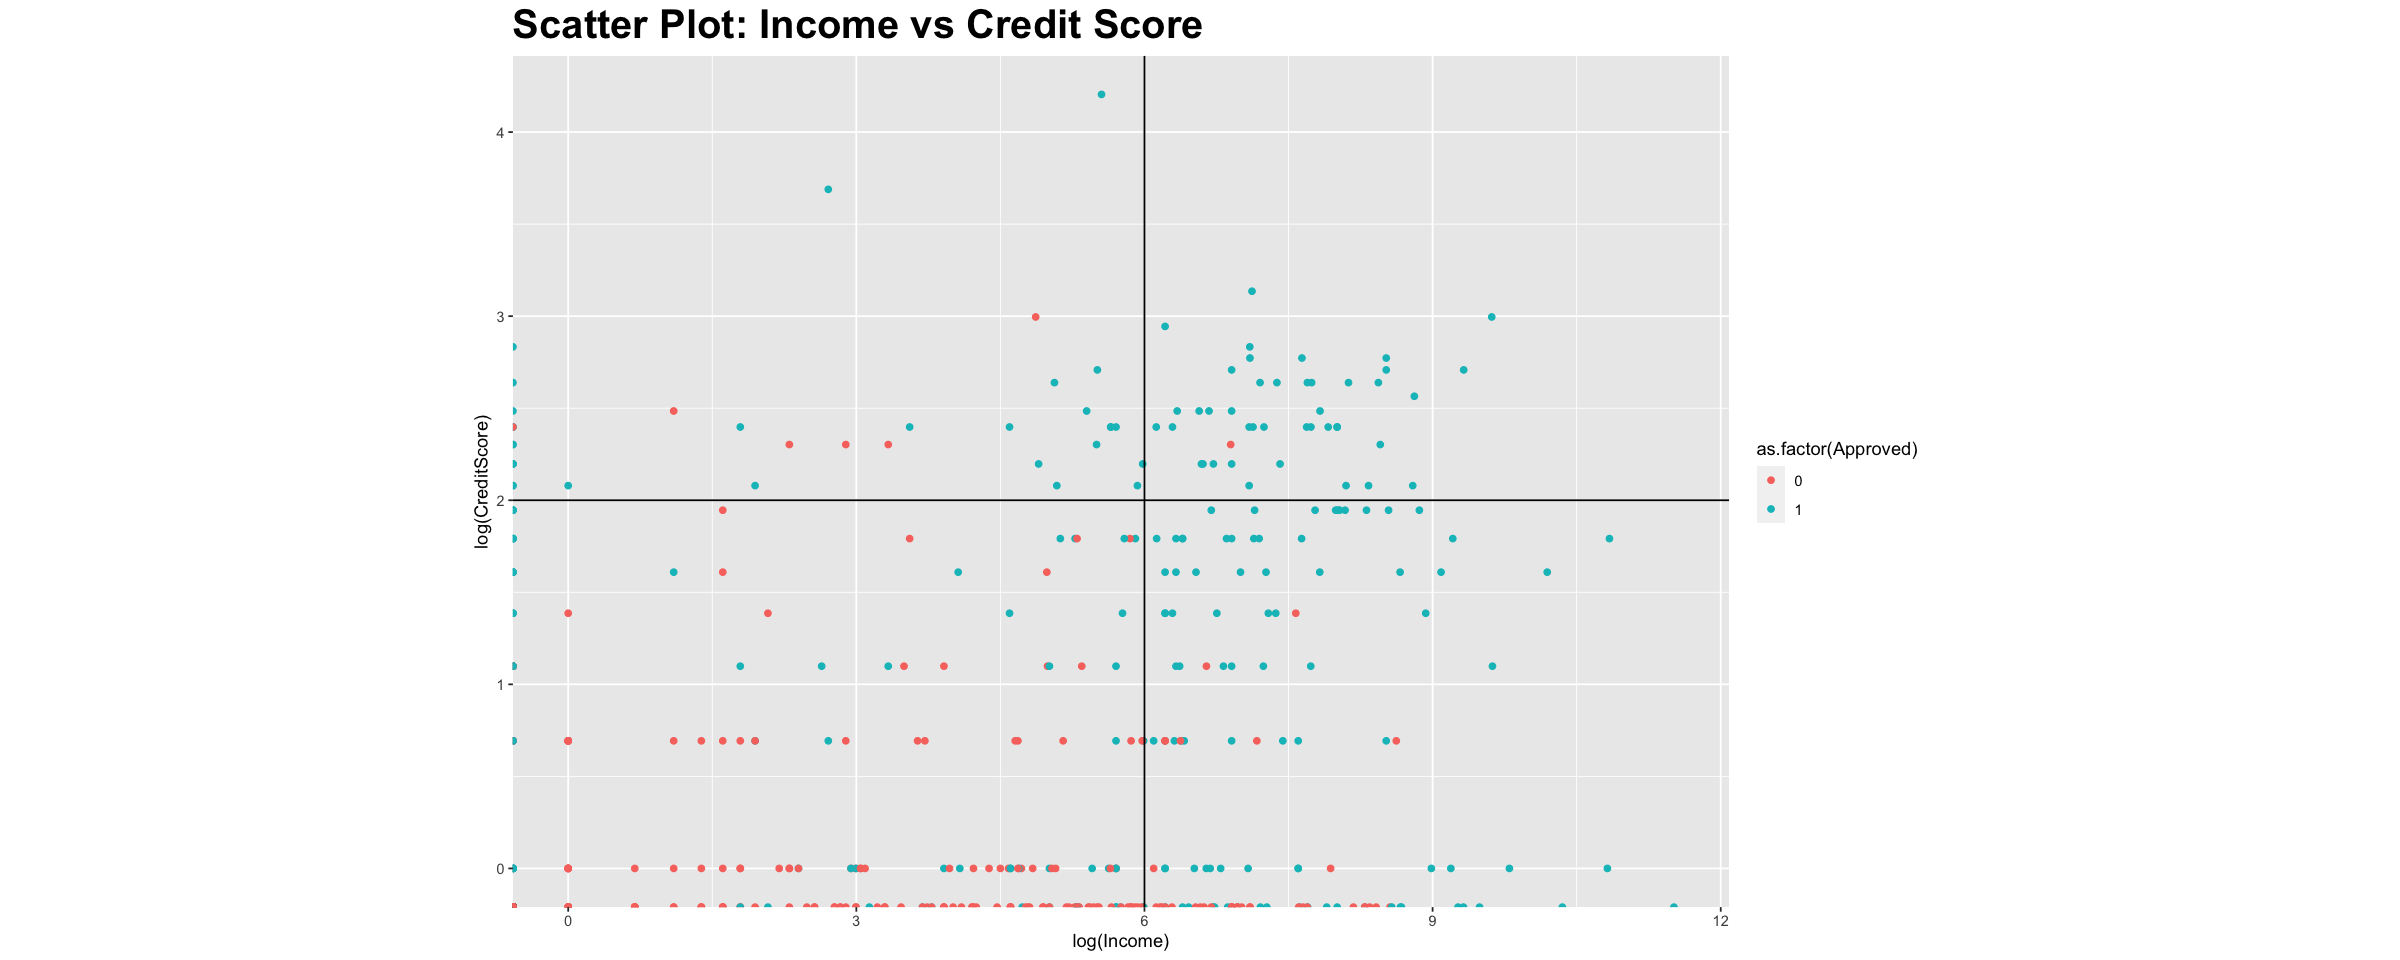

In [6]:
# SOLUTION BEGINS HERE
plt <- ggplot(approval_ds, aes( x = log(Income), y=log(CreditScore), col=as.factor(Approved))) +
  geom_point()
plt + ggtitle("Scatter Plot: Income vs Credit Score ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .7) +
geom_vline(xintercept = 6) + geom_hline(yintercept = 2) 
# SOLUTION ENDS HERE

### How Years Employed and credit score are varying with respect to credit approval

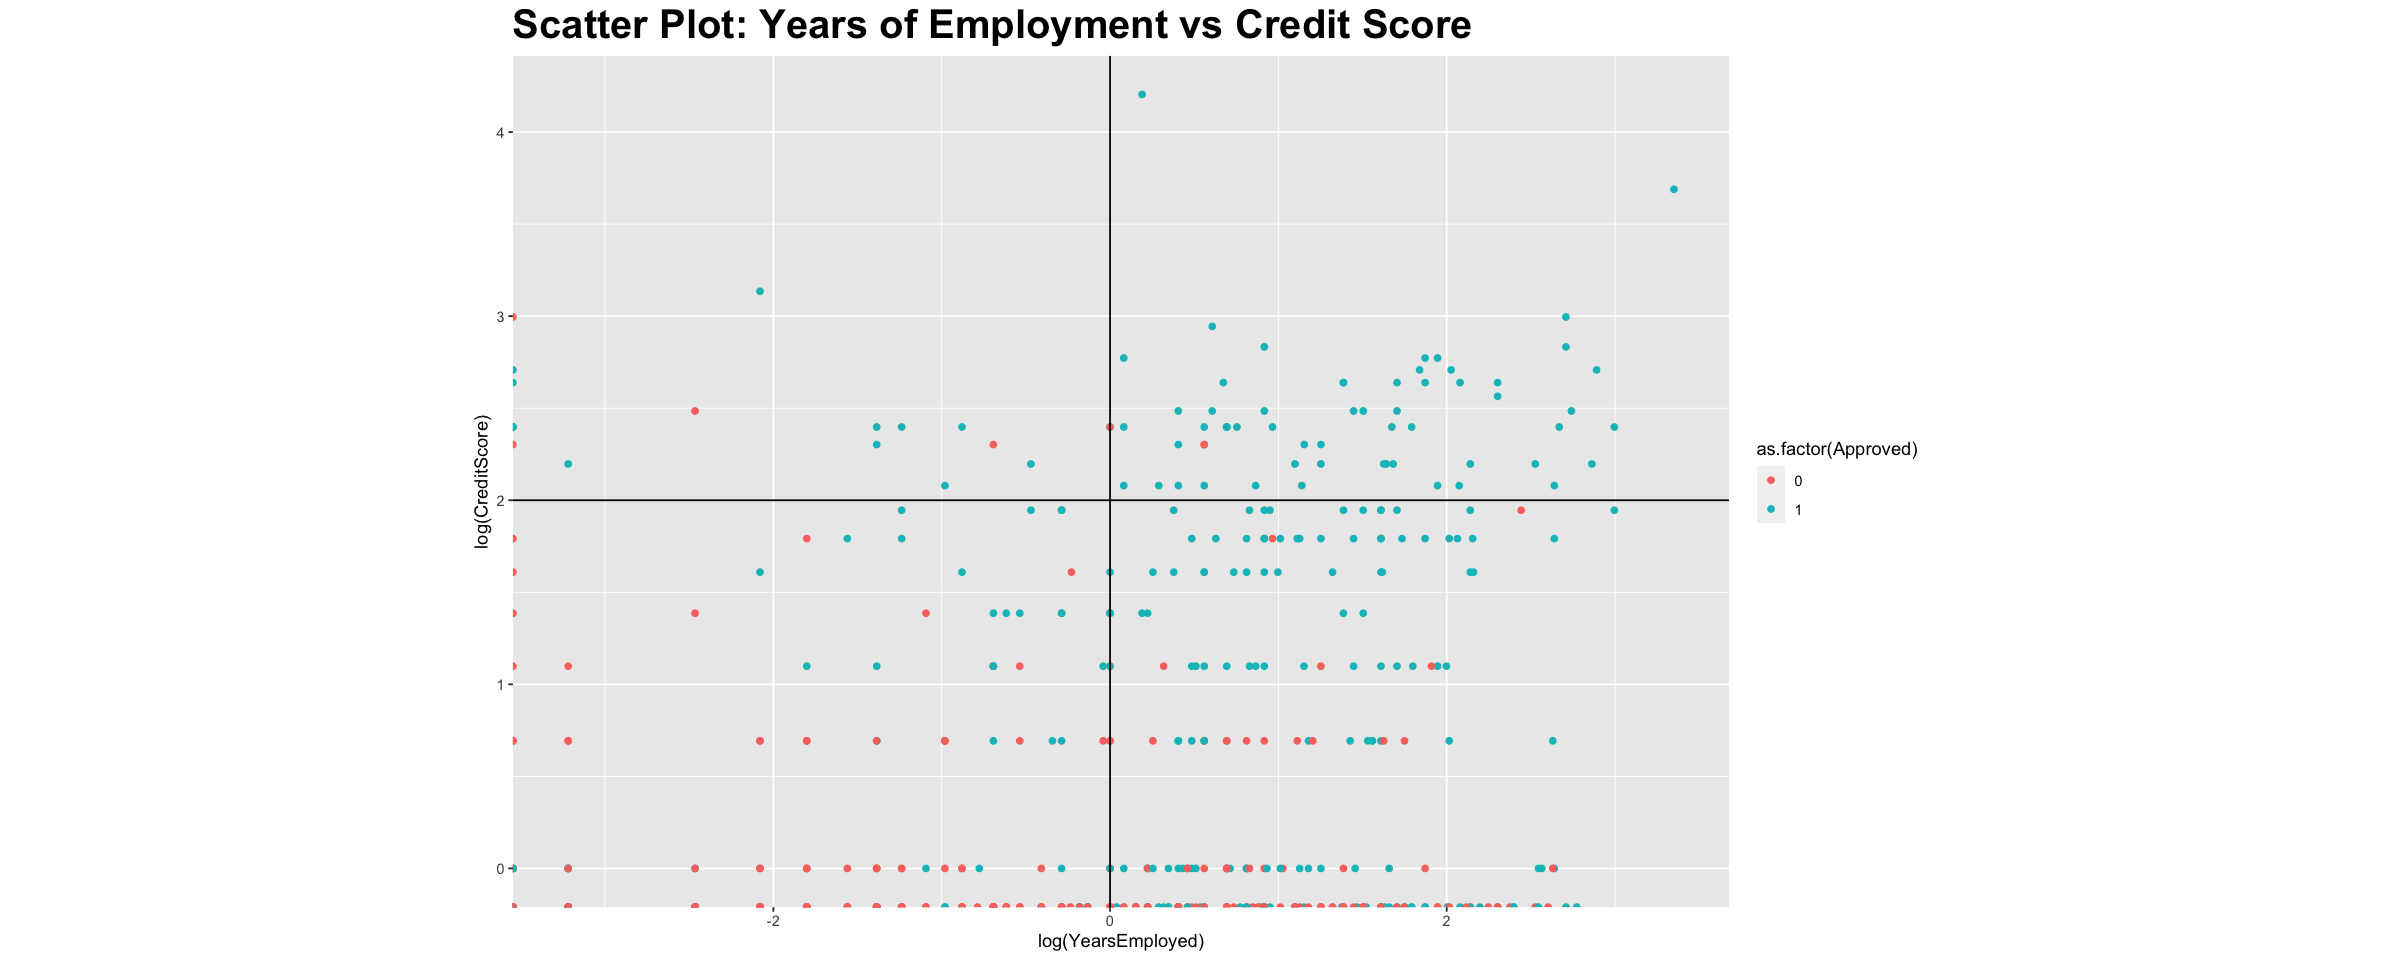

In [7]:
# SOLUTION BEGINS HERE
plt <- ggplot(approval_ds, aes( x = log(YearsEmployed), y=log(CreditScore), col=as.factor(Approved))) +
  geom_point()
plt + ggtitle("Scatter Plot: Years of Employment vs Credit Score ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .7) +
geom_vline(xintercept = 0) + geom_hline(yintercept = 2) 
# SOLUTION ENDS HERE

### How Years Employed and Age are varying with respect to credit approval

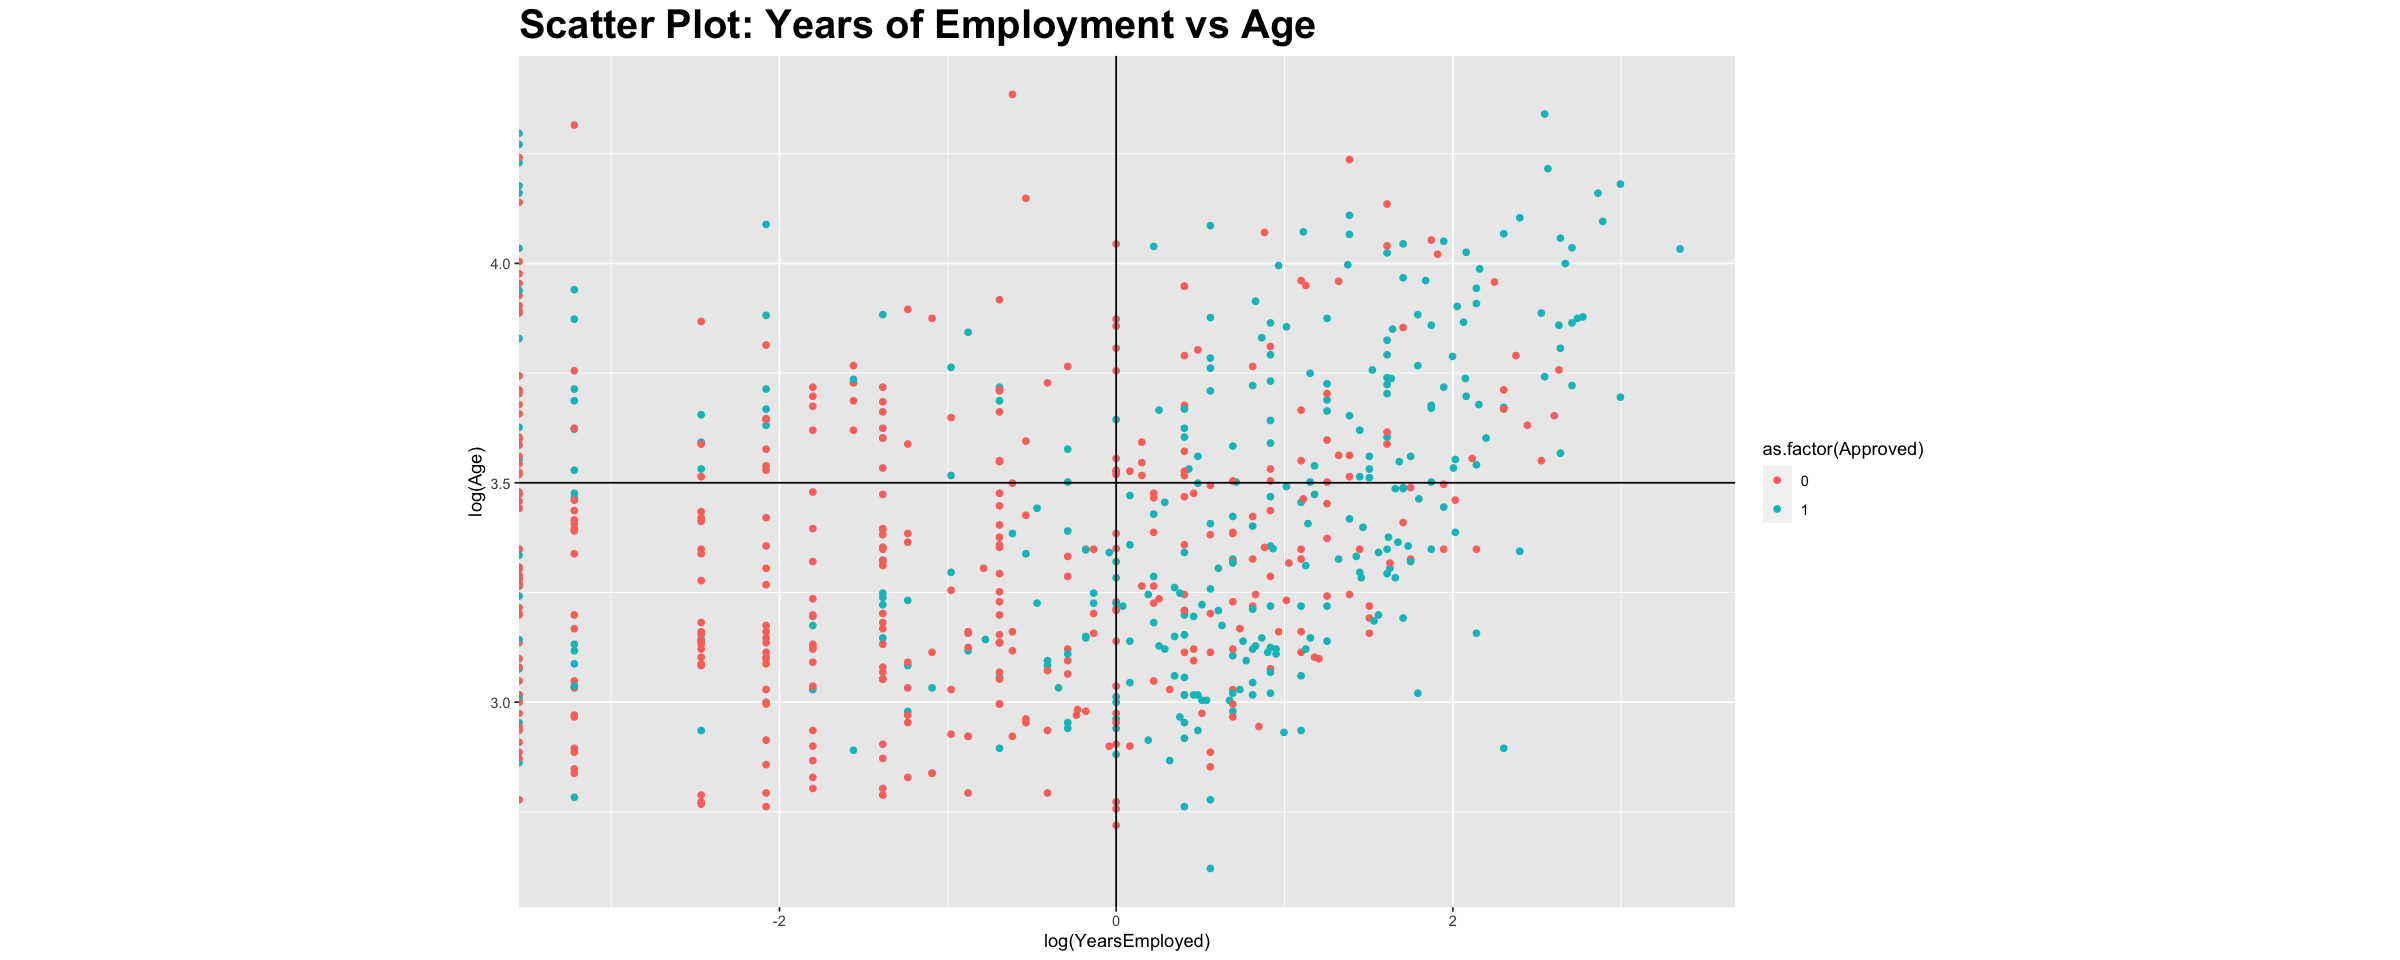

In [8]:
# SOLUTION BEGINS HERE
plt <- ggplot(approval_ds, aes( x = log(YearsEmployed), y=log(Age), col=as.factor(Approved))) +
  geom_point()
plt + ggtitle("Scatter Plot: Years of Employment vs Age ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .7) +
geom_vline(xintercept = 0) + geom_hline(yintercept = 3.5) 
# SOLUTION ENDS HERE

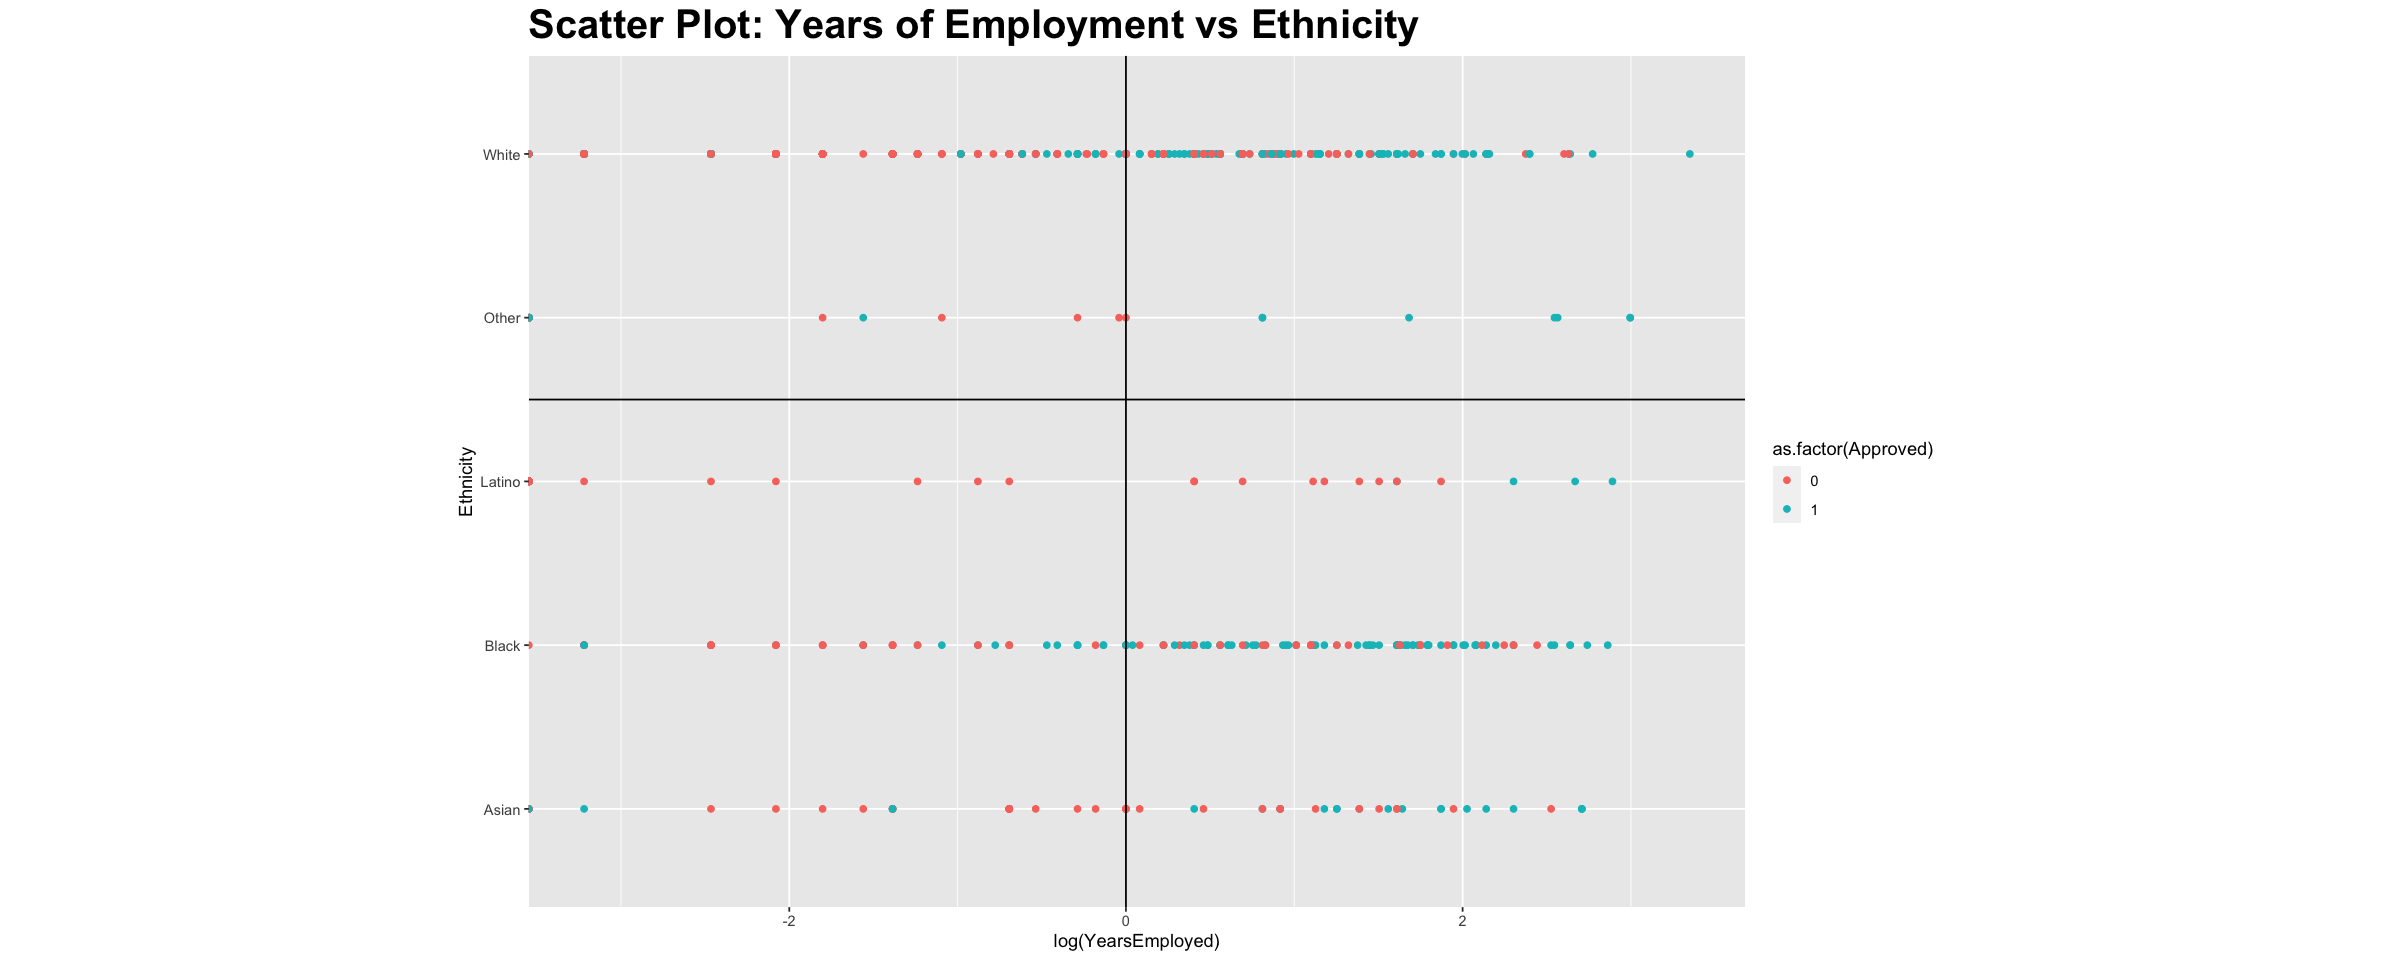

In [9]:
# SOLUTION BEGINS HERE
plt <- ggplot(approval_ds, aes( x = log(YearsEmployed), y=Ethnicity, col=as.factor(Approved))) +
  geom_point()
plt + ggtitle("Scatter Plot: Years of Employment vs Ethnicity ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .7) +
geom_vline(xintercept = 0) + geom_hline(yintercept = 3.5) 
# SOLUTION ENDS HERE

# Approval Rating across Gender

Gender ApprovalRate
1 0      0.4666667   
2 1      0.4354167

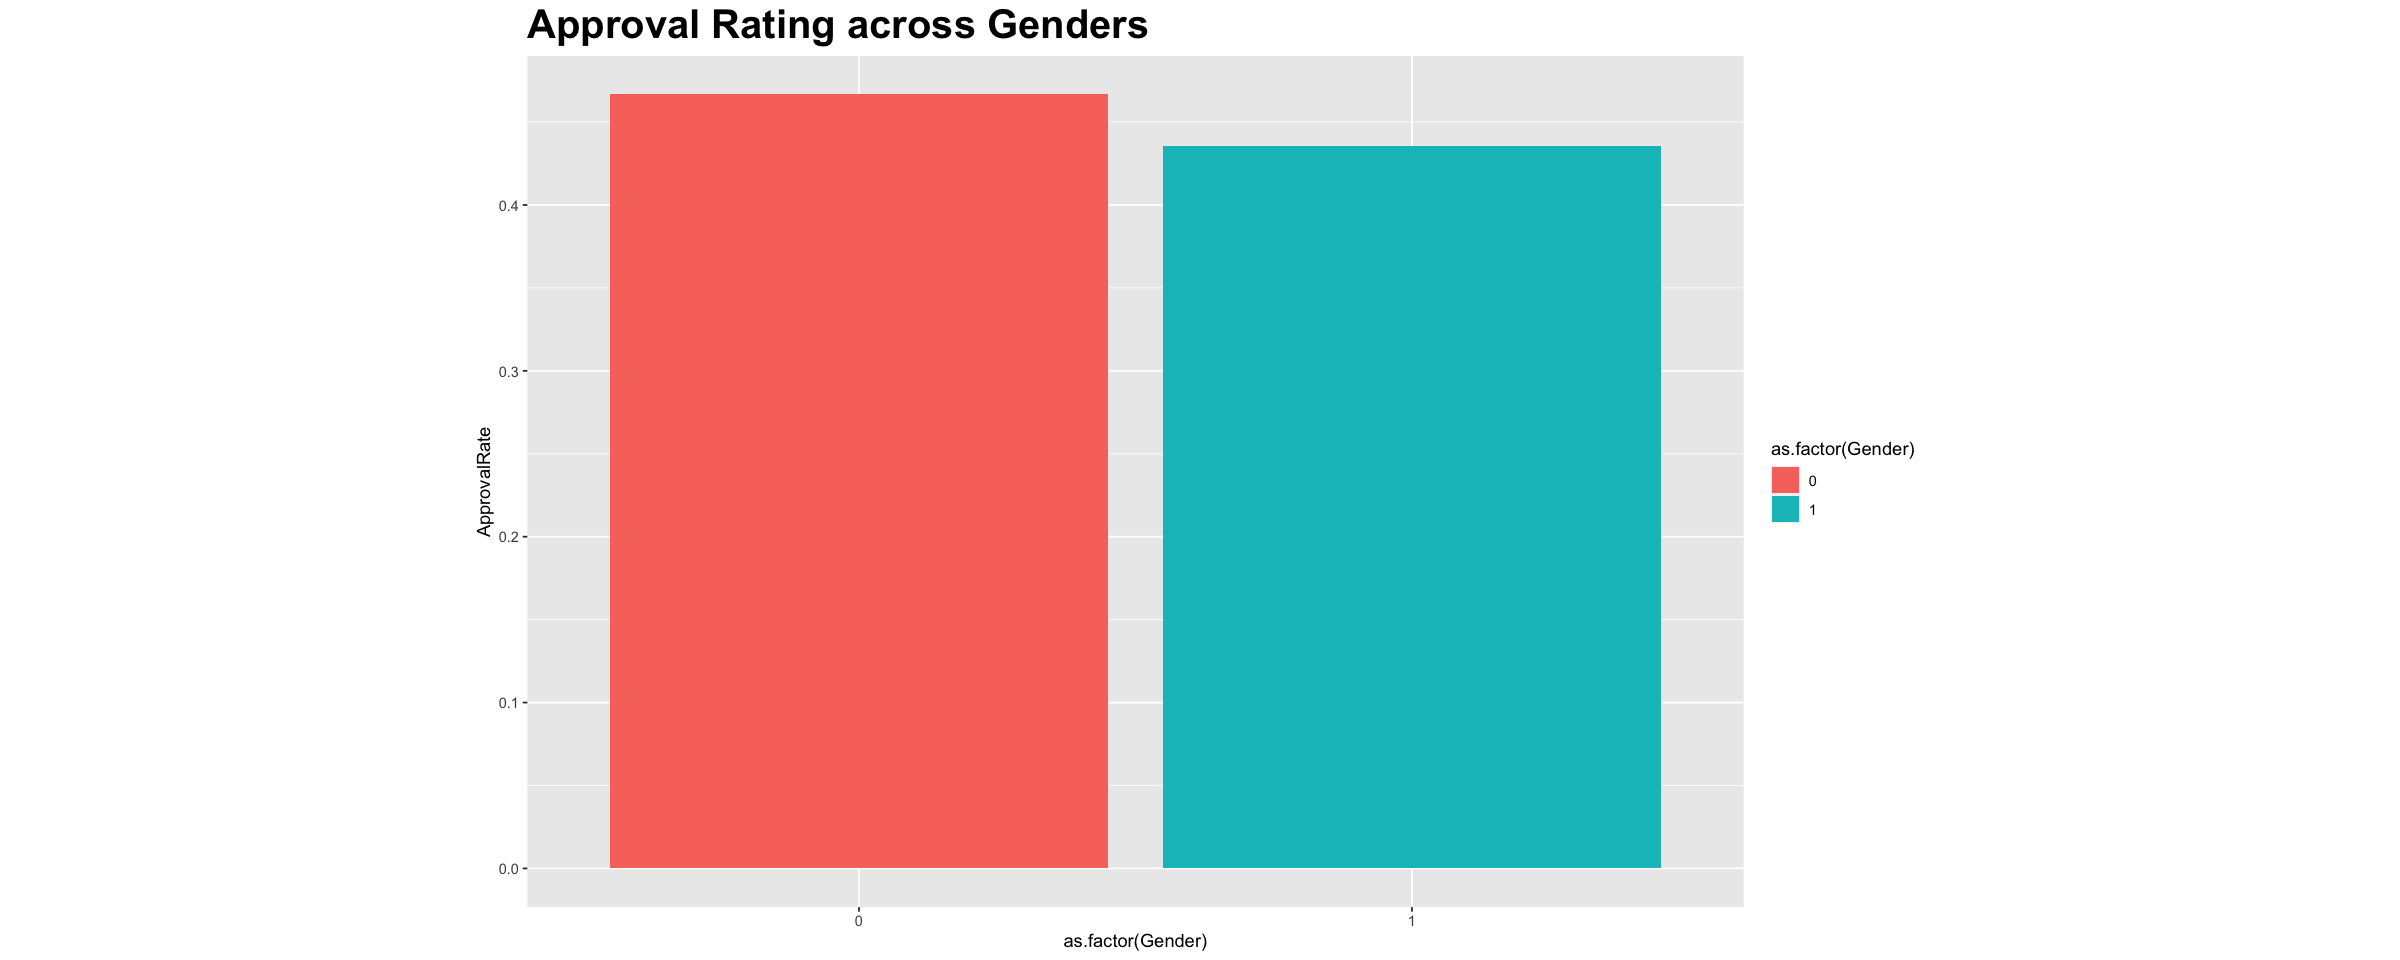

In [10]:
gender_appr <- approval_ds %>% group_by(Gender) %>% summarize(ApprovalRate = mean(Approved))

head(gender_appr)

ggplot(gender_appr, aes(x=as.factor(Gender), y=ApprovalRate, fill= as.factor(Gender)))+ geom_bar(stat = "identity")+
ggtitle("Approval Rating across Genders ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .7)

# Approval Rating across Ethnicities


Ethnicity ApprovalRate
1 Asian     0.4237288   
2 Black     0.6304348   
3 Latino    0.1403509   
4 Other     0.5000000   
5 White     0.4240196

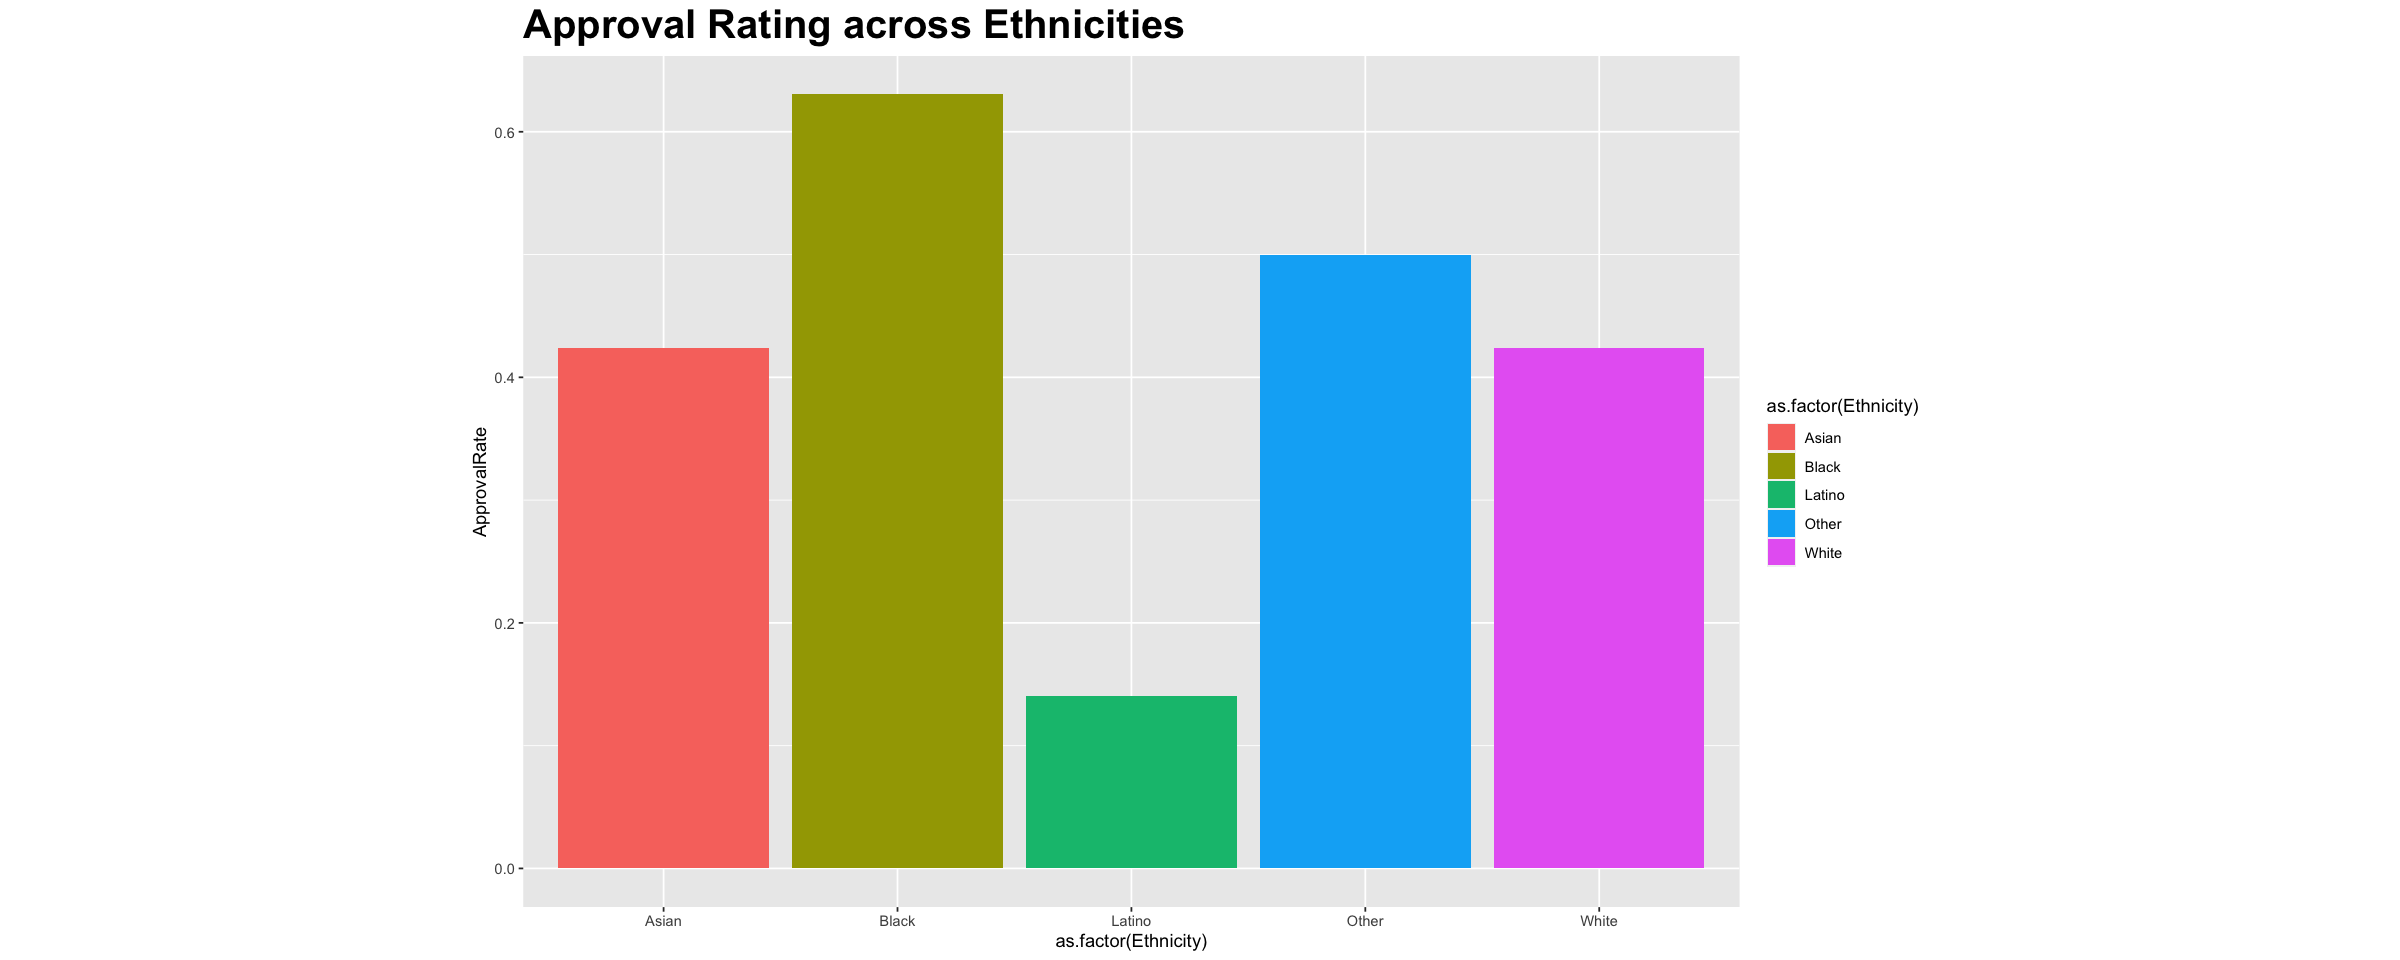

In [11]:
gender_appr <- approval_ds %>% group_by(Ethnicity) %>% summarize(ApprovalRate = mean(Approved))

head(gender_appr)

ggplot(gender_appr, aes(x=as.factor(Ethnicity), y=ApprovalRate, fill= as.factor(Ethnicity)))+ geom_bar(stat = "identity")+
ggtitle("Approval Rating across Ethnicities ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .7)

# Approval Rating across Marital Status

Married ApprovalRate
1 0       0.2848485   
2 1       0.4952381

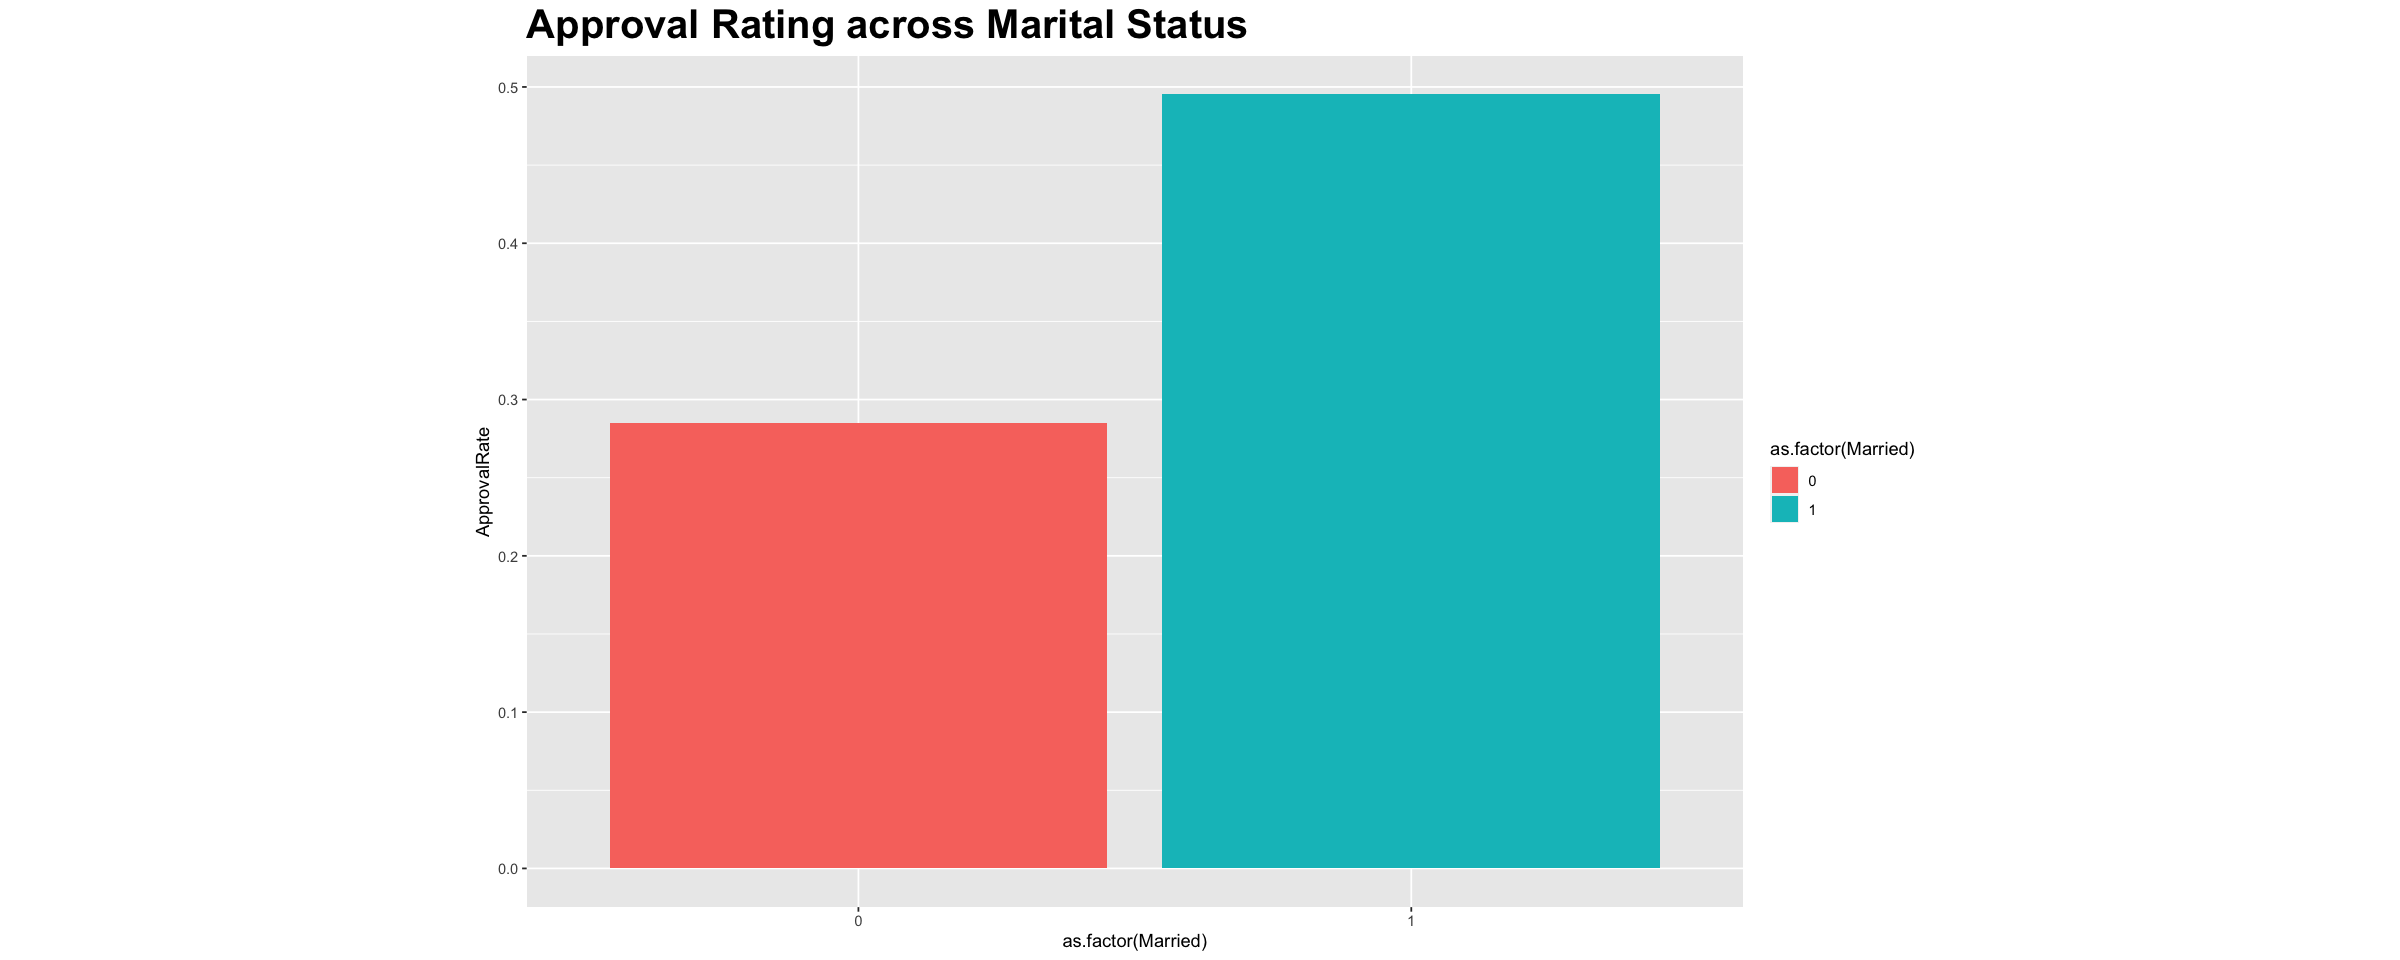

In [12]:
gender_appr <- approval_ds %>% group_by(Married) %>% summarize(ApprovalRate = mean(Approved))

head(gender_appr)

ggplot(gender_appr, aes(x=as.factor(Married), y=ApprovalRate, fill= as.factor(Married)))+ geom_bar(stat = "identity")+
ggtitle("Approval Rating across Marital Status ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .7)


# Approval Rating across Industry

Industry              ApprovalRate
1 CommunicationServices 0.4210526   
2 ConsumerDiscretionary 0.2372881   
3 ConsumerStaples       0.3518519   
4 Education             0.5600000   
5 Energy                0.4520548   
6 Financials            0.2745098

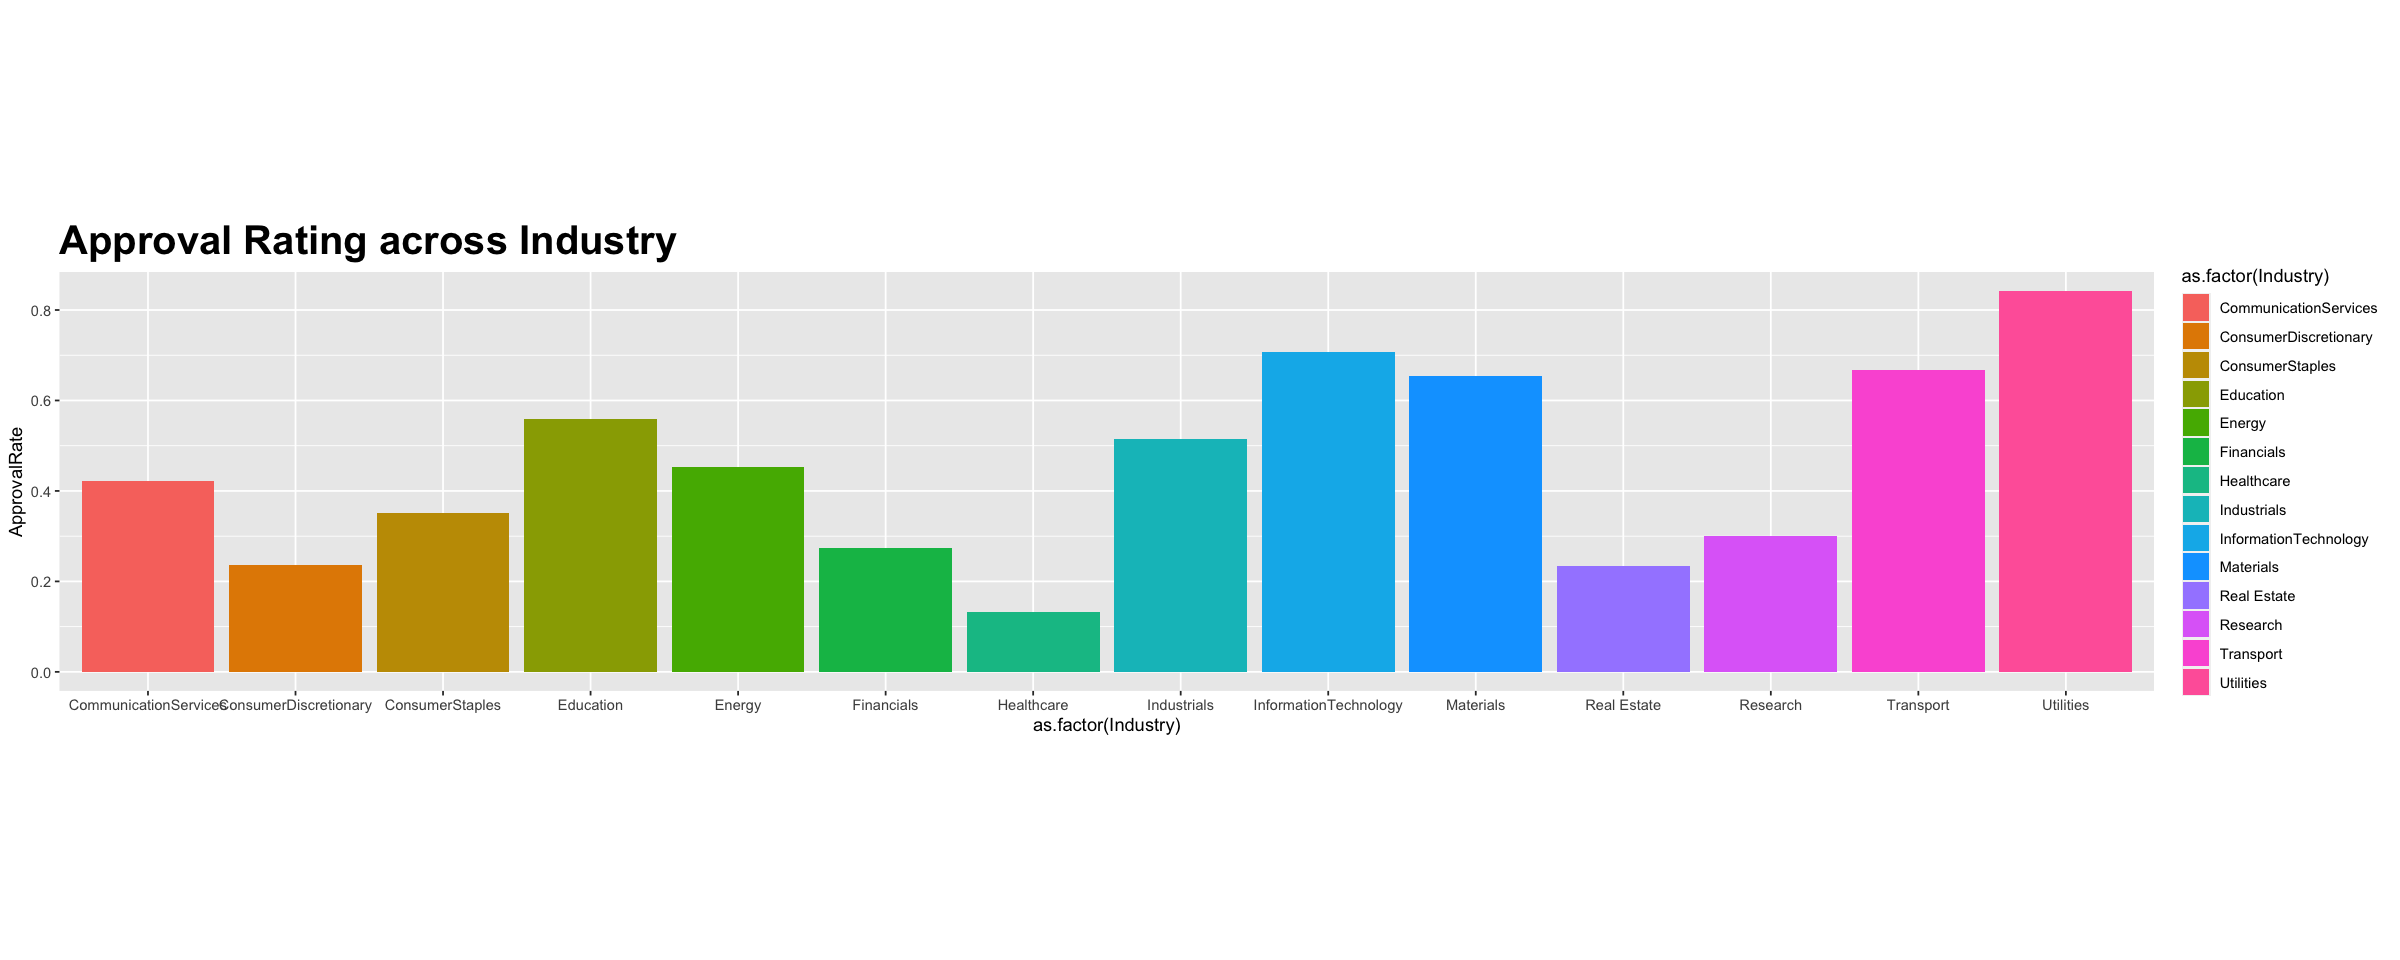

In [13]:
gender_appr <- approval_ds %>% group_by(Industry) %>% summarize(ApprovalRate = mean(Approved))

head(gender_appr)

ggplot(gender_appr, aes(x=as.factor(Industry), y=ApprovalRate, fill= as.factor(Industry)))+ geom_bar(stat = "identity")+
ggtitle("Approval Rating across Industry ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .2)


# Income across ethnicities

Ethnicity meanIncome
1 Asian     1762.2712 
2 Black      968.1812 
3 Latino     434.6491 
4 Other     4389.0357 
5 White      776.3358

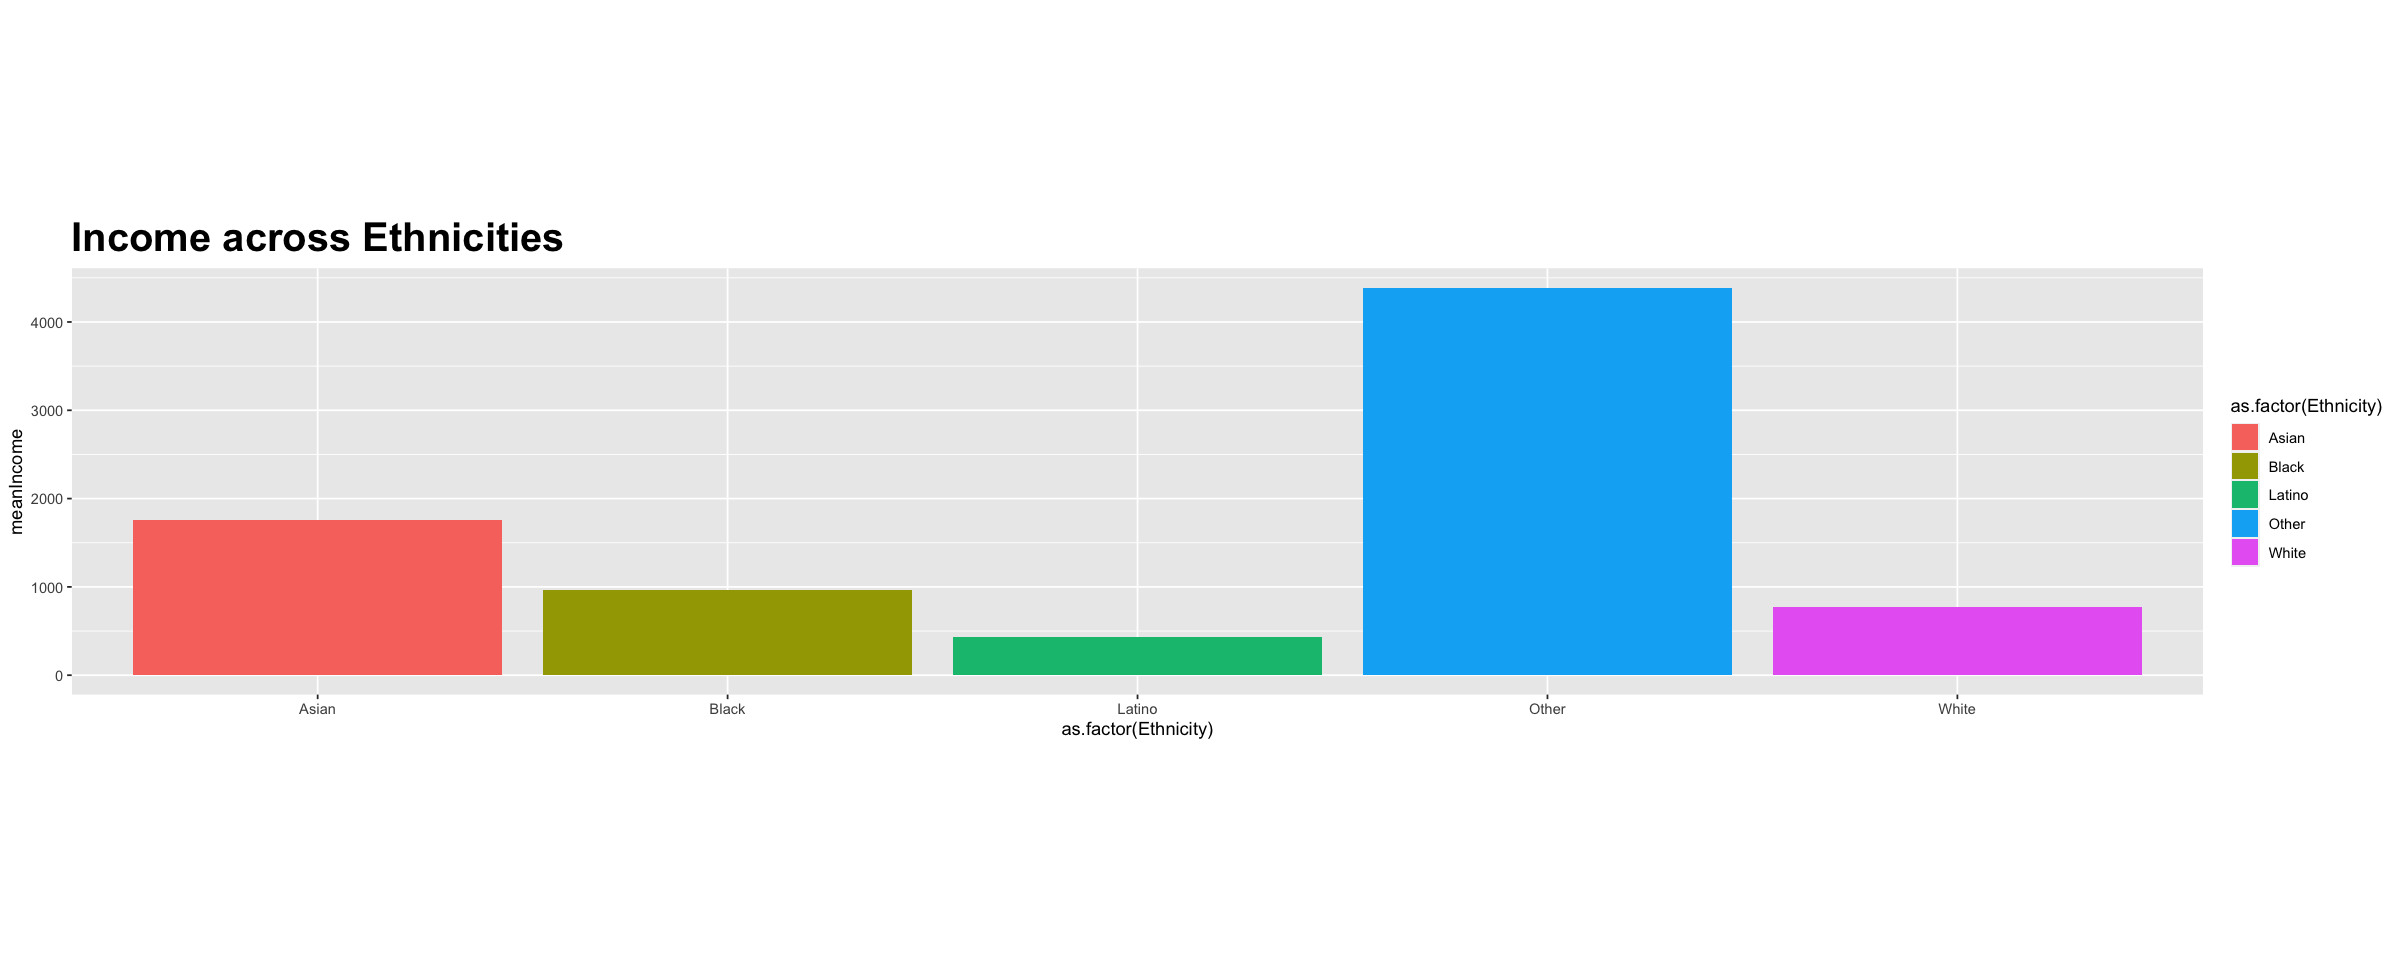

In [14]:
gender_appr <- approval_ds %>% group_by(Ethnicity) %>% summarize(meanIncome = mean(Income))

head(gender_appr)

ggplot(gender_appr, aes(x=as.factor(Ethnicity), y=meanIncome, fill= as.factor(Ethnicity)))+ geom_bar(stat = "identity")+
ggtitle("Income across Ethnicities ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .2)


# Prior Default Rate across Ethnicity

Ethnicity priorDefaultRate
1 Asian     0.5932203       
2 Black     0.7101449       
3 Latino    0.2280702       
4 Other     0.4642857       
5 White     0.4950980

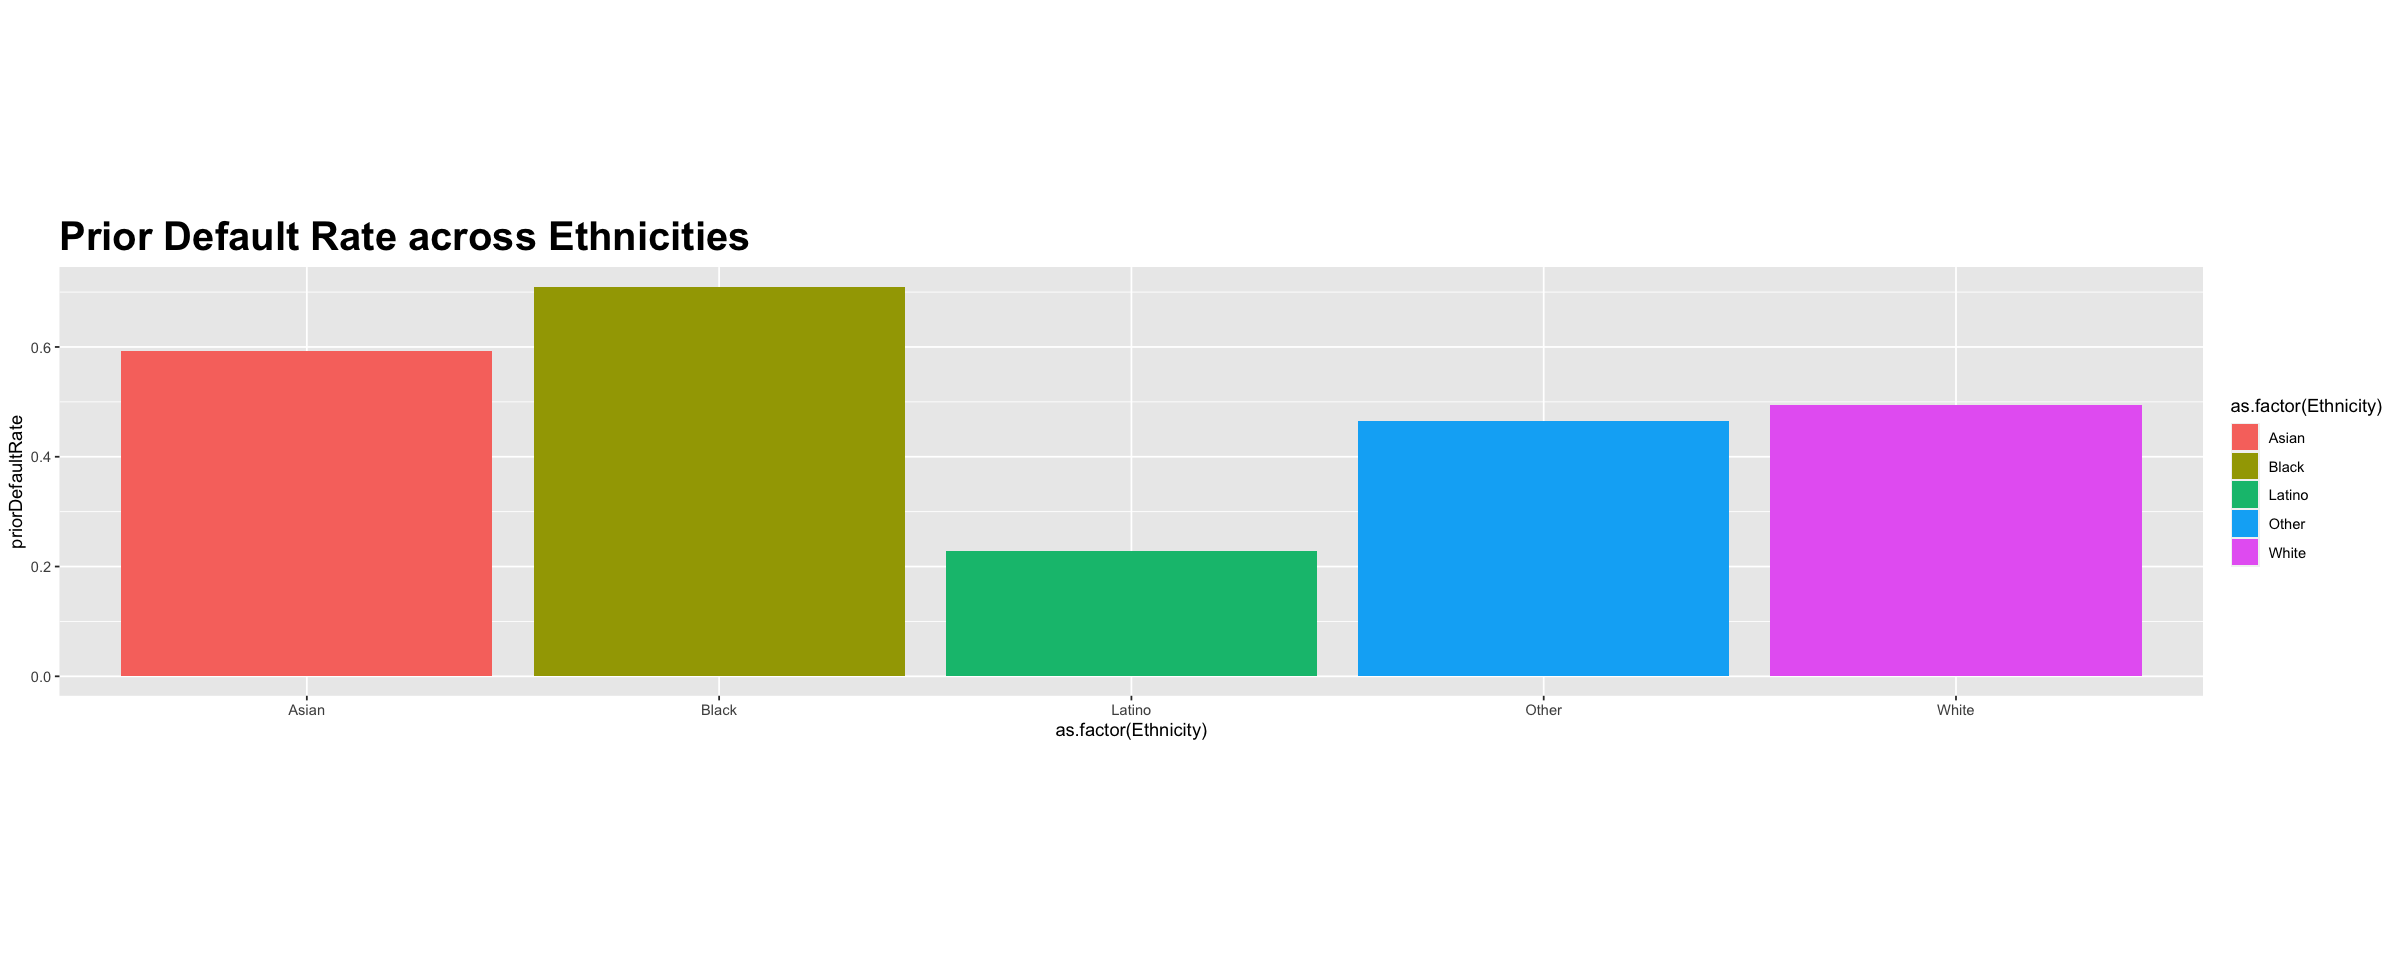

In [15]:
gender_appr <- approval_ds %>% group_by(Ethnicity) %>% summarize(priorDefaultRate = mean(PriorDefault))

head(gender_appr)

ggplot(gender_appr, aes(x=as.factor(Ethnicity), y=priorDefaultRate, fill= as.factor(Ethnicity)))+ geom_bar(stat = "identity")+
ggtitle("Prior Default Rate across Ethnicities ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .2)


## Histogram of Credit Scores

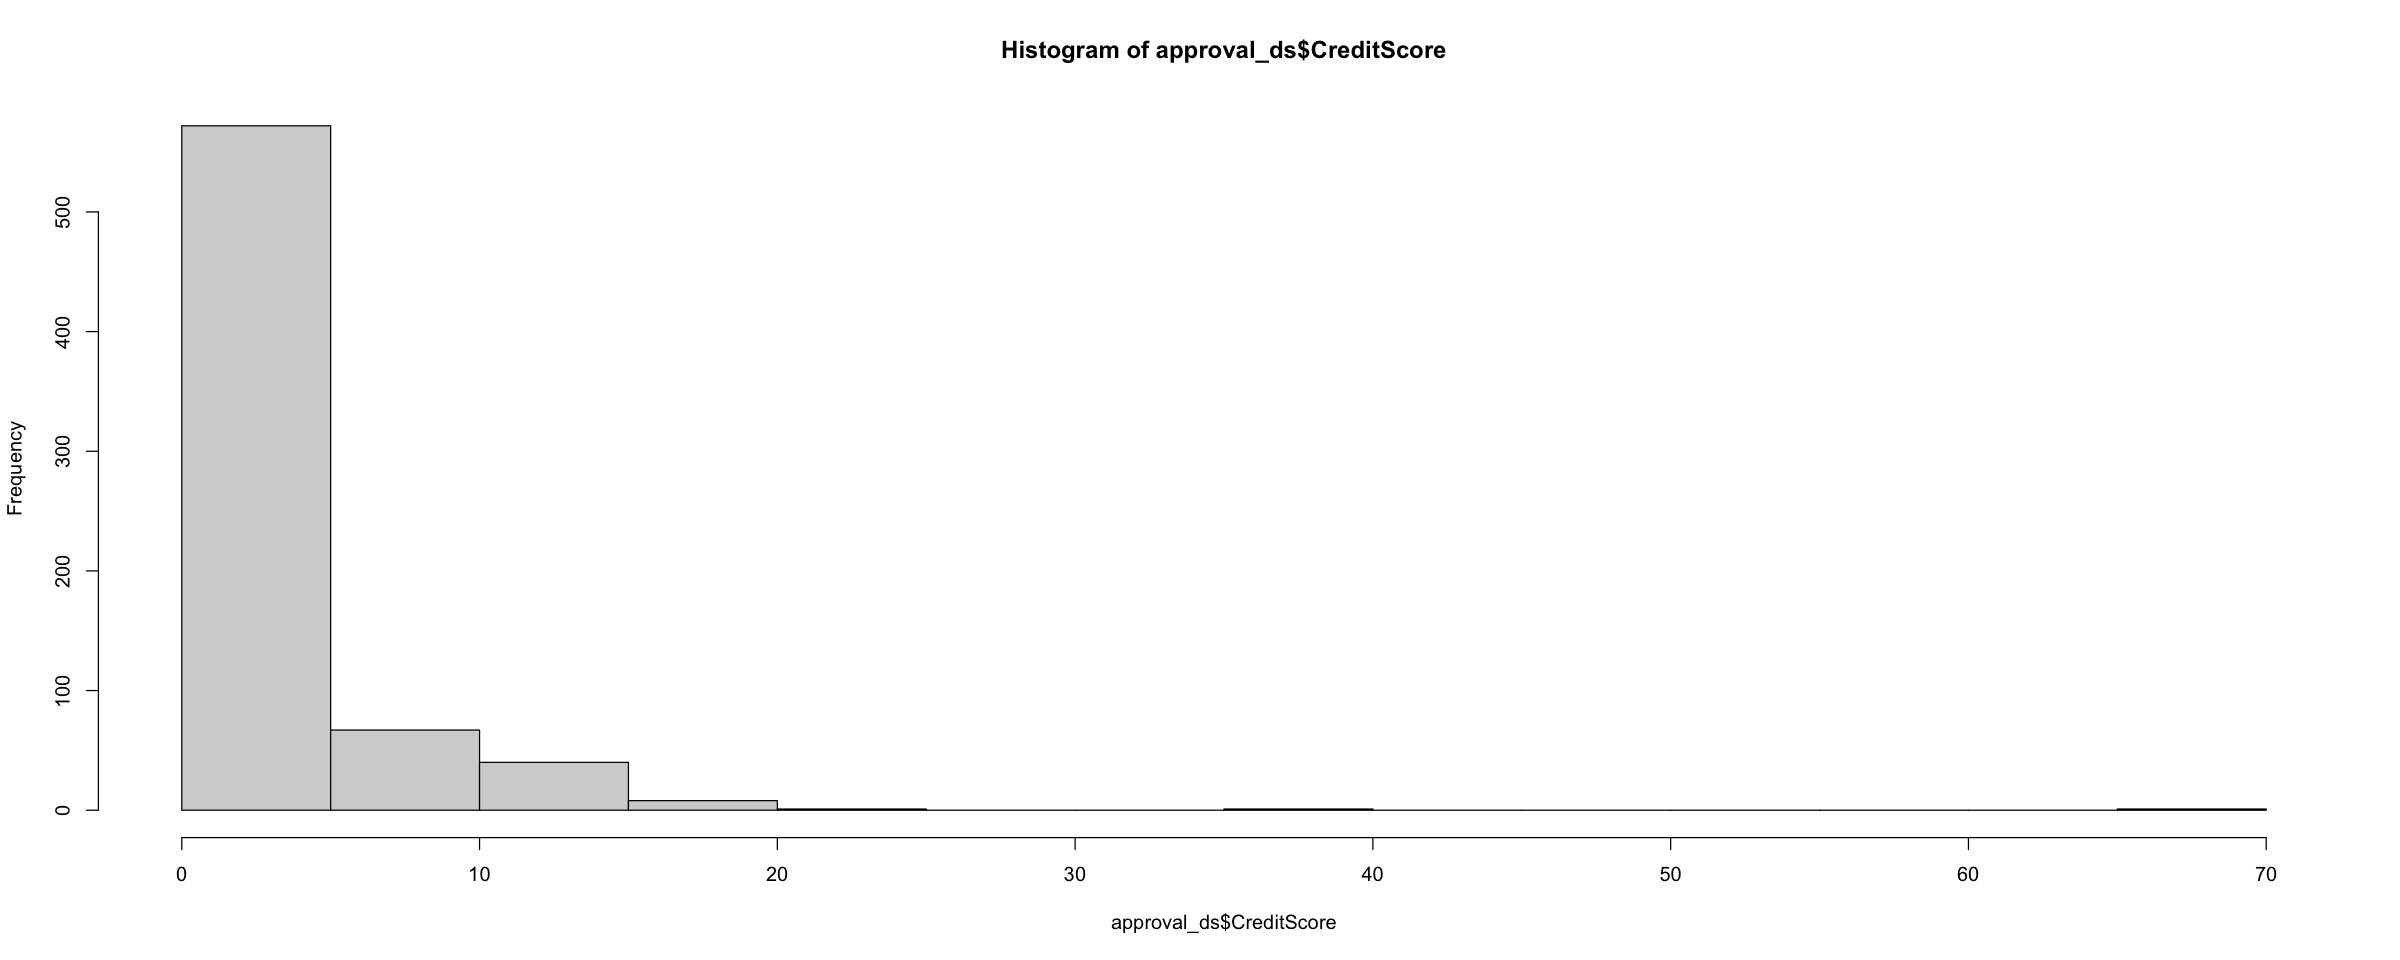

In [16]:
hist(approval_ds$CreditScore)

## Histogram of Credit Scores after Log Transformed

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     0.0     2.4     3.0    67.0 

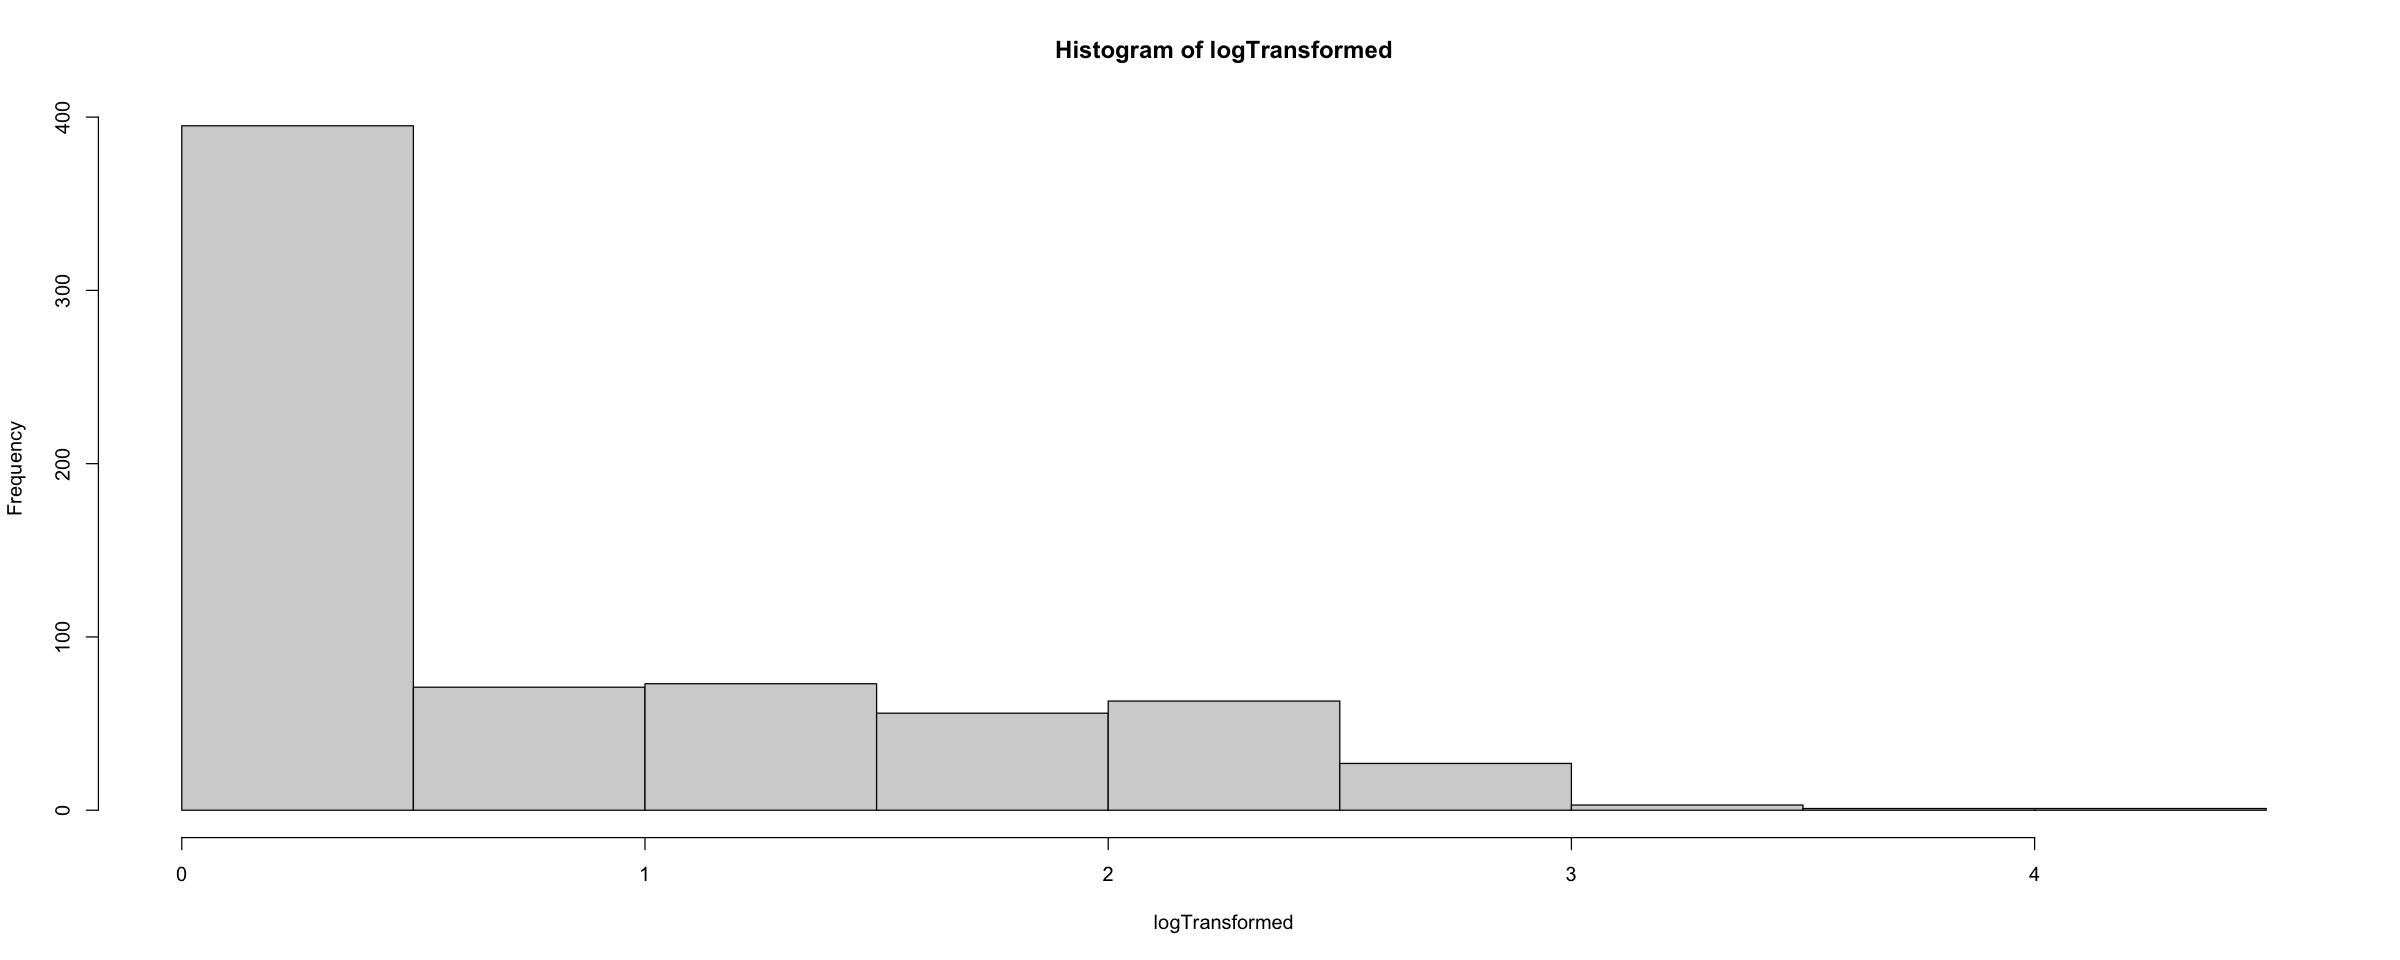

In [17]:
summary(approval_ds$CreditScore)
logTransformed <- log(approval_ds$CreditScore+1)
hist(logTransformed)

## Testing if Age and Experience are Colinear 

                    Age YearsEmployed
Age           1.0000000     0.3914636
YearsEmployed 0.3914636     1.0000000


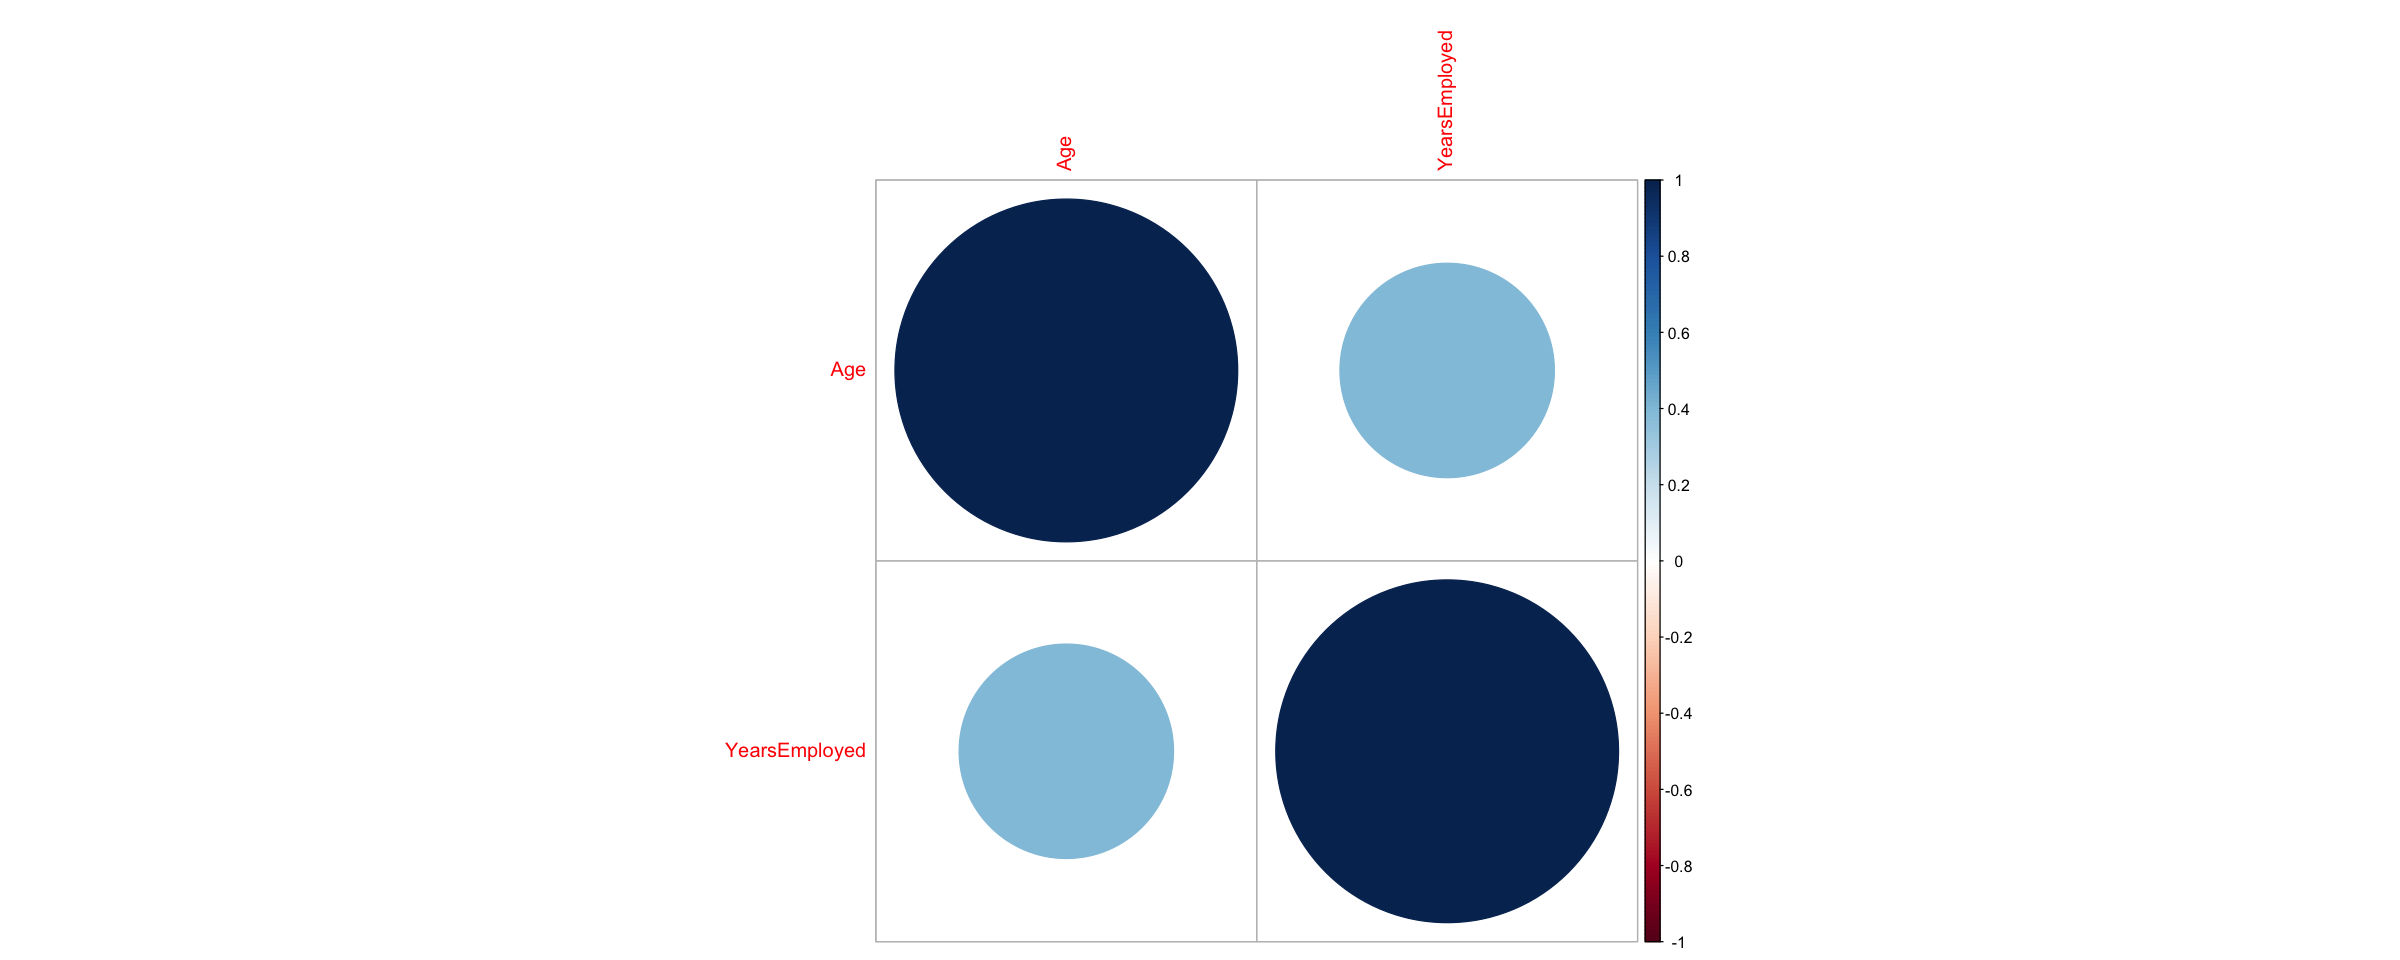

In [18]:
Age_Col <- cor(approval_ds[c("Age", "YearsEmployed")])
print(Age_Col)
corrplot(Age_Col)

**Inference**
As we could see from the correlation plot Age and Years of Employment is not entirely related to each other. As expected the are is a postive Correlation between each other, but one paramter could explain only 39% percent of data of the other paramters

## Data Manipulation

## Variable Analysis

### Age

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.75   22.67   28.46   31.51   37.71   80.25 

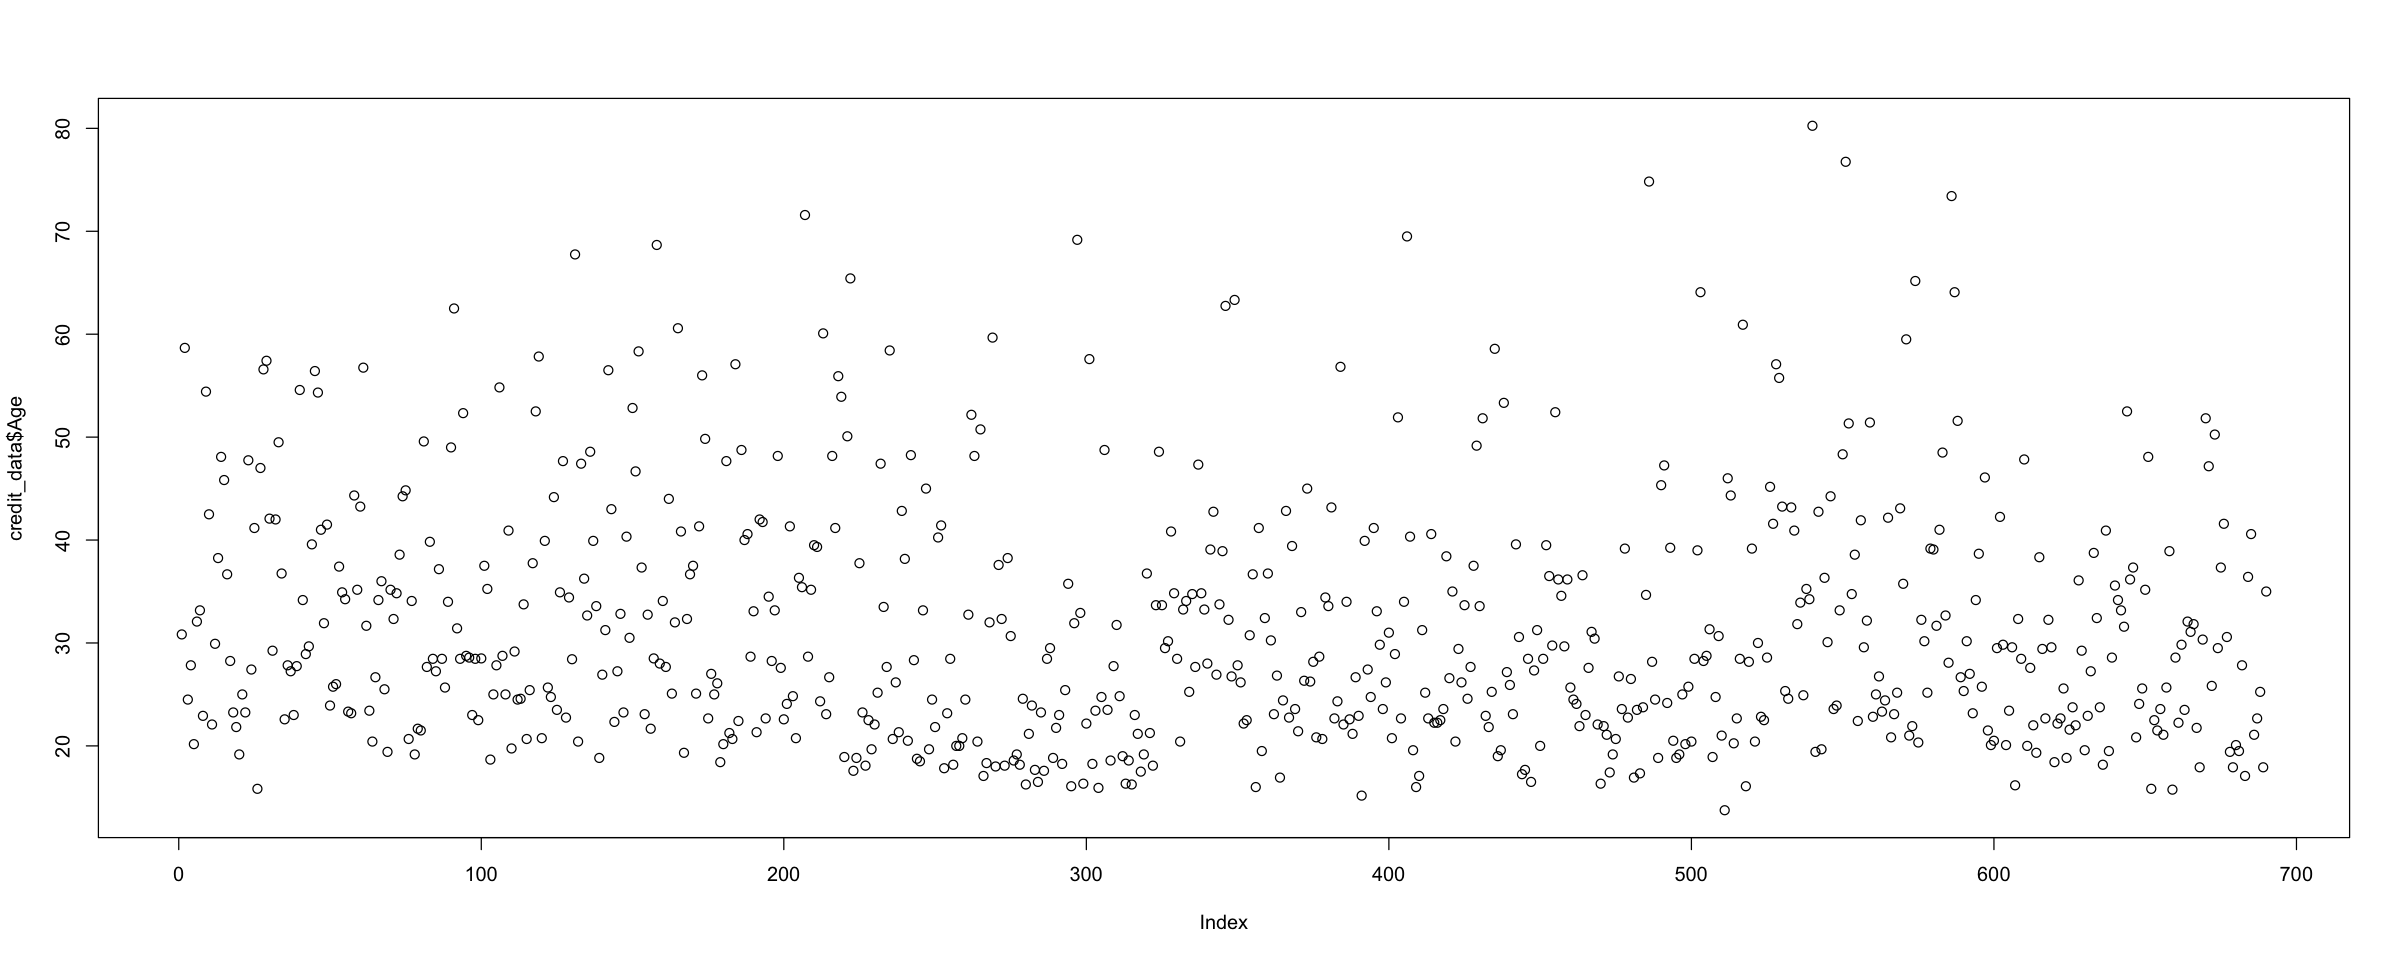

In [19]:
## Understanding the underlying variables. 
##1. Age. Basic scatterplot for age to show the range between 13-80 years old. 
summary(credit_data$Age)
plot(credit_data$Age)


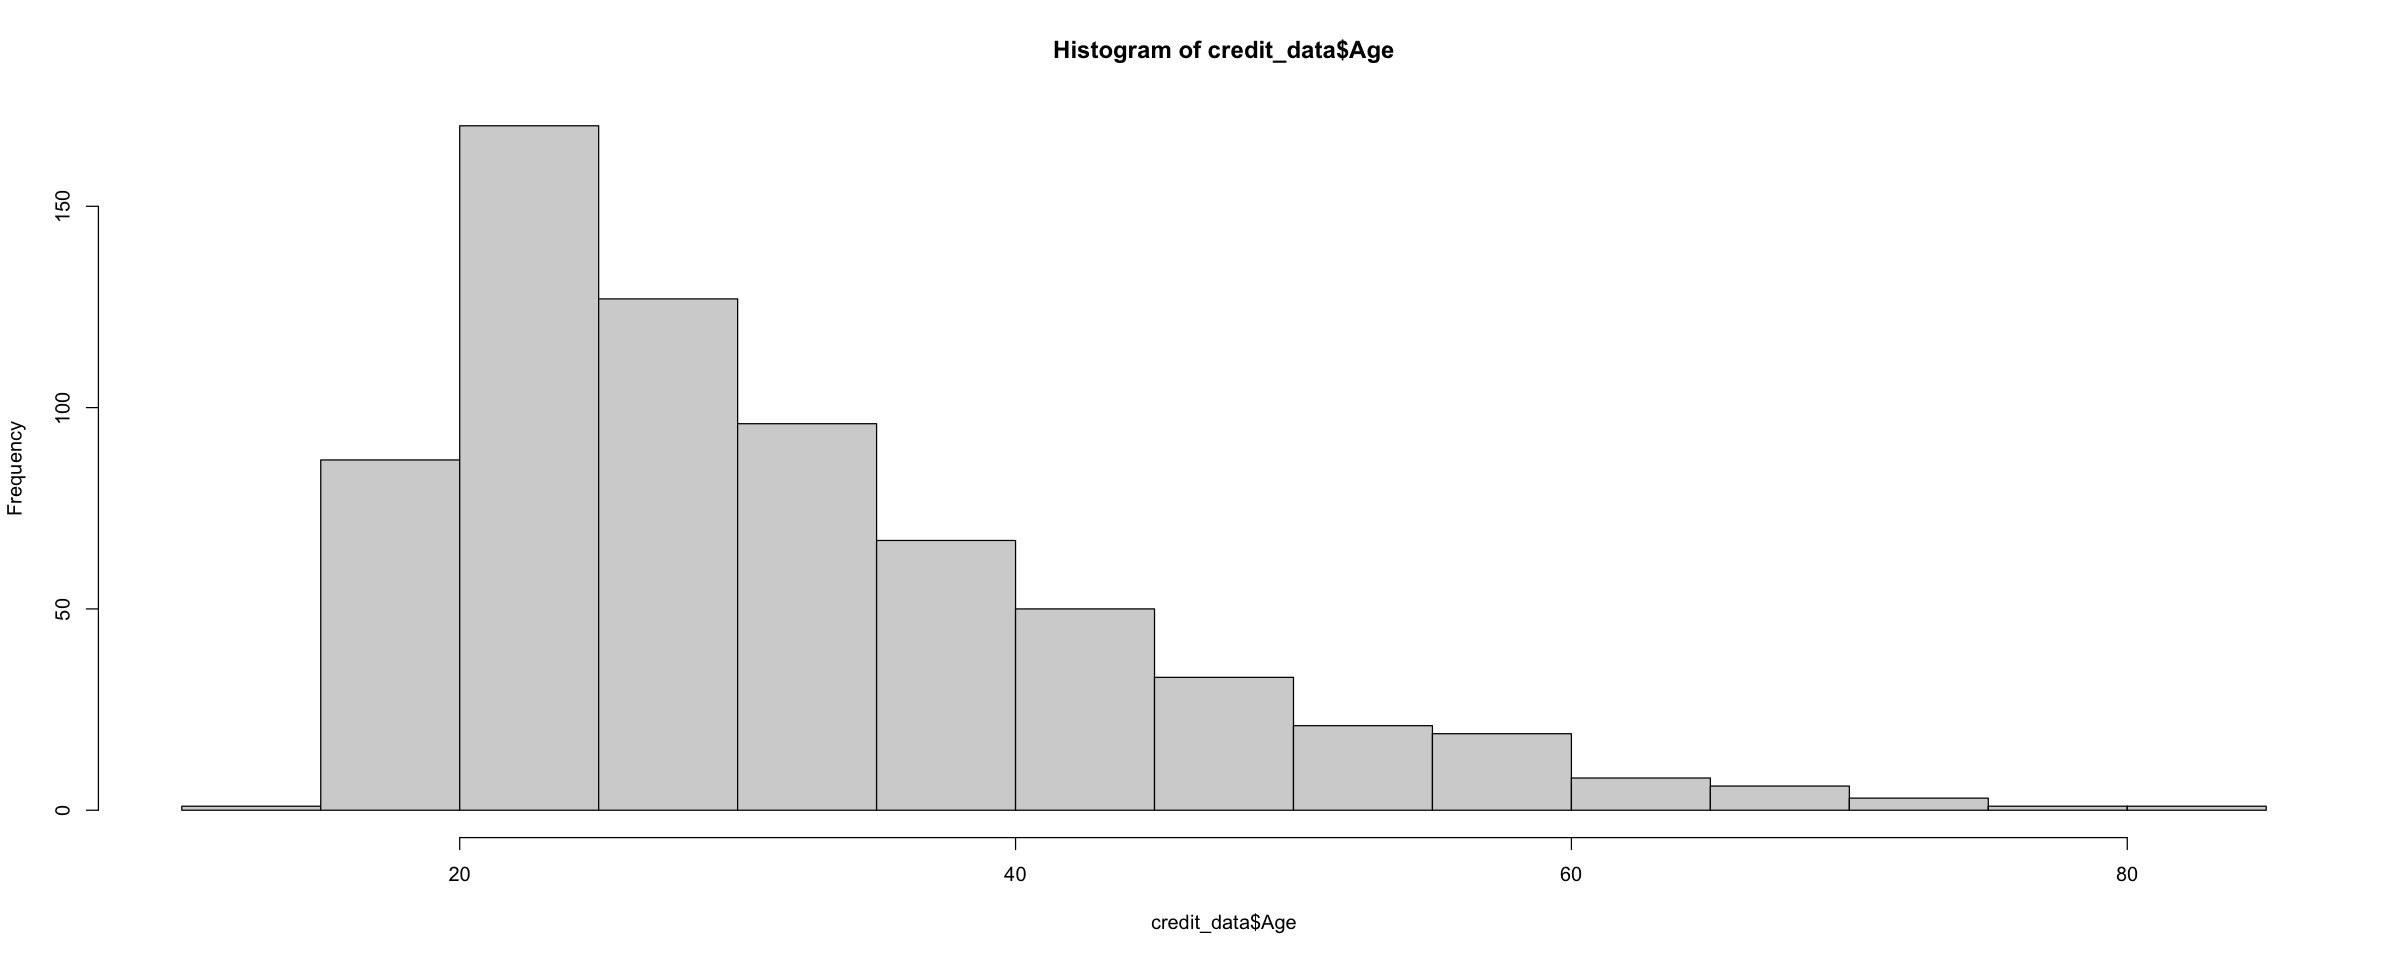

In [20]:
hist(credit_data$Age)

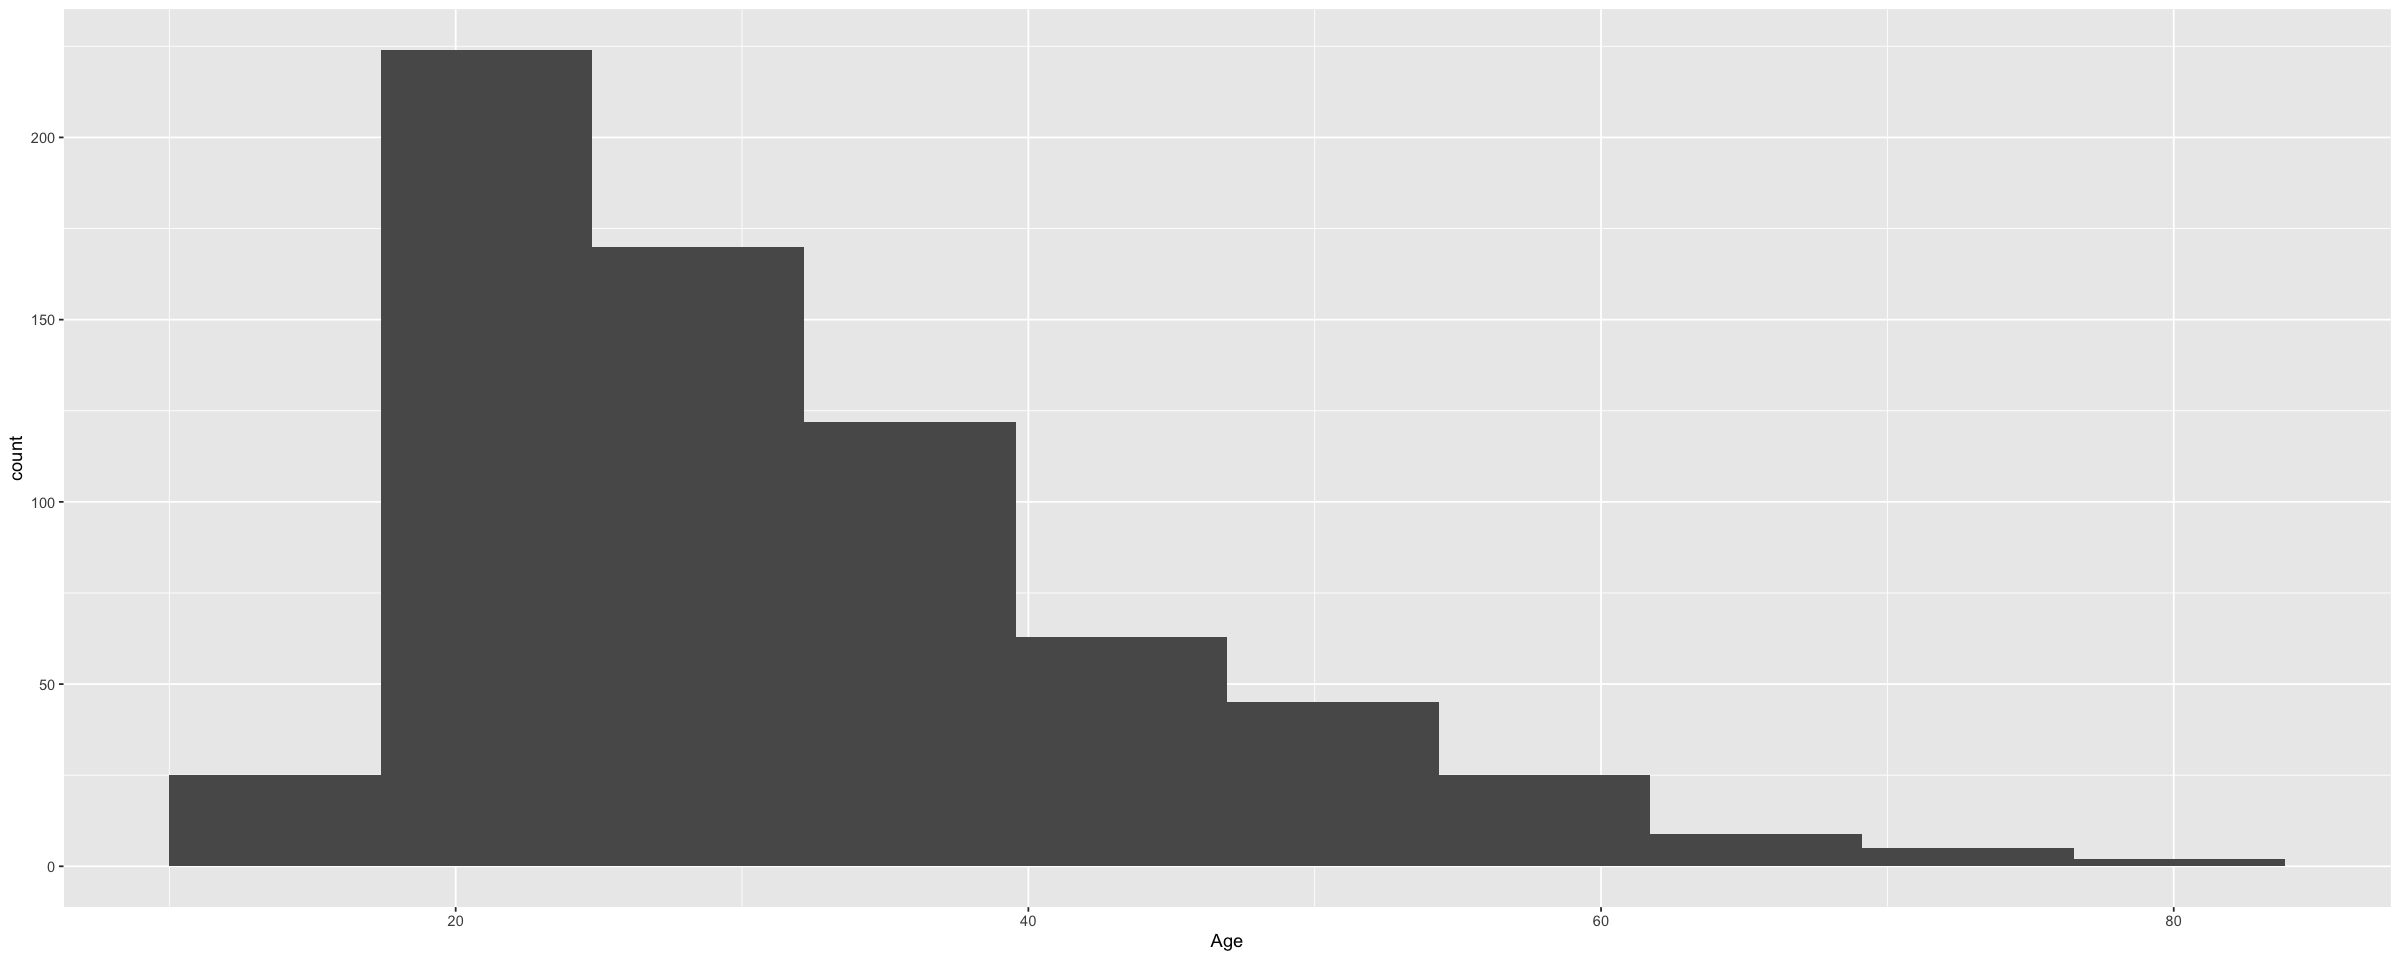

In [21]:
ggplot(credit_data,aes(Age))+geom_histogram(bins=10,boundary=10)


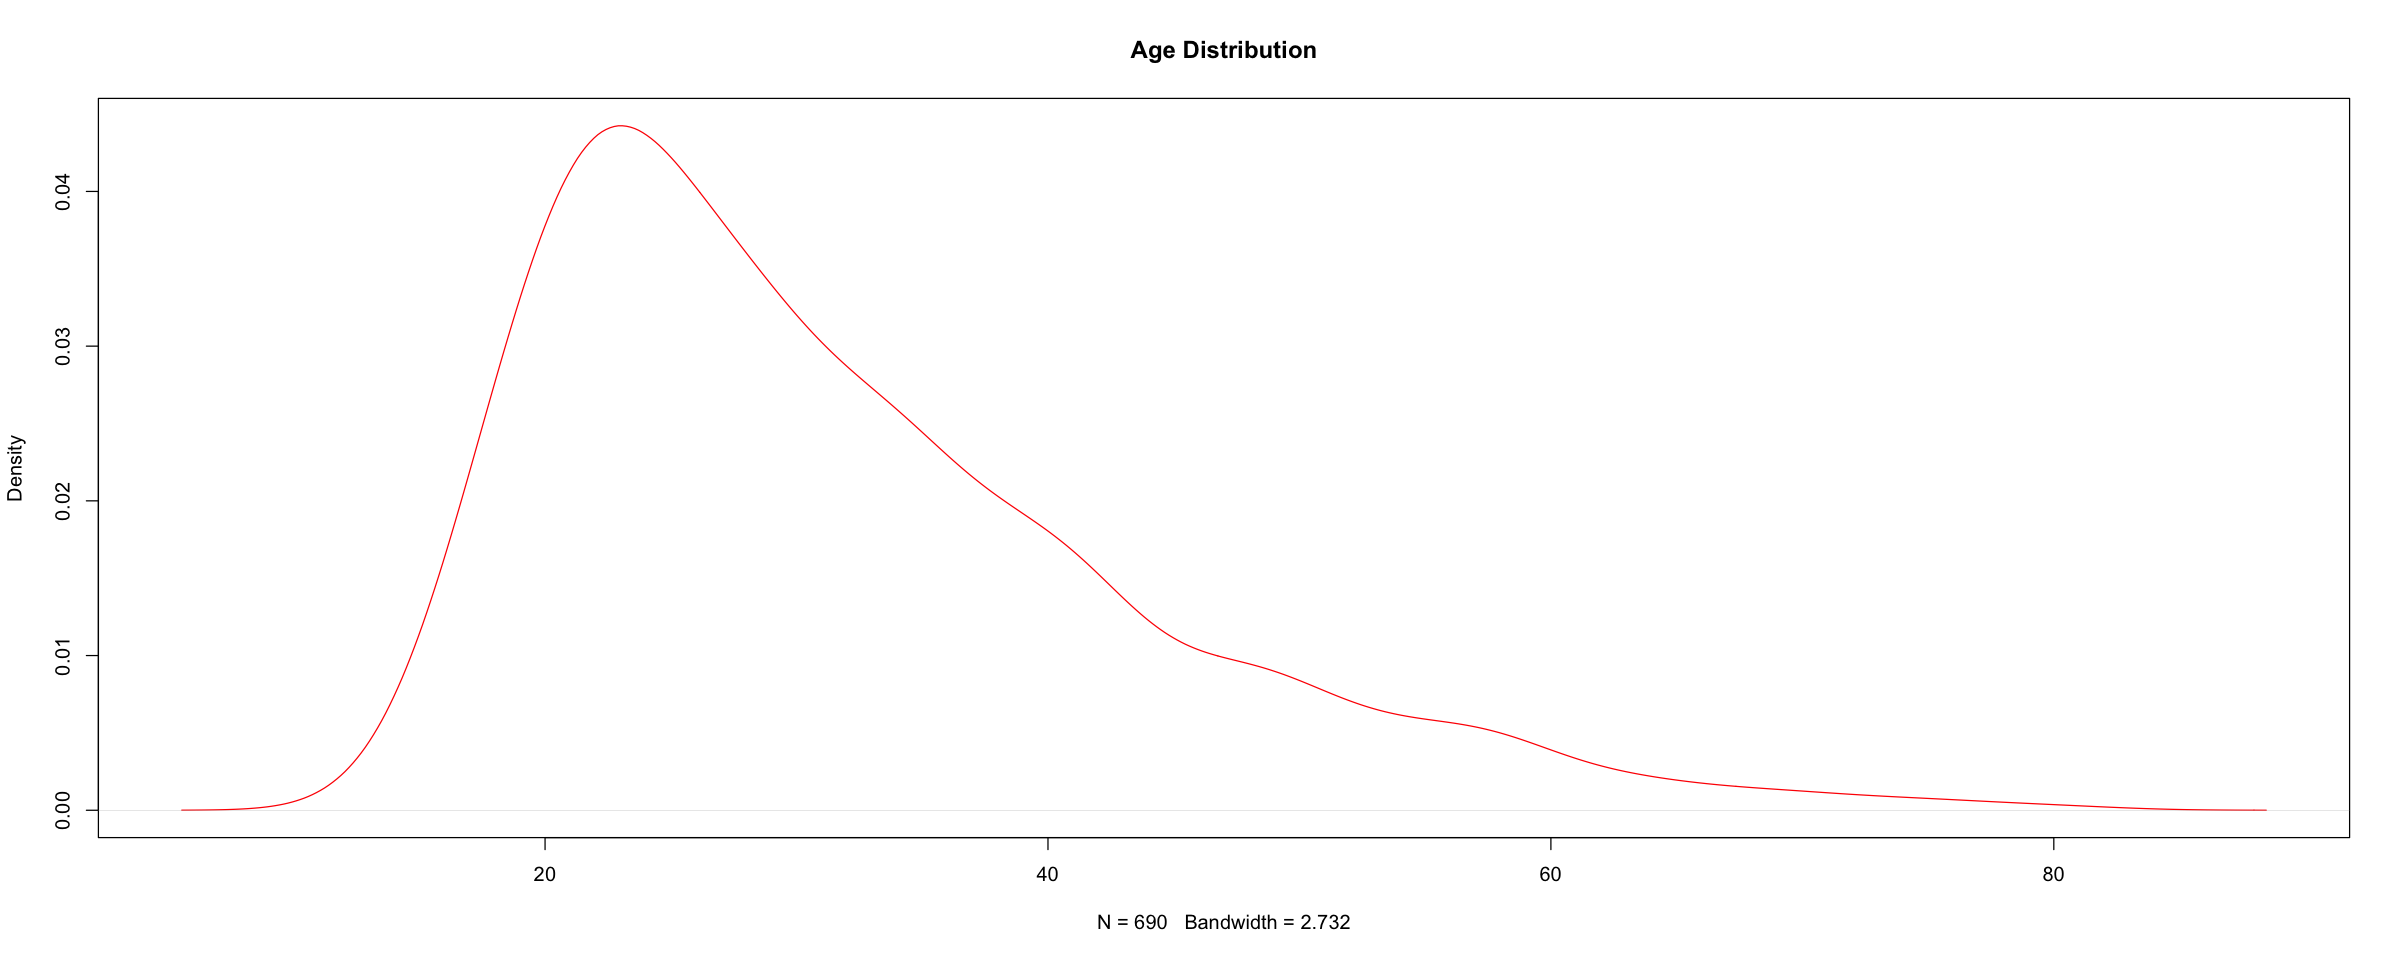

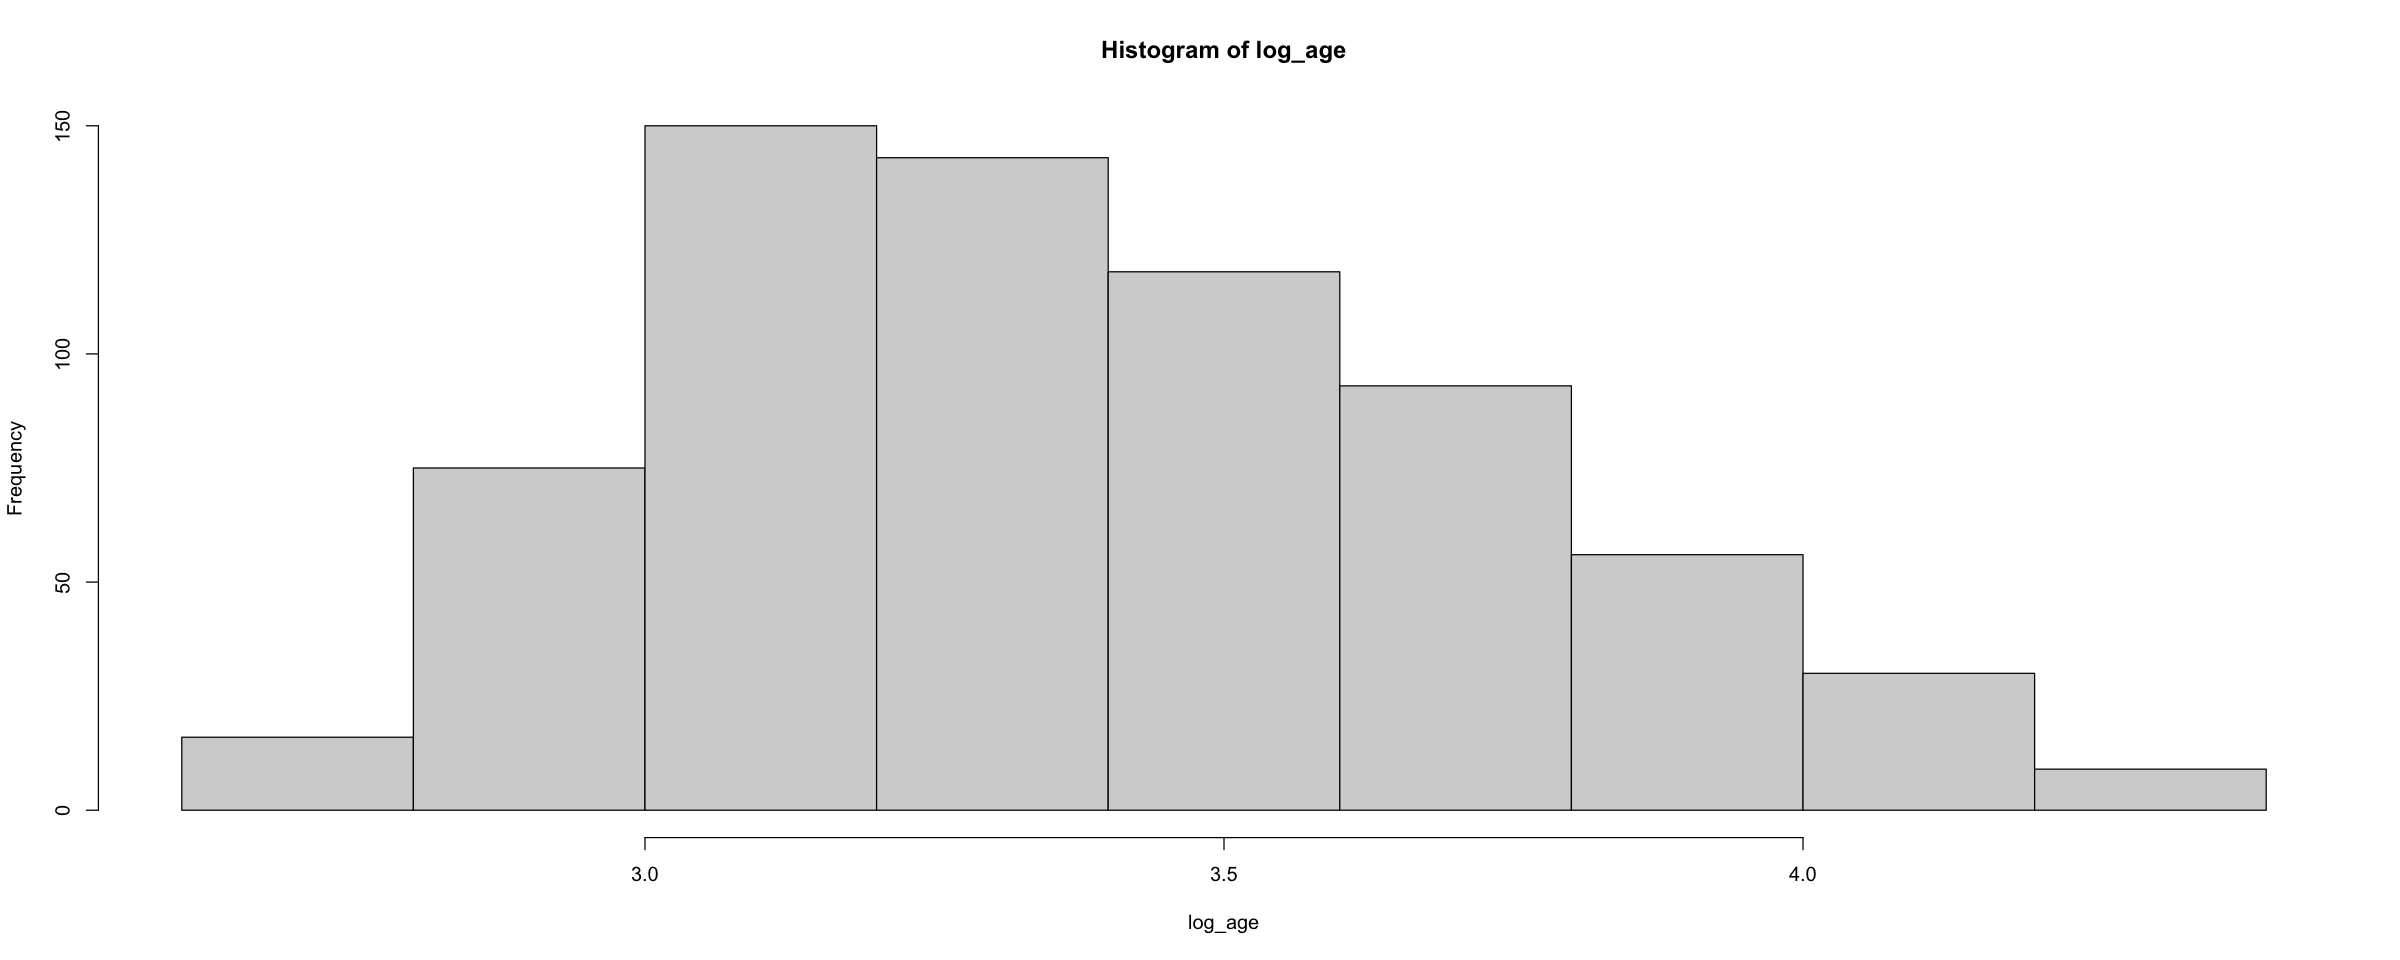

In [22]:
plot(density(credit_data$Age),col='red',main="Age Distribution",xlbabs='Age')
log_age <-log(credit_data$Age)
hist(log_age)



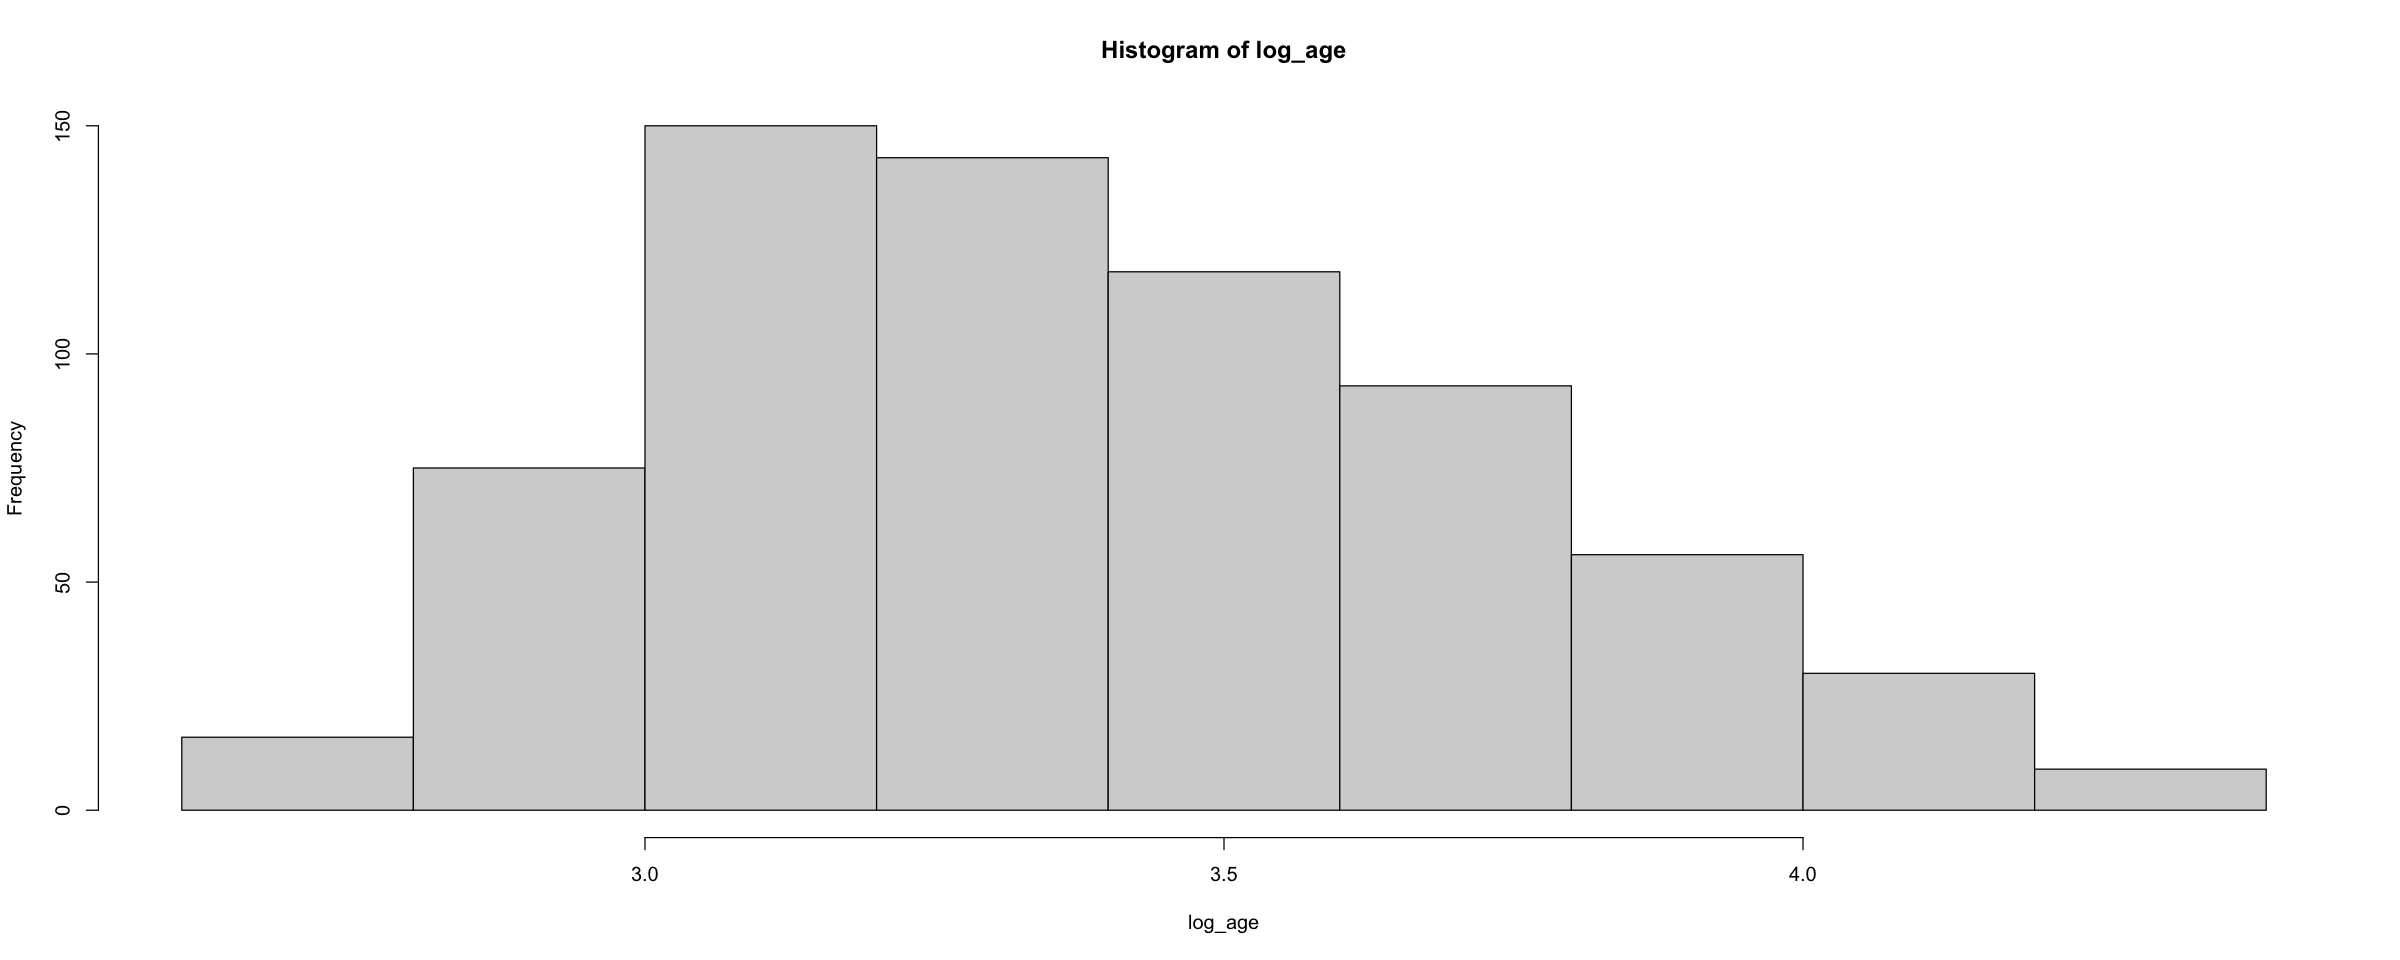

In [23]:
##skew to the left- majority of applicant is working class, under the age of 50. Log_age fix the issue
log_age <-log(credit_data$Age)
hist(log_age)

### Approval by Gender

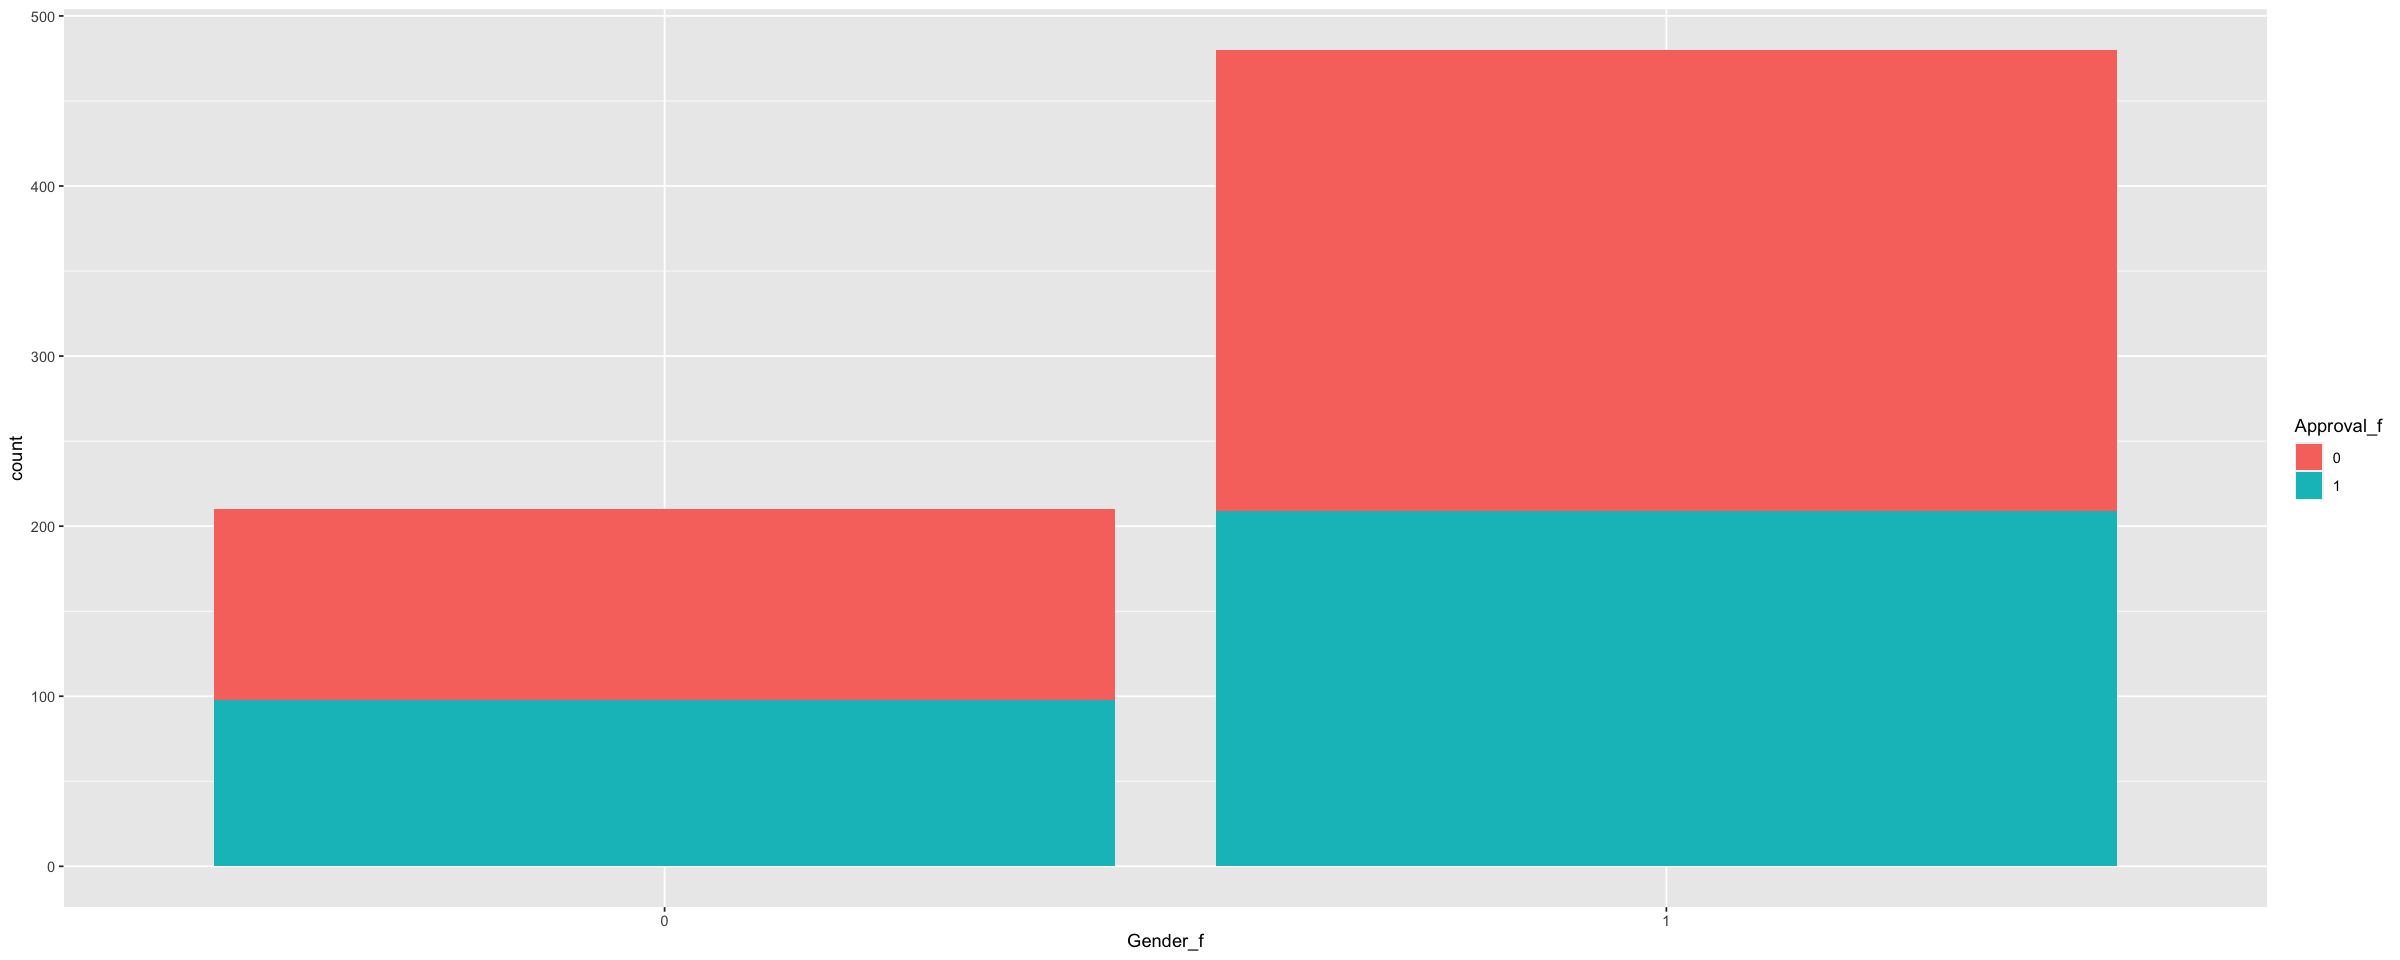

In [24]:
##2. Gender
ggplot(credit_data)+geom_bar(mapping=aes(x=Gender_f,fill=Approval_f))
##number of applicant is skew toward gender "1"?? confirm men or women 

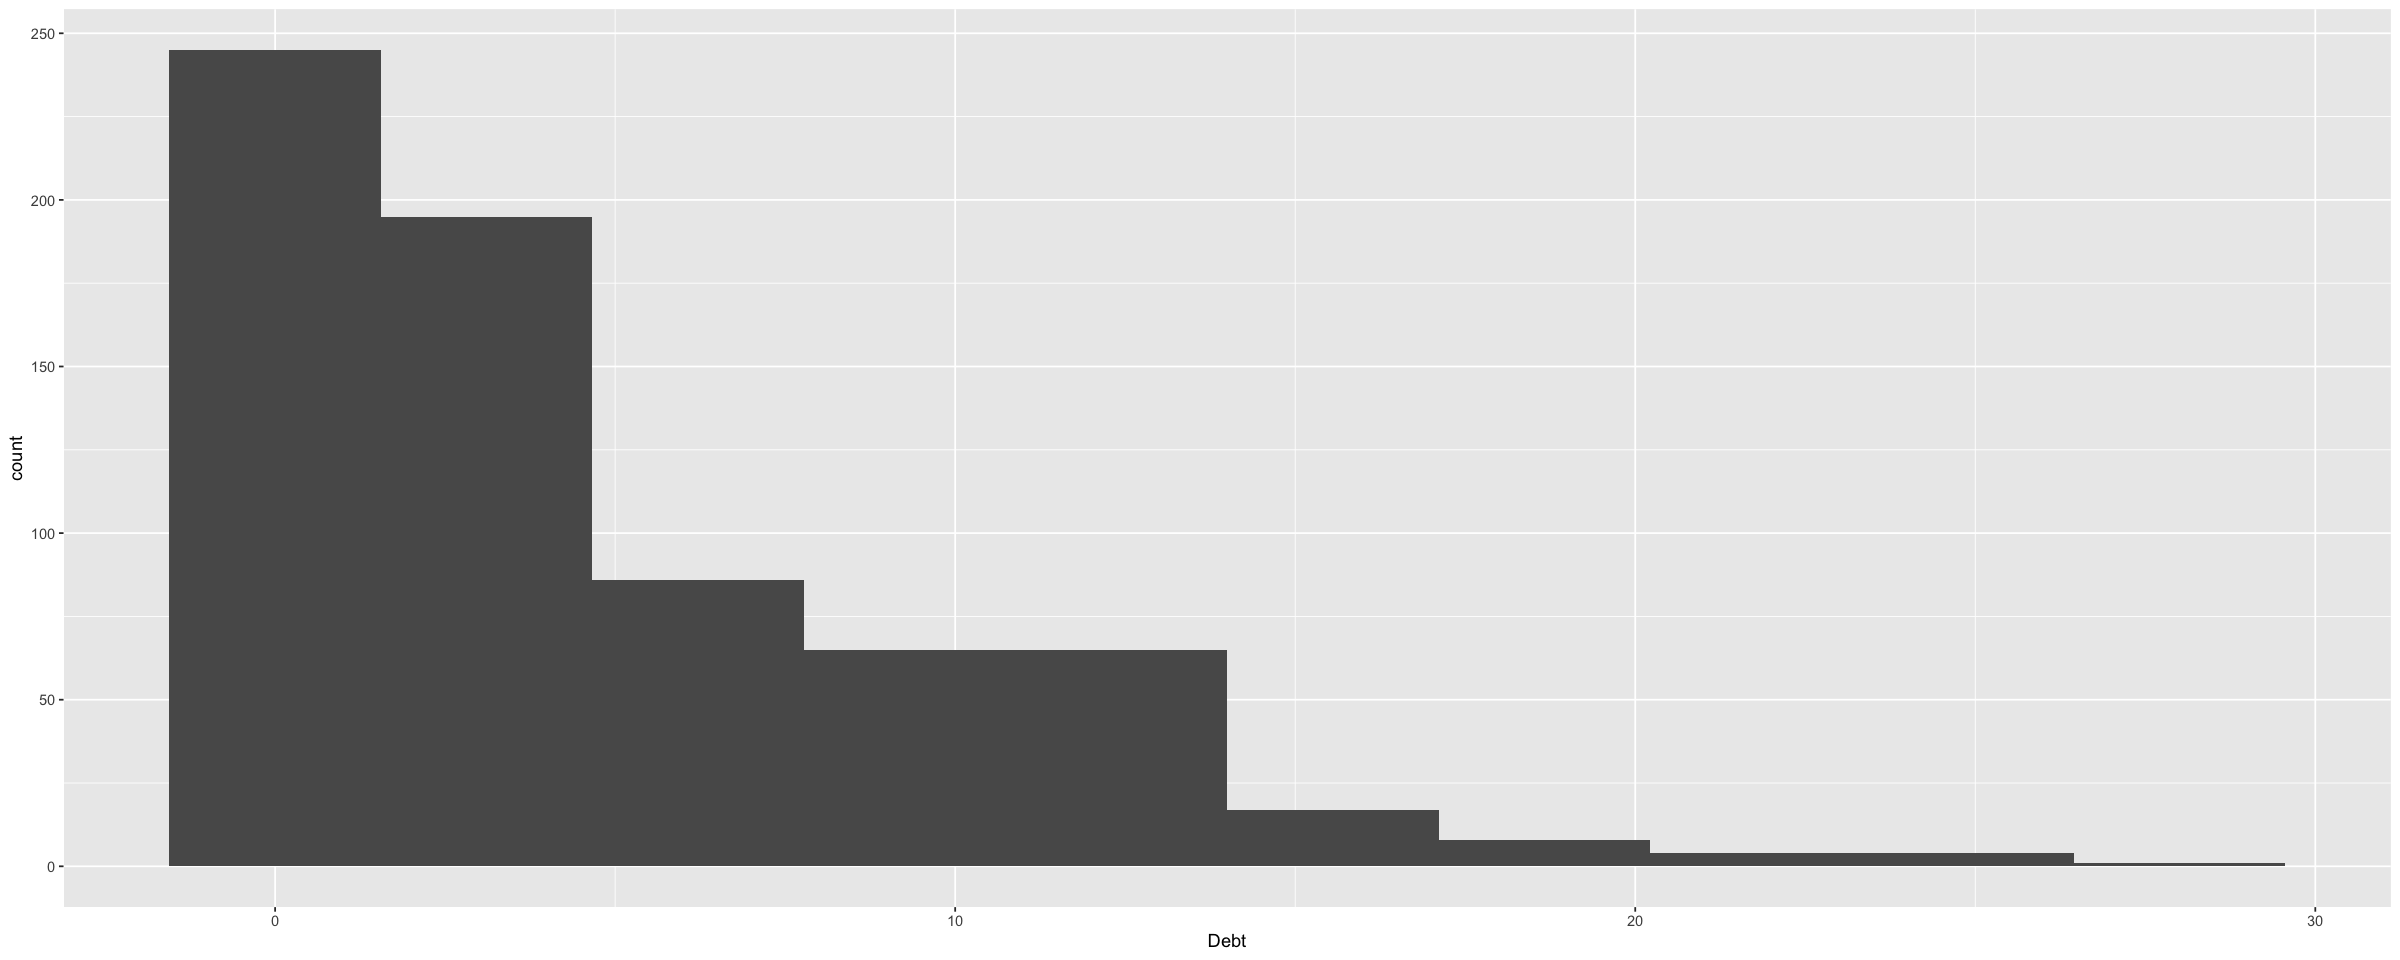

In [25]:
##3. Debt ratio 
ggplot(credit_data,aes(Debt))+geom_histogram(bins=10)

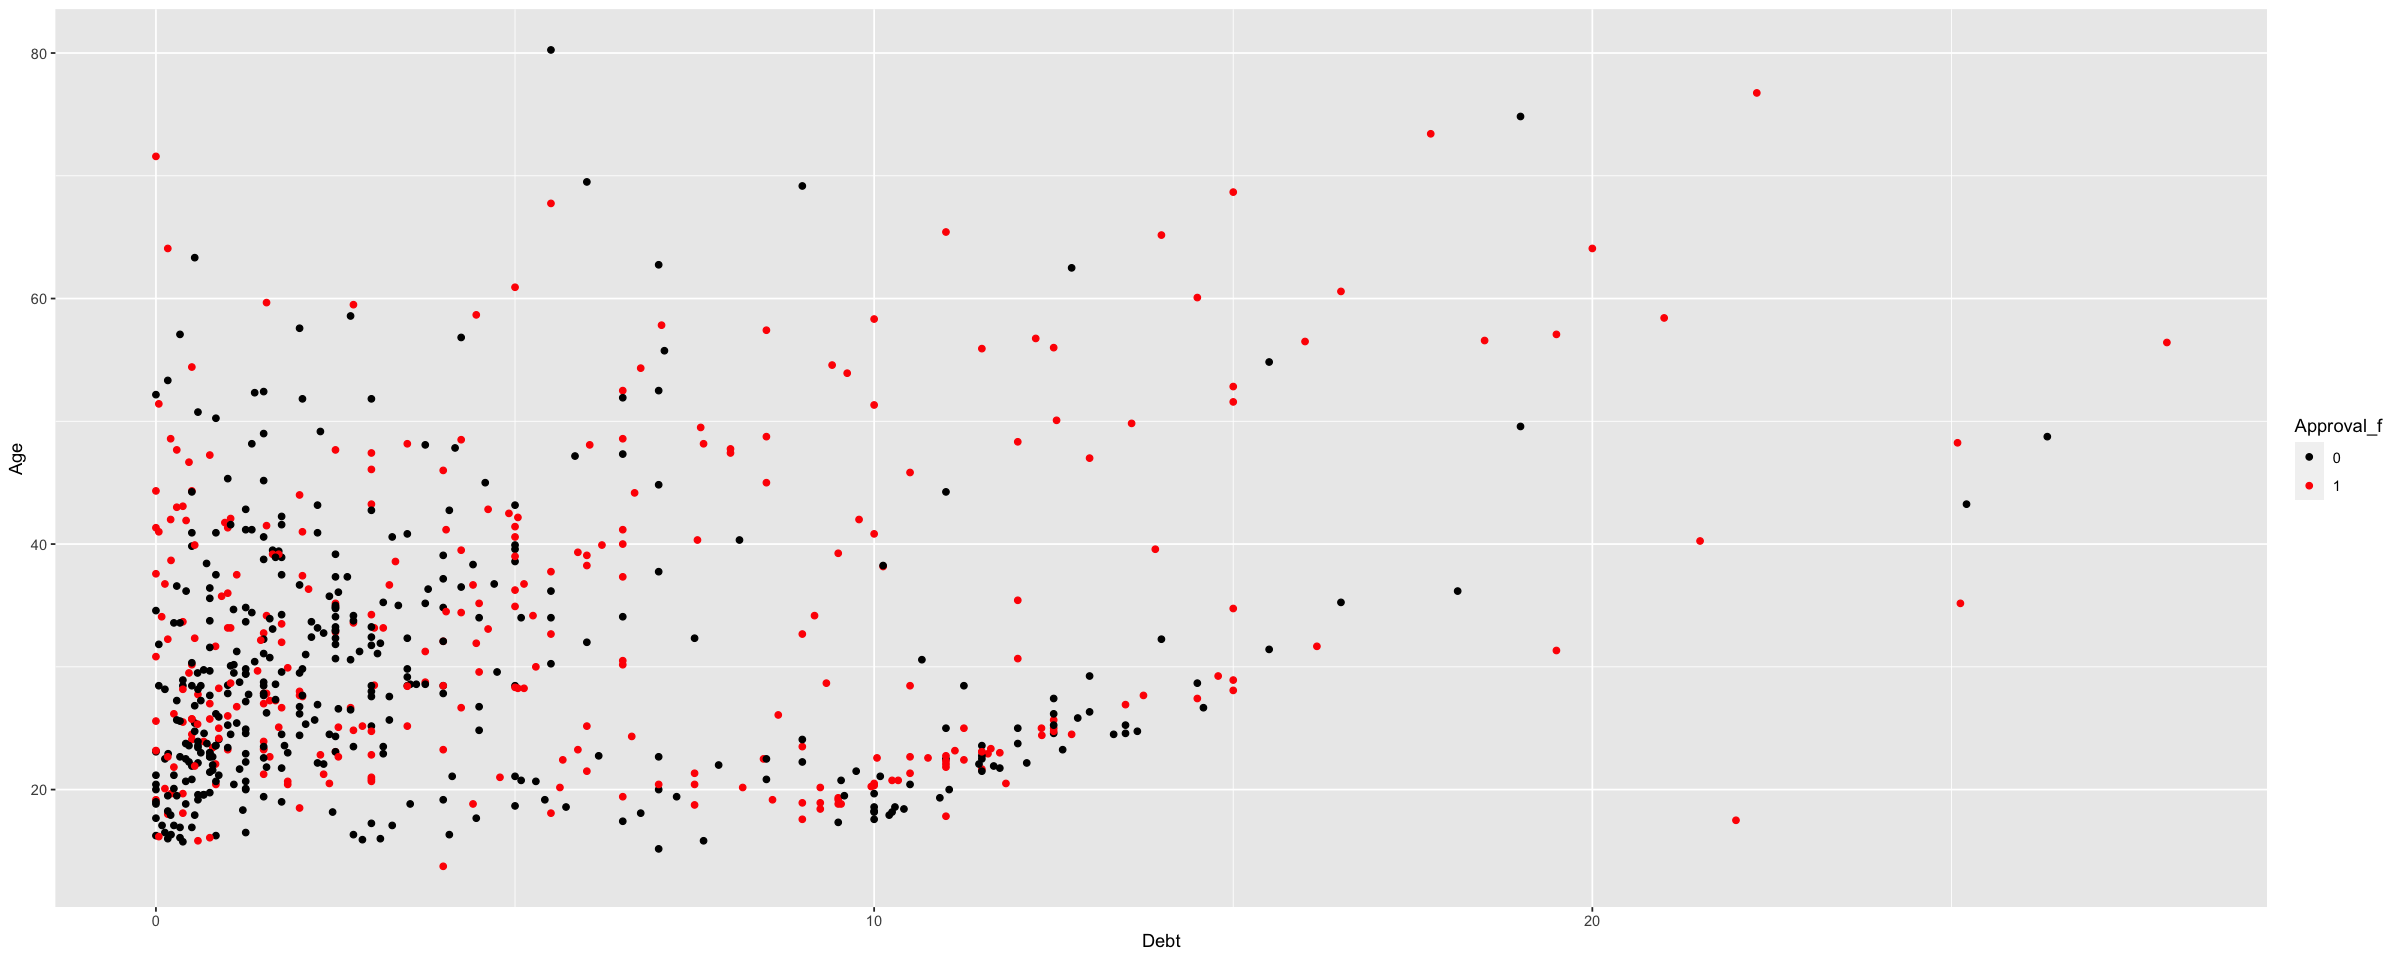

In [26]:
ggplot(credit_data,mapping=aes(x=Debt,y=Age,color=Approval_f))+
    geom_point()+scale_color_manual(values=c("1"="Red","0"="Black"))



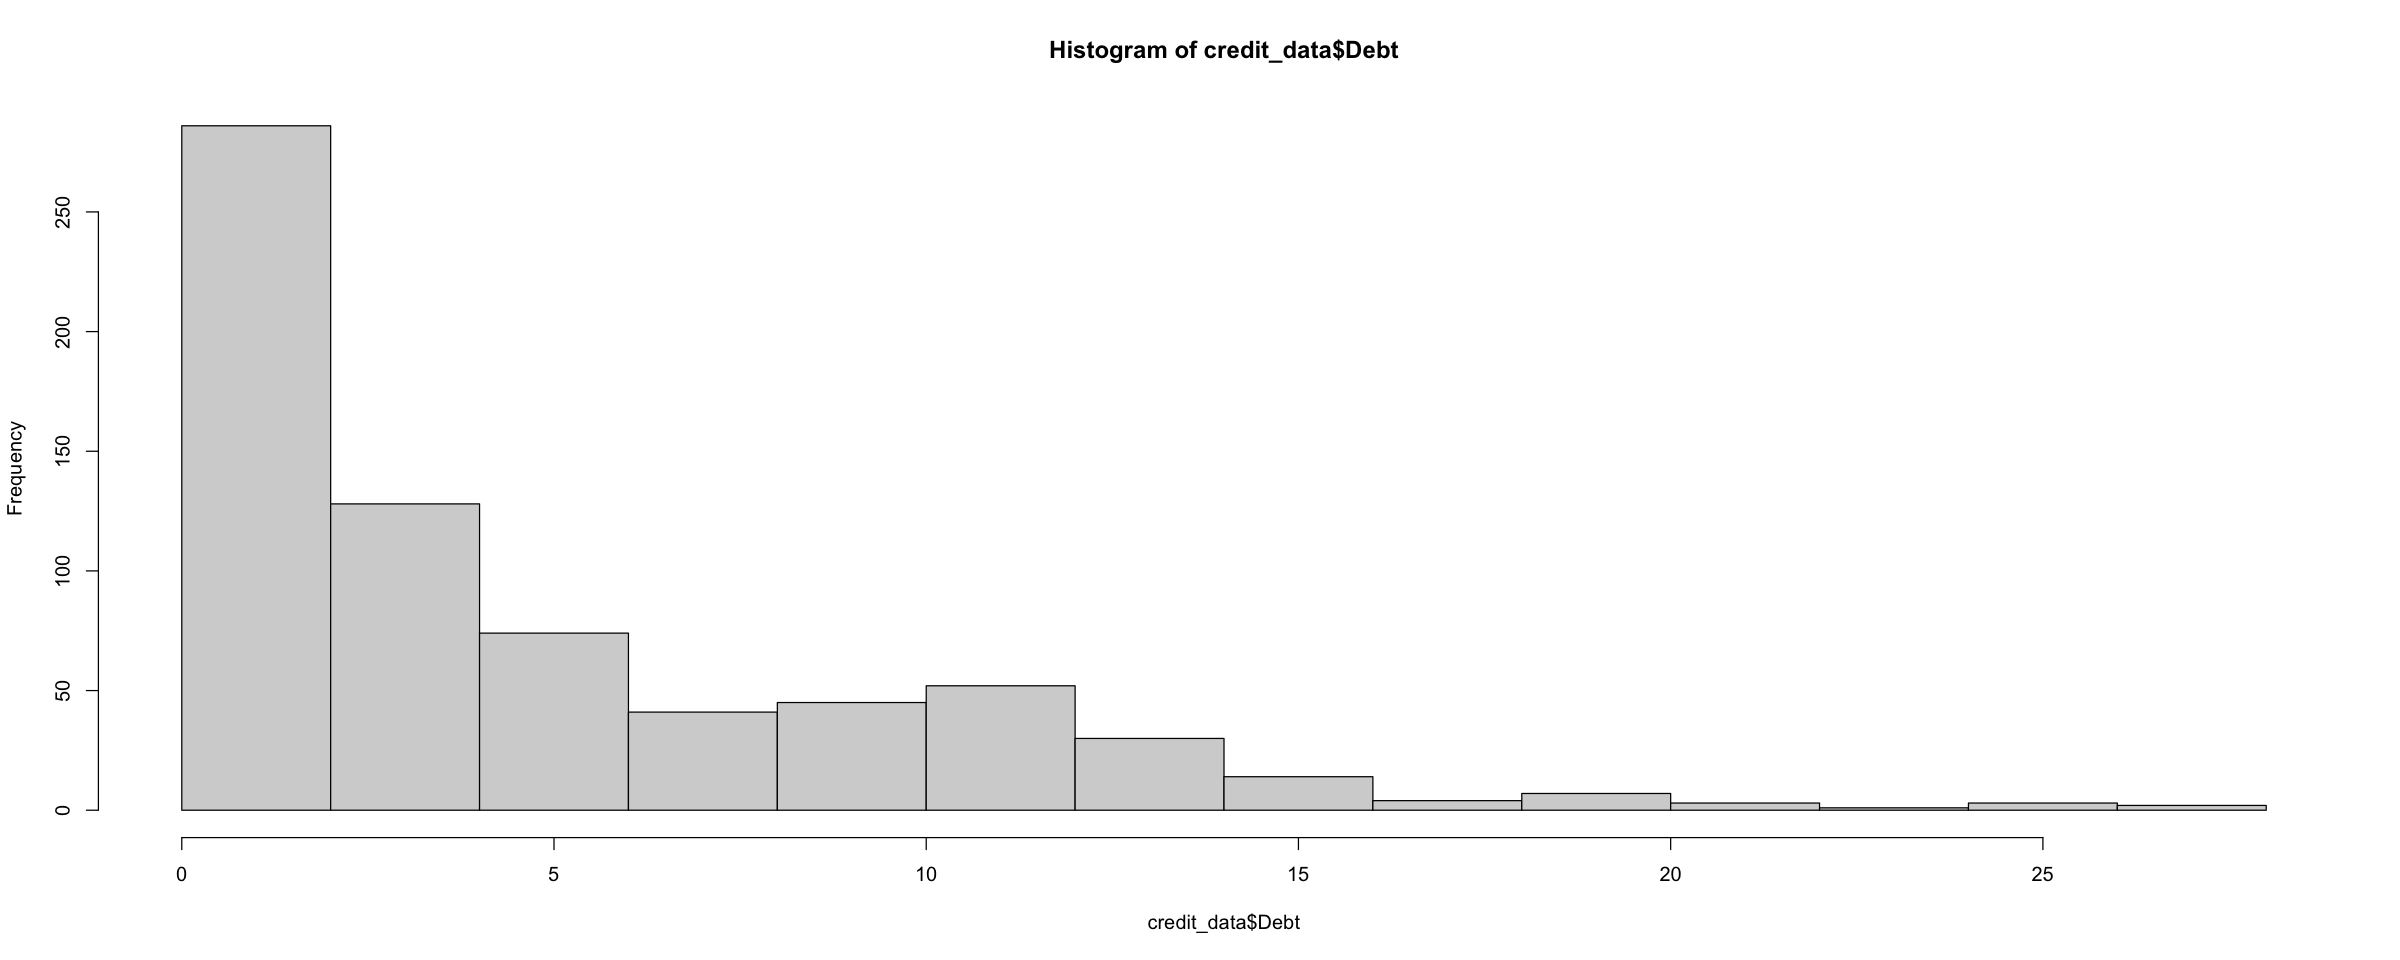

In [27]:
hist(credit_data$Debt)

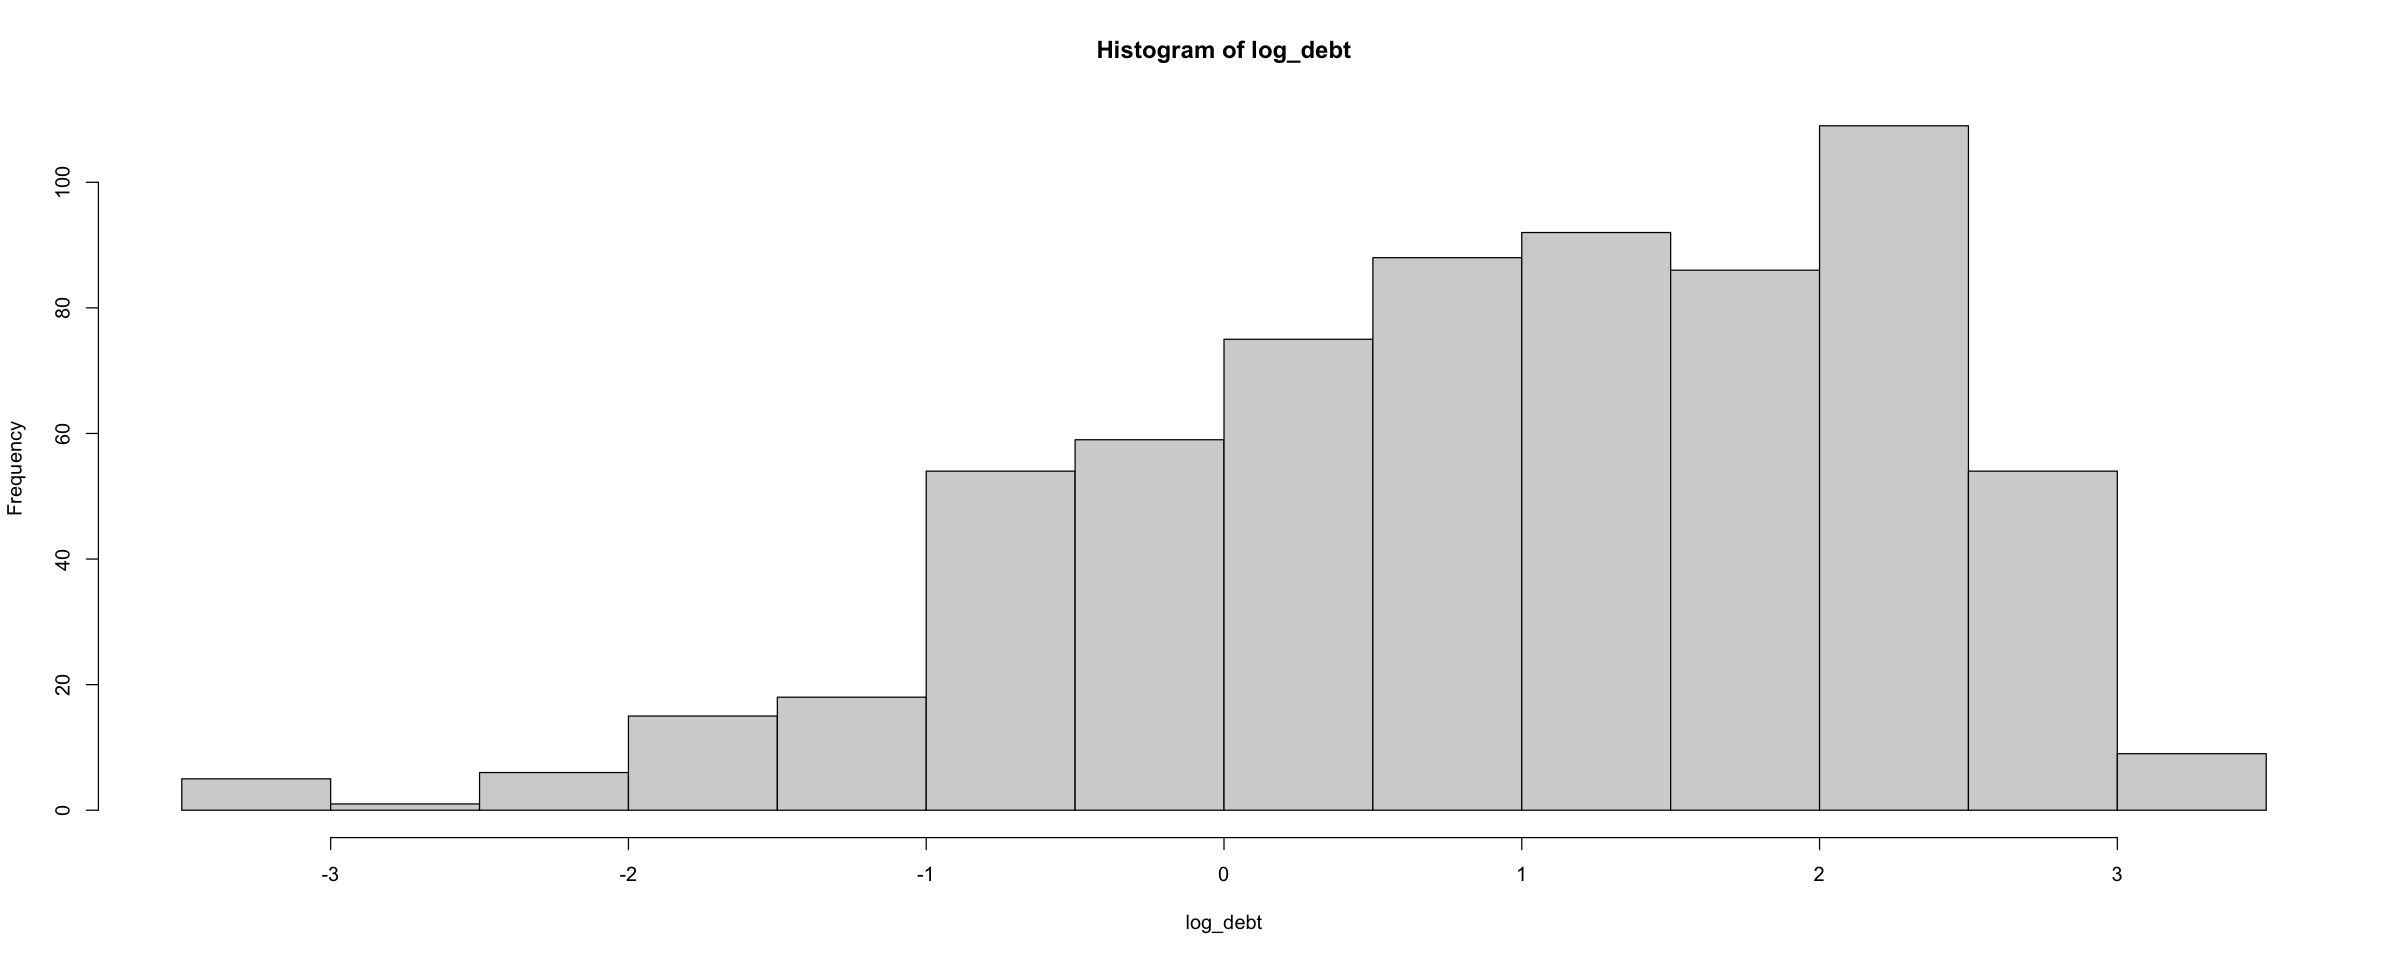

In [28]:
log_debt <-log(credit_data$Debt)
hist(log_debt)

### Age vs Marital Status 

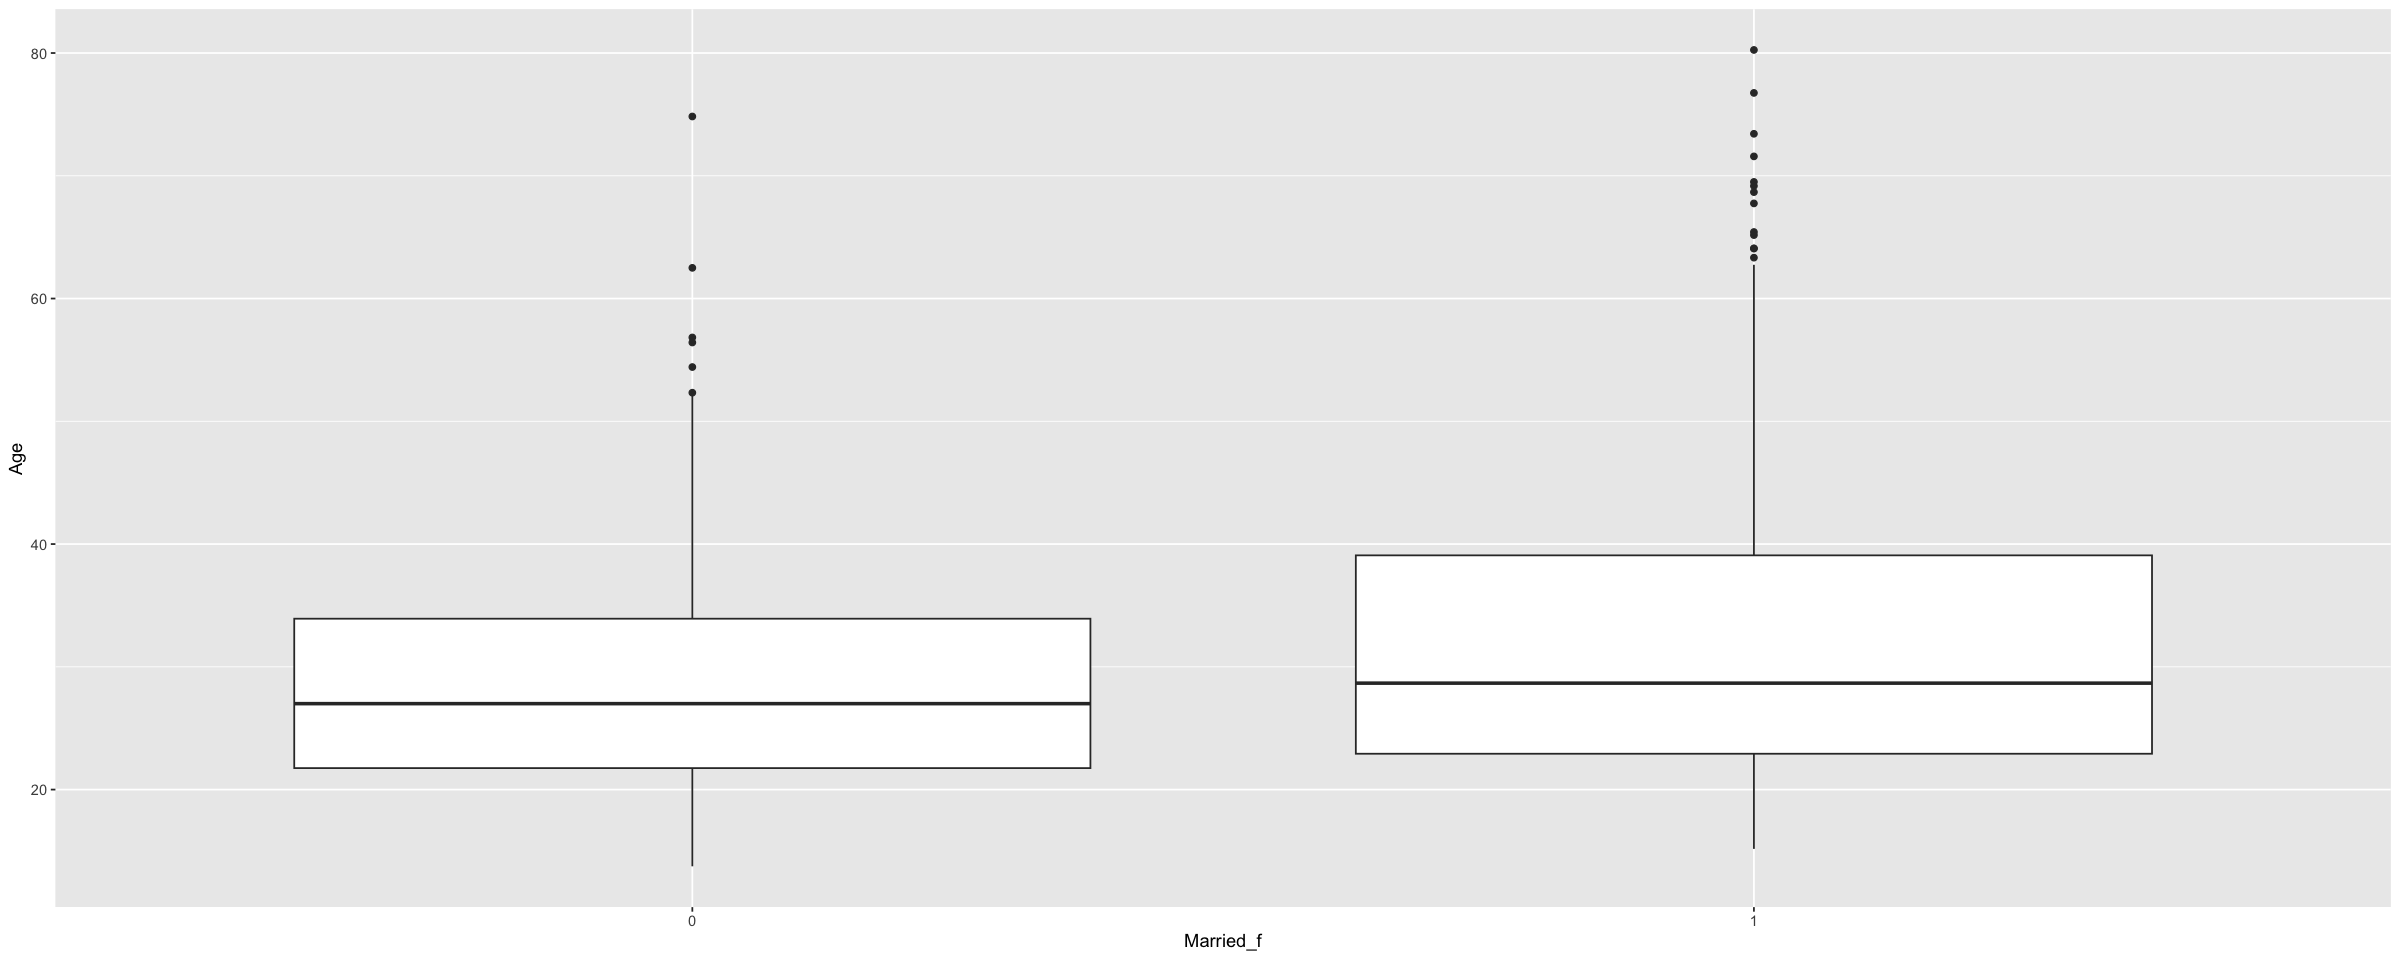

In [29]:
## younger age with higher debt
##4. Married status           
ggplot(credit_data,mapping=aes(x=Married_f,y=Age))+geom_boxplot()

### Approval by Bank Customer

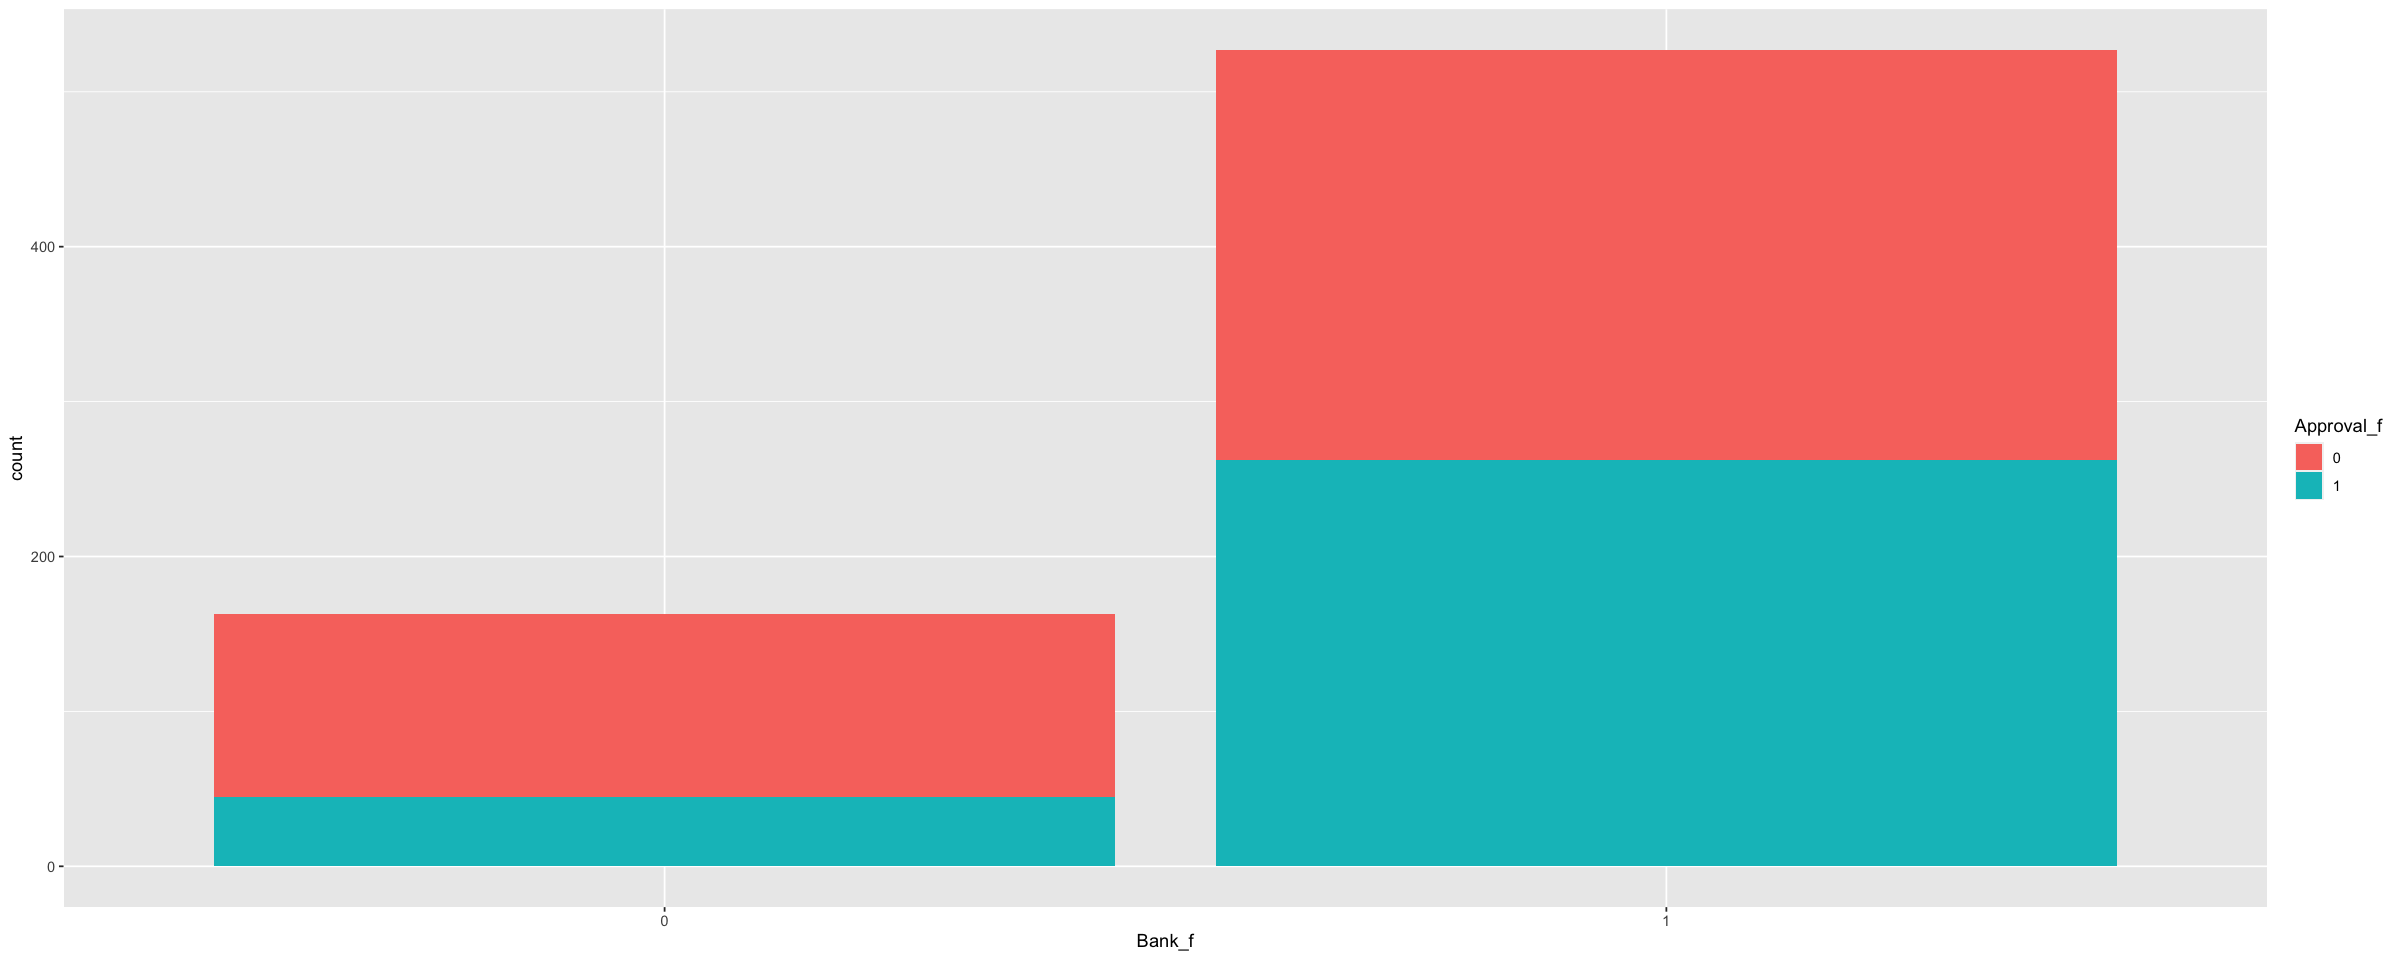

In [30]:
## 5: Bank Customer 
ggplot(credit_data)+geom_bar(mapping=aes(x=Bank_f,fill=Approval_f))

### Approval by Ethnicity

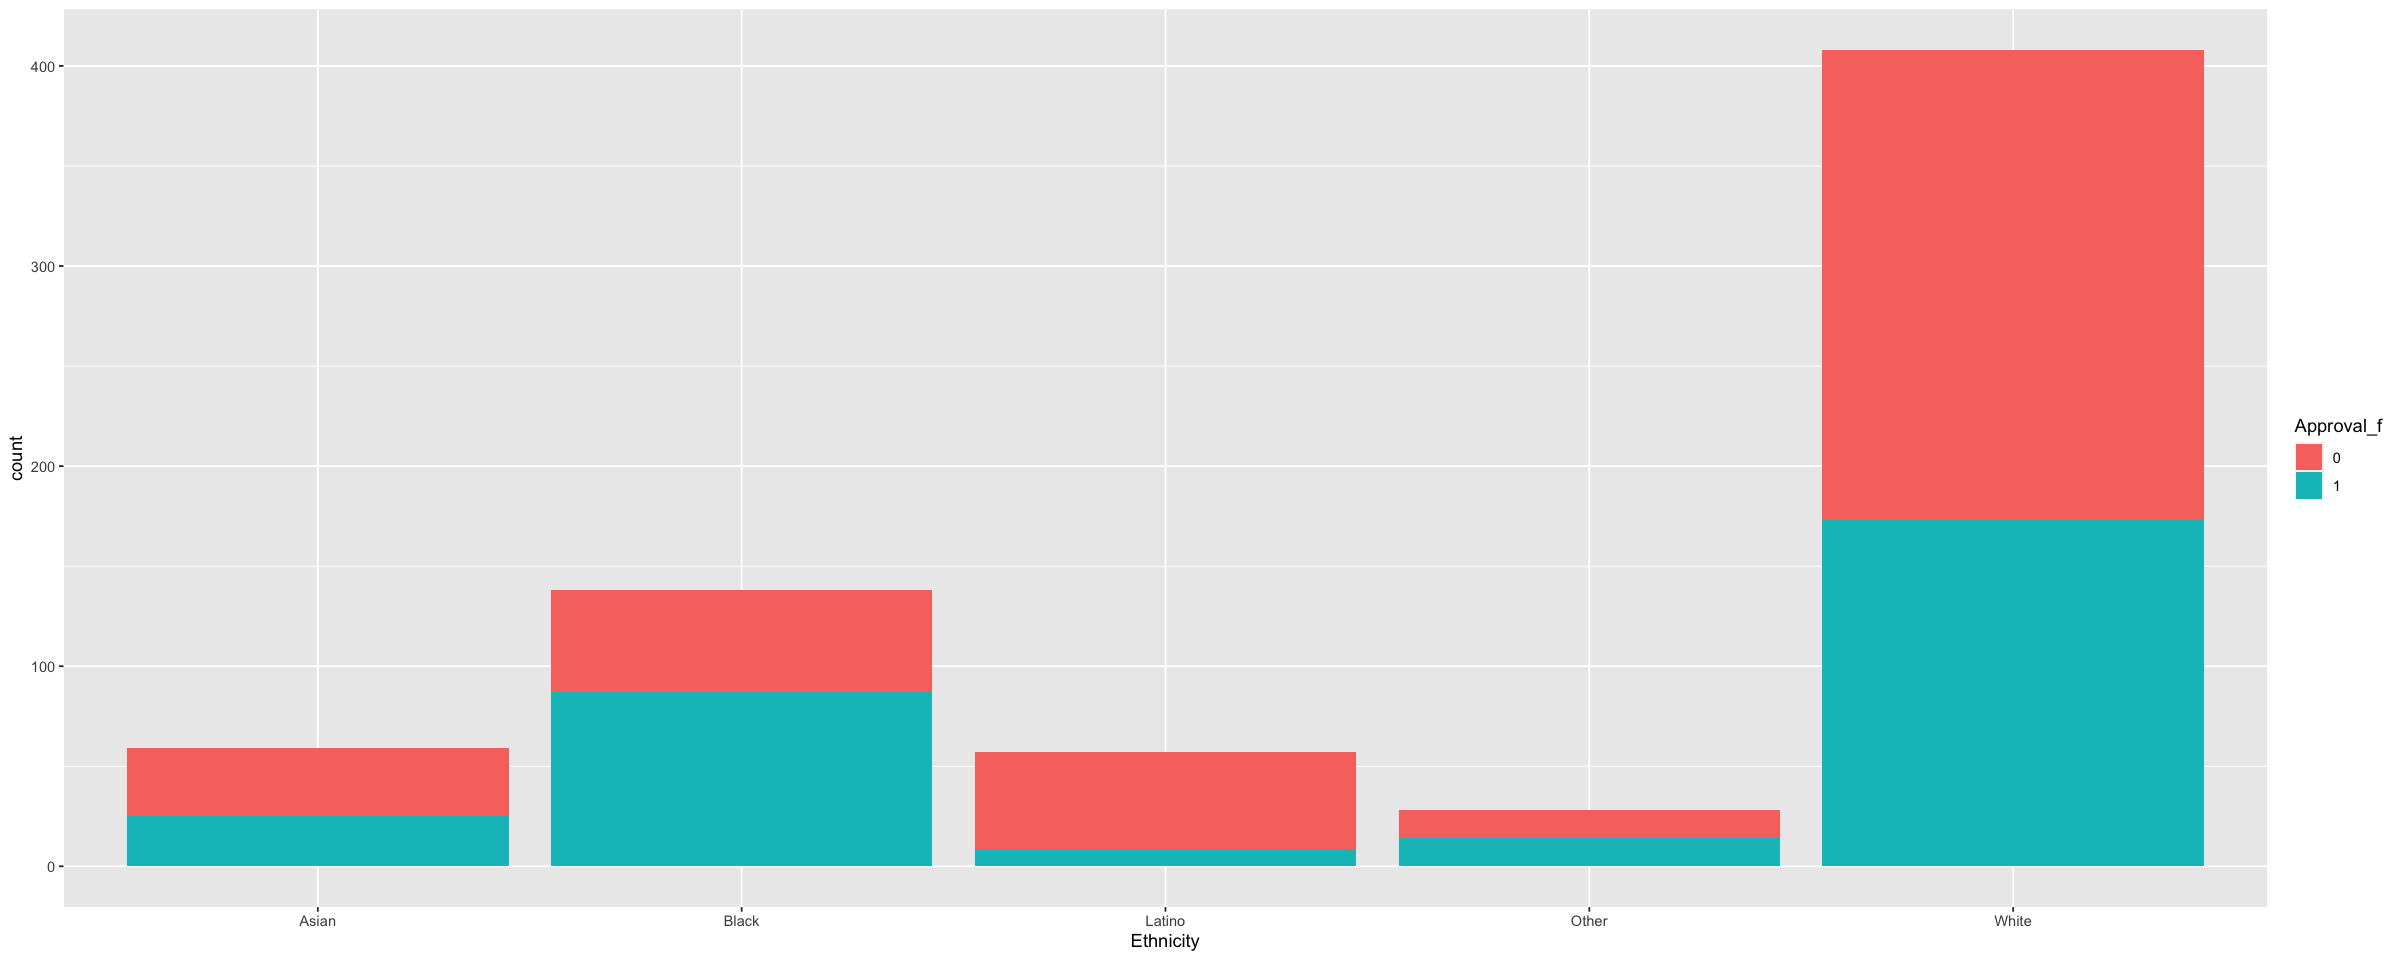

In [31]:

##7: ethnicity 
ggplot(credit_data)+geom_bar(mapping=aes(x=Ethnicity,fill=Approval_f))

### Years of Employment

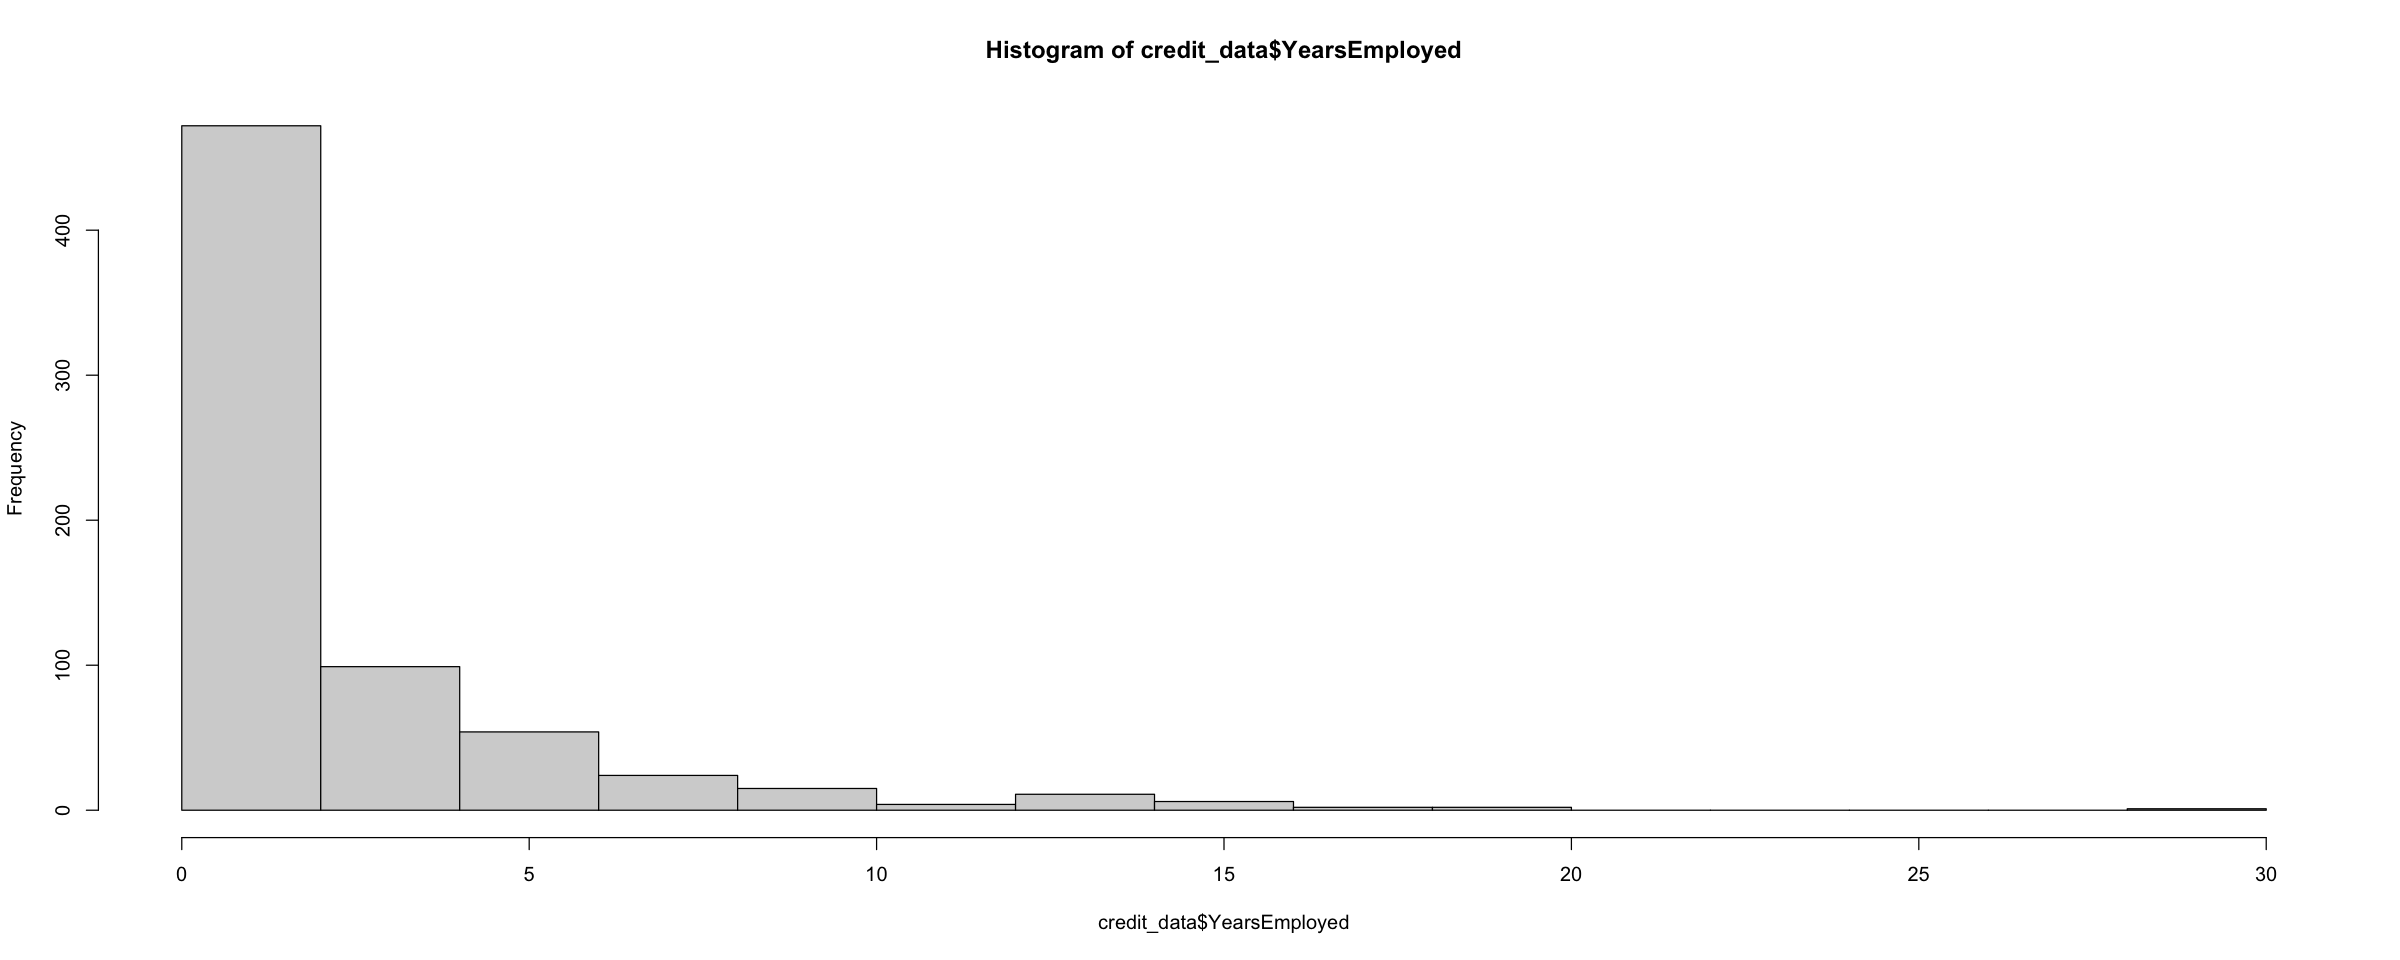

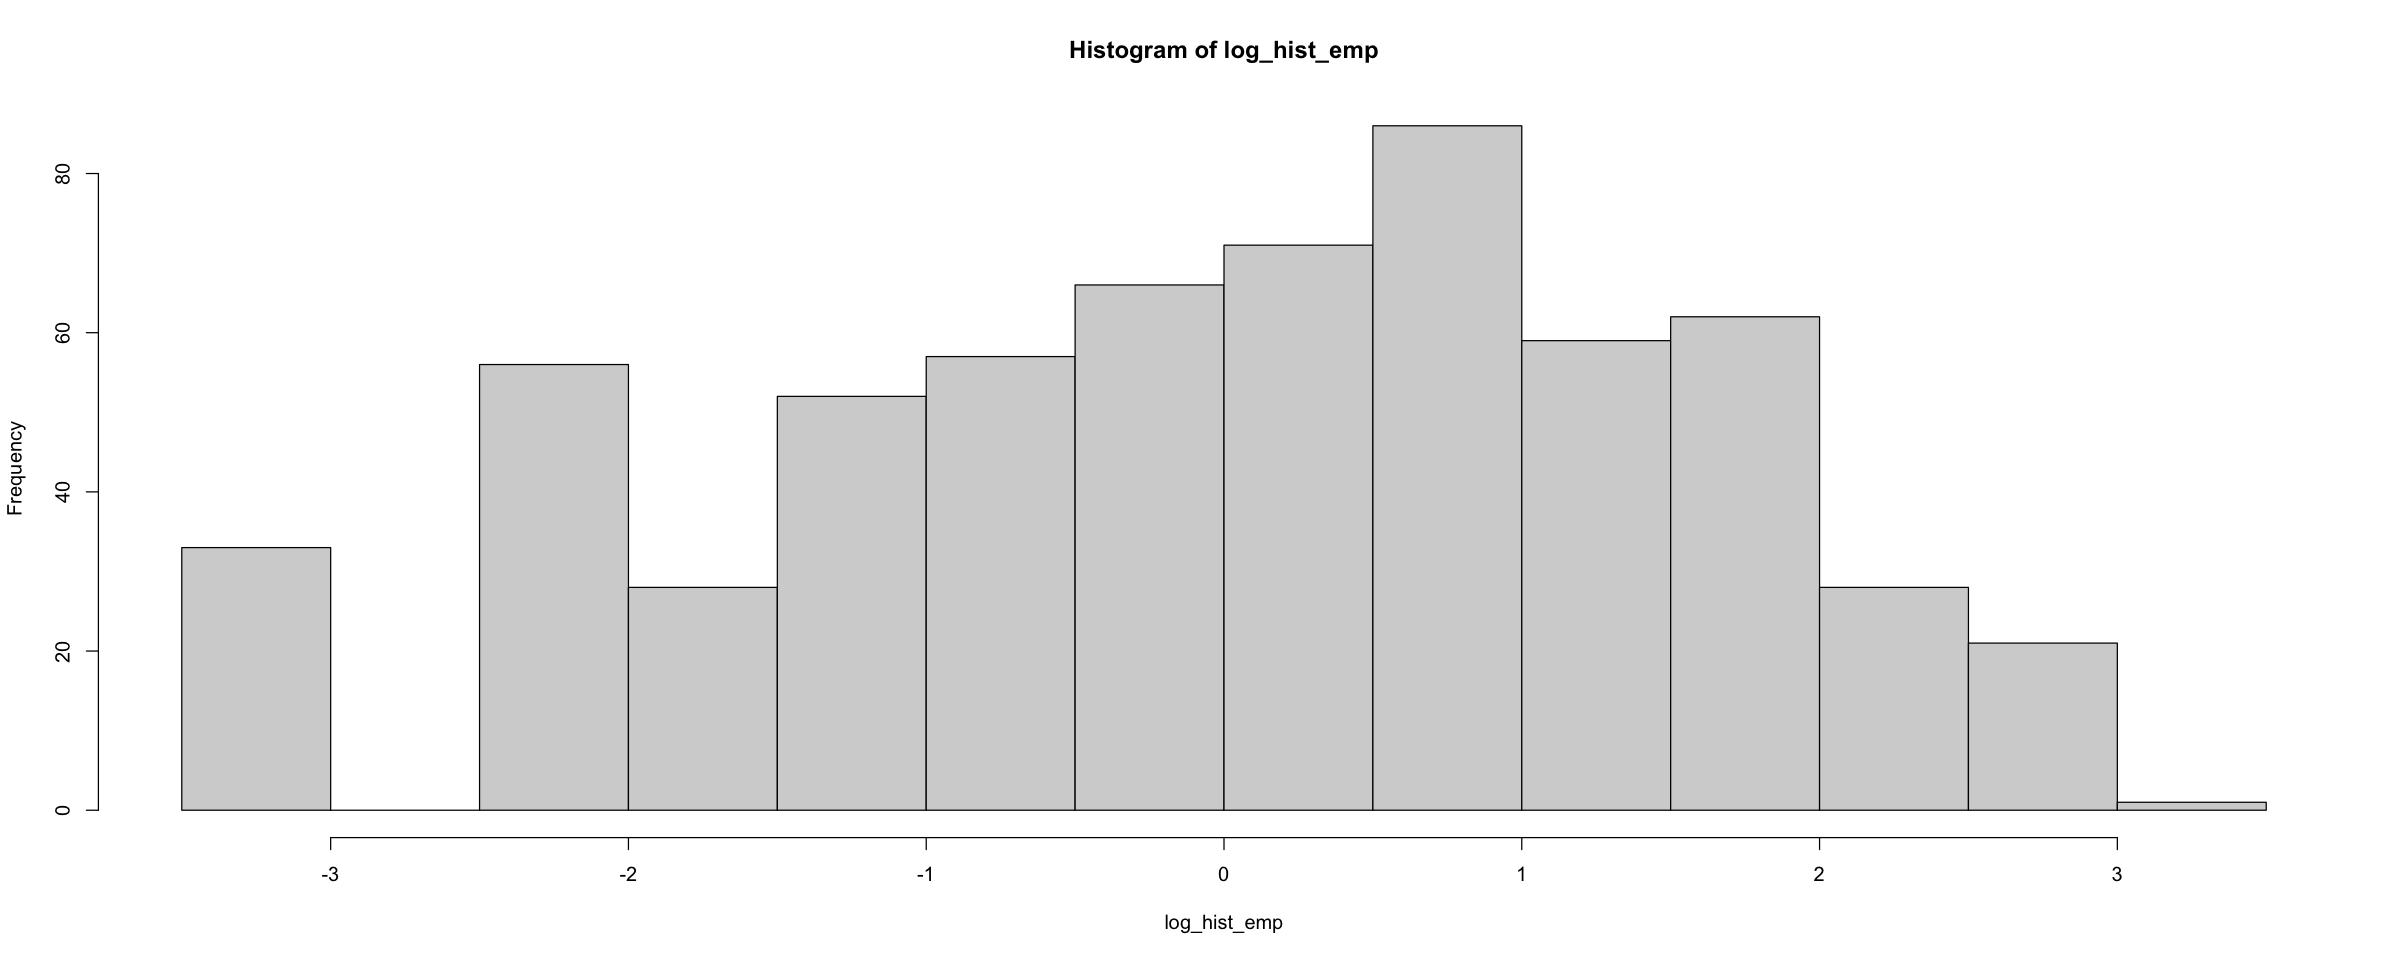

In [32]:
## 8: Years of employment
hist(credit_data$YearsEmployed)
log_hist_emp <-log(credit_data$YearsEmployed)
hist(log_hist_emp)

### Credit Score

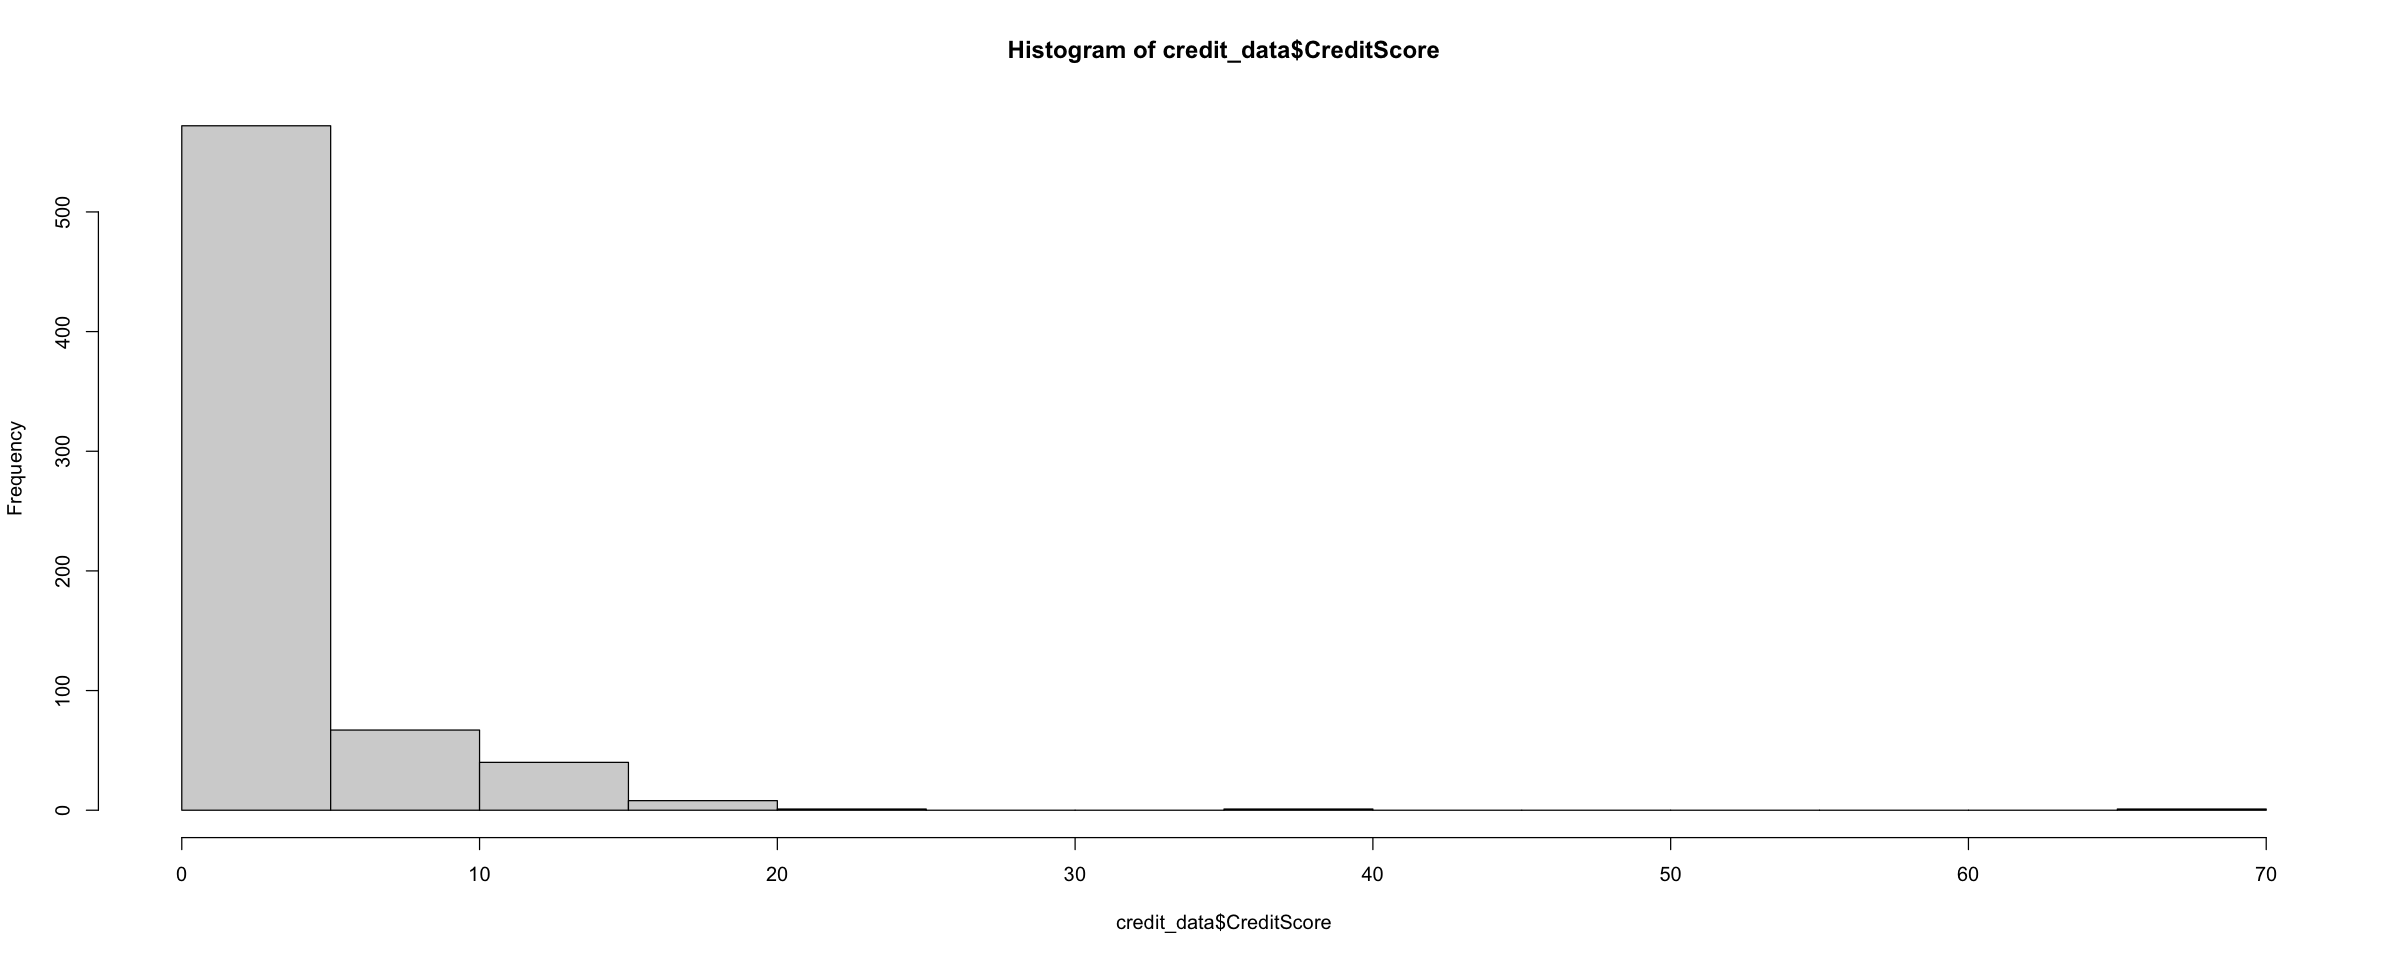

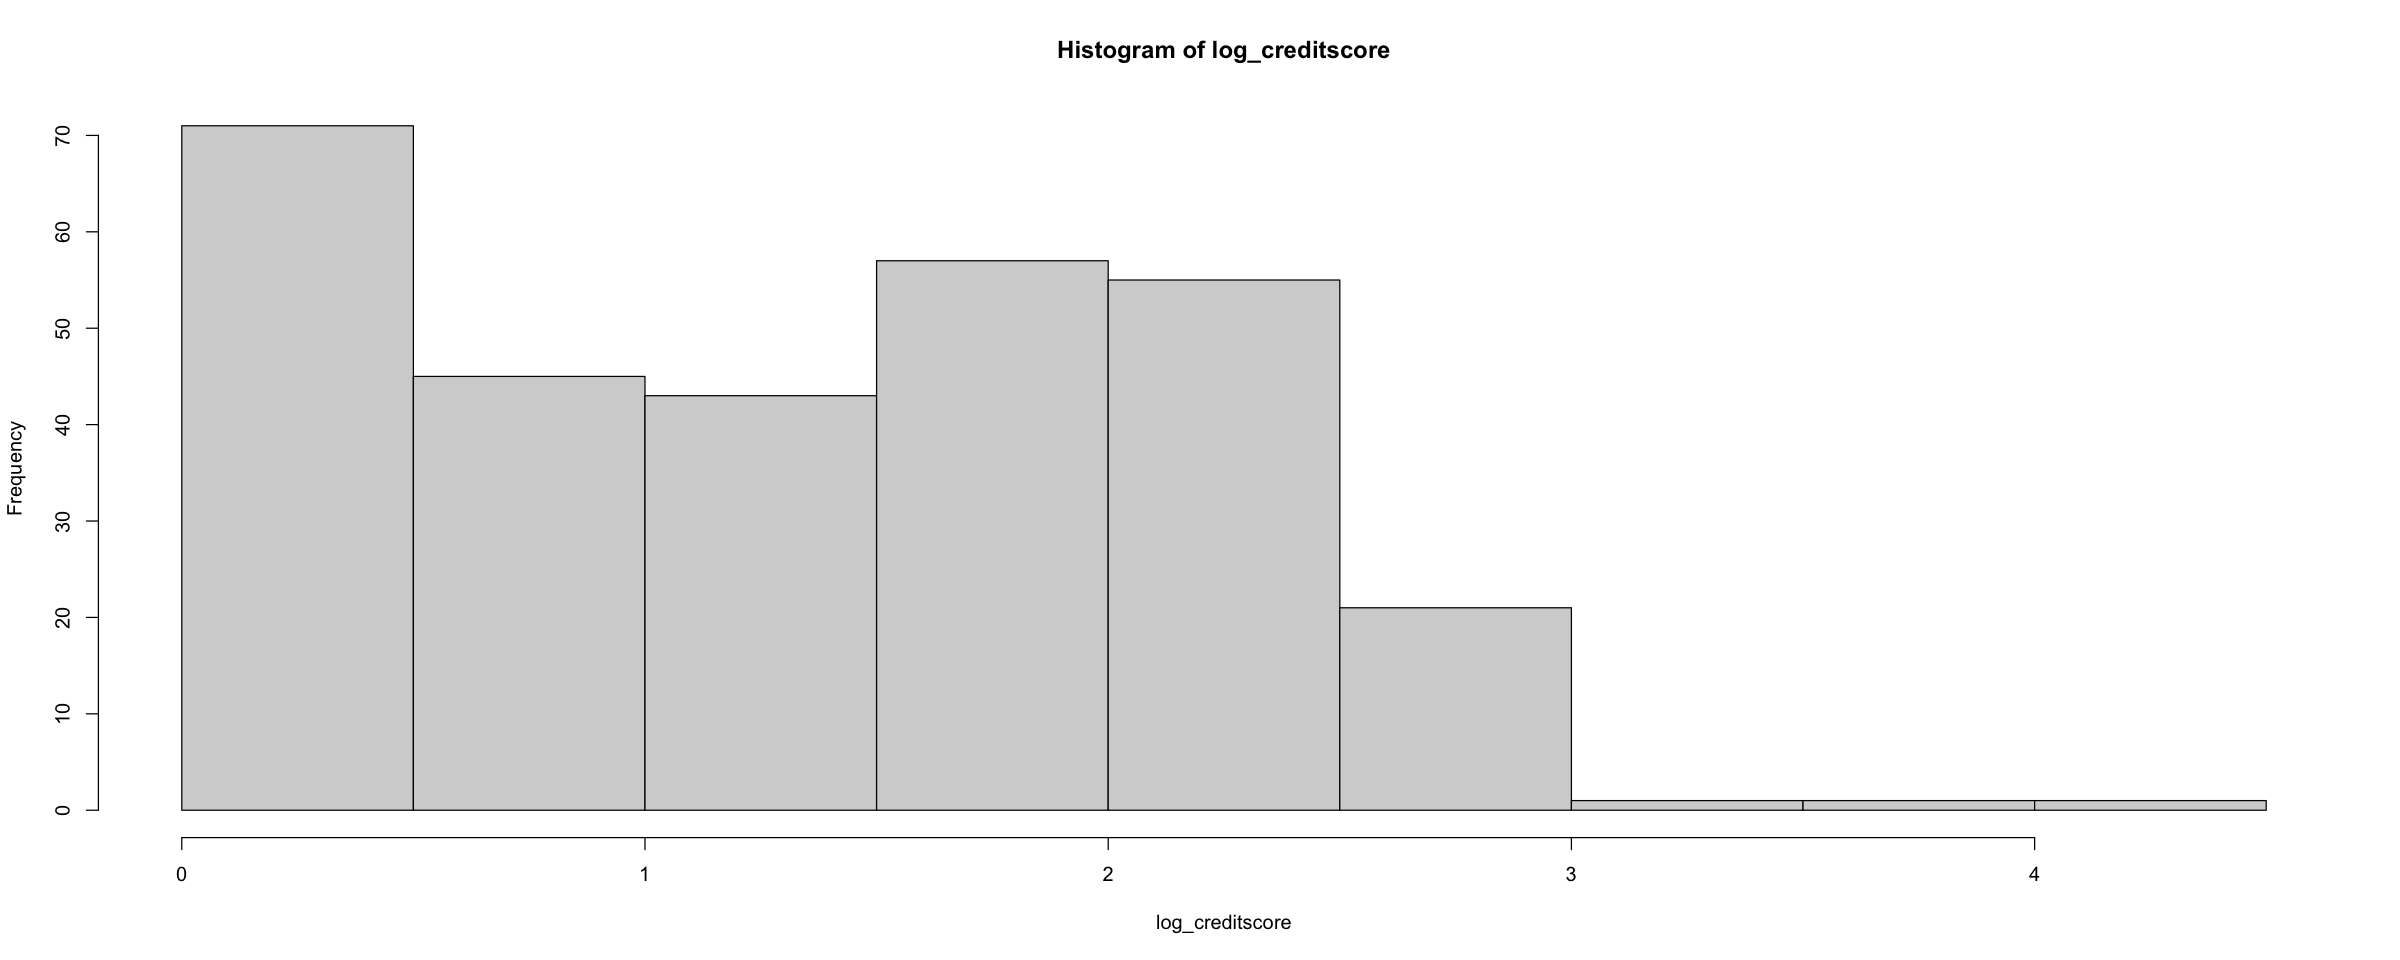

In [33]:
##Credit score
hist(credit_data$CreditScore)
log_creditscore <-log(credit_data$CreditScore)
hist(log_creditscore)

### Income

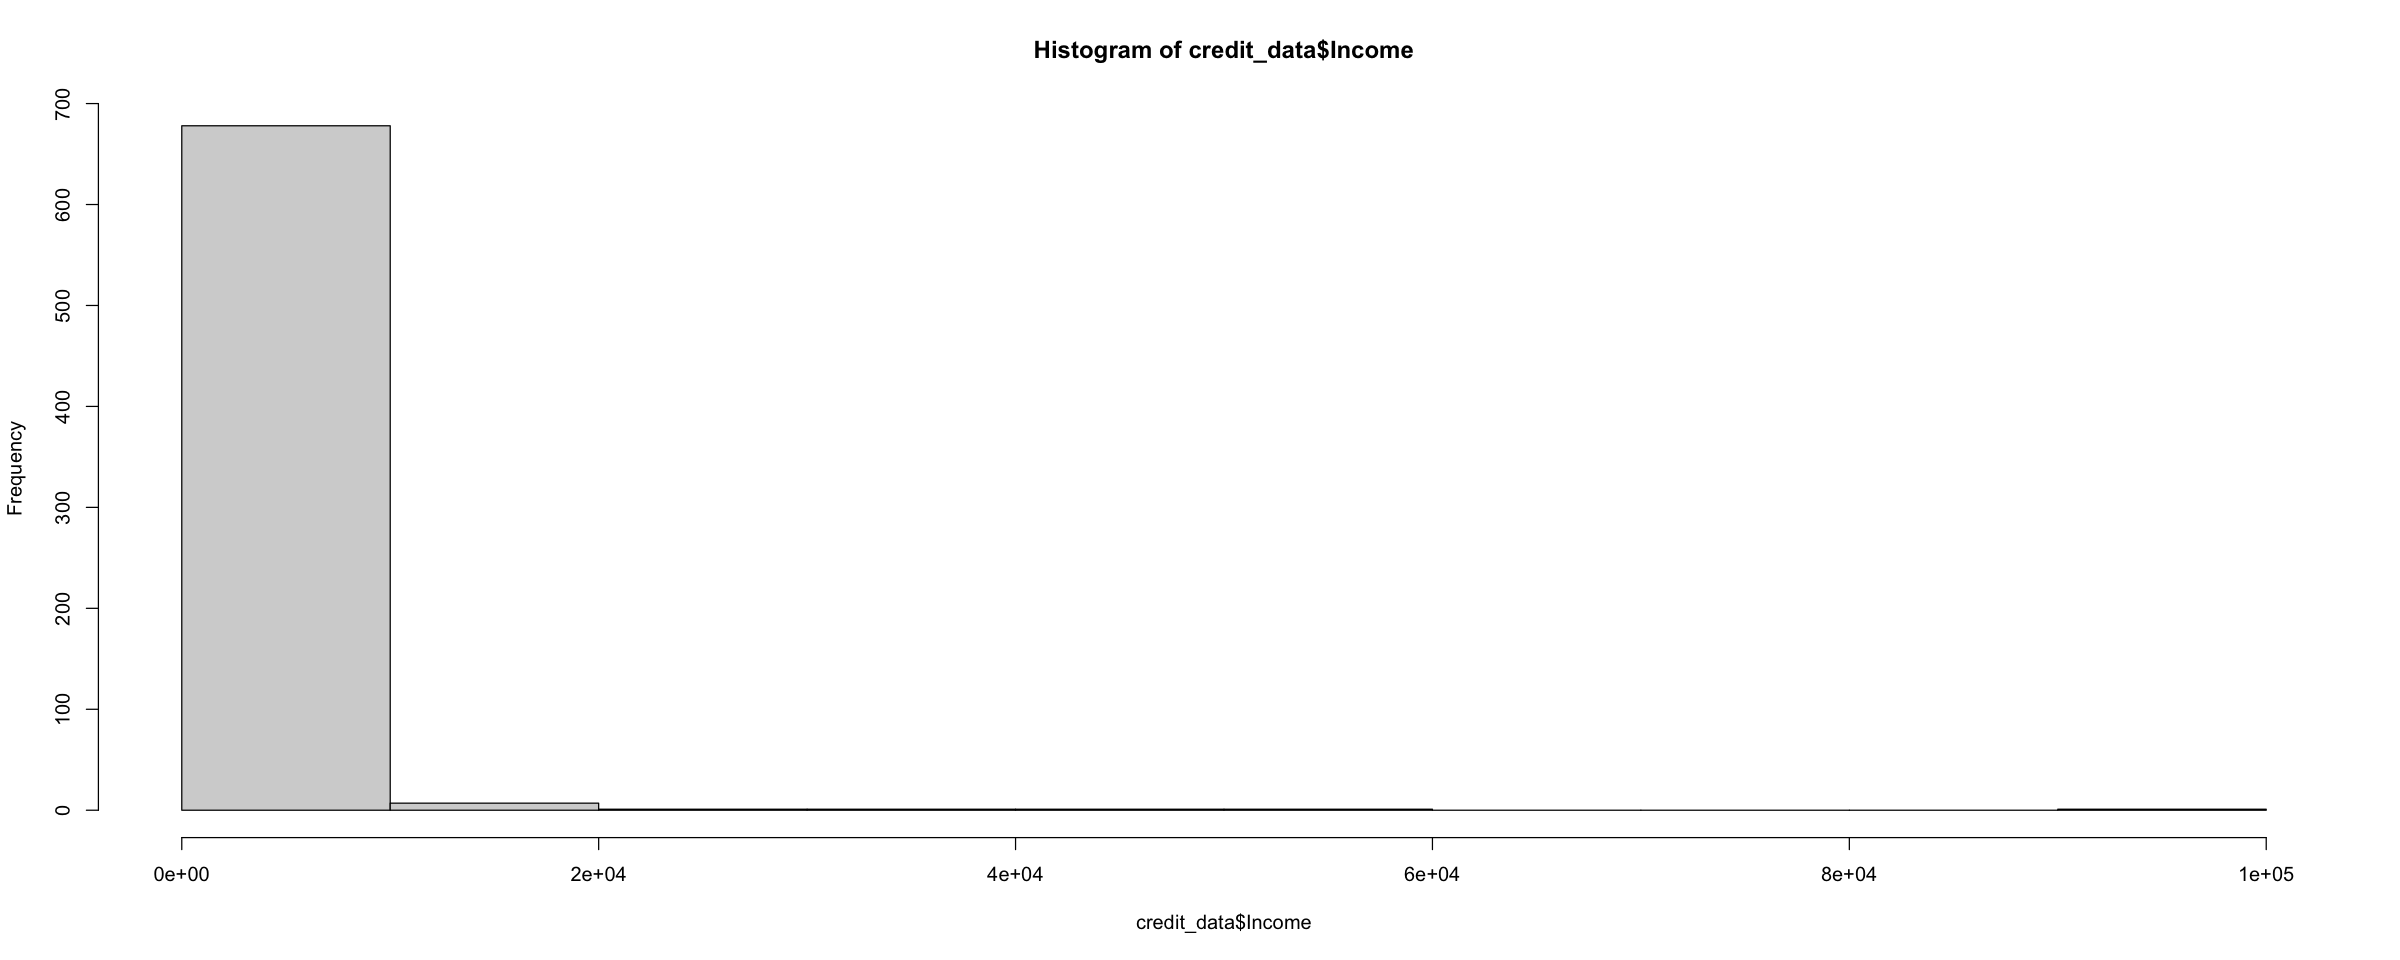

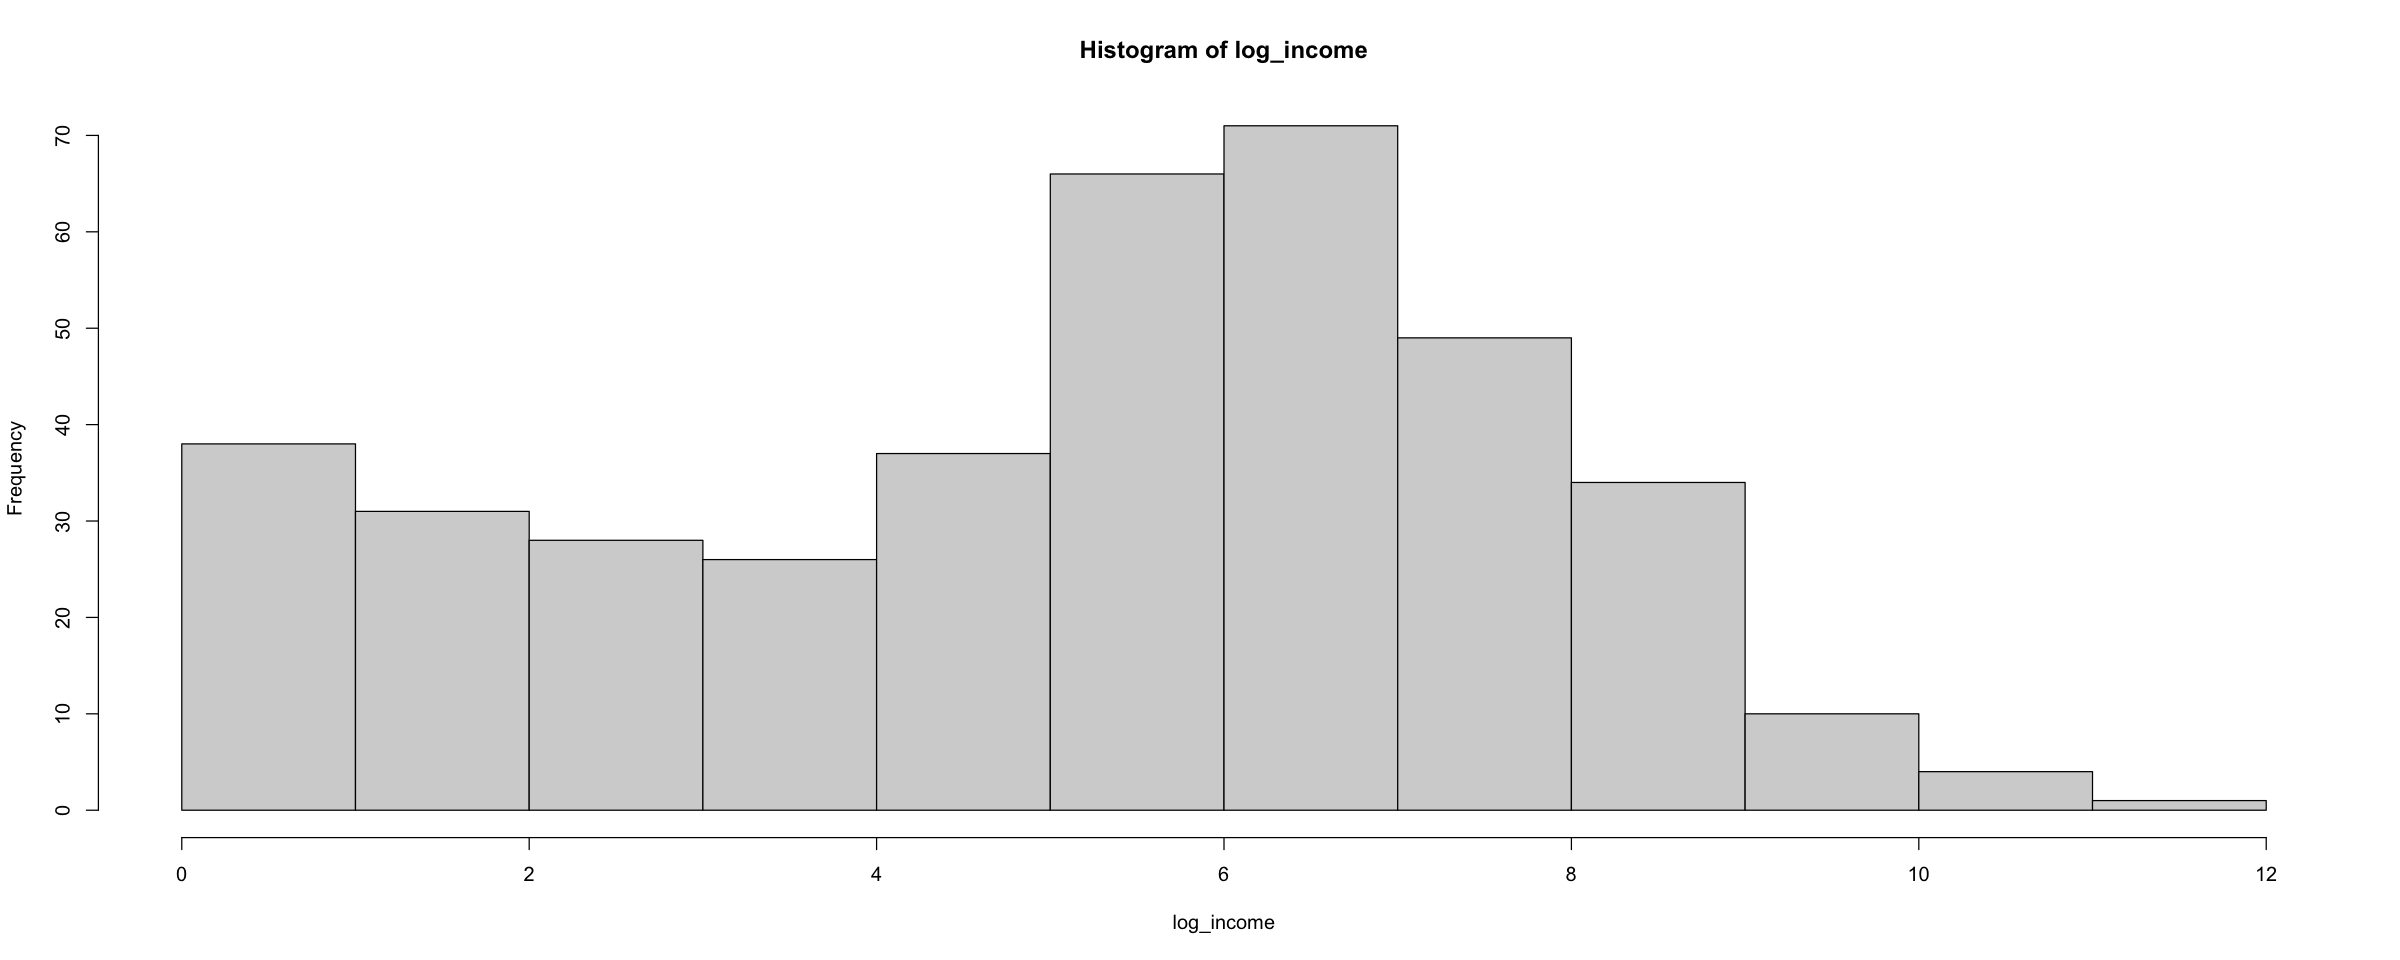

In [34]:
##9:Income
hist(credit_data$Income)
log_income <-log(credit_data$Income)
hist(log_income)

### Correlation Analysis

In [35]:
## Look like the 5 continuous datas: age, debt, credit score, income and years of employment need log or some sort of transformation
## elaborate w/ team on continuing repeating show the regression on each factor to the approval decision 

# subset data to remove category variable to test for correlation 
sub_credit_data <- credit_data[,-c(6,7,14,13,16)]
df <- cor(sub_credit_data)
df

## Noticing "married" and "bank customer" are very highly correlated. 

Gender       Age        Debt        Married      BankCustomer
Gender          1.000000000 0.03504438 -0.04174623 -0.068062081 -0.07124988 
Age             0.035044382 1.00000000  0.20217658  0.106929081  0.09947676 
Debt           -0.041746227 0.20217658  1.00000000  0.074648785  0.08378141 
Married        -0.068062081 0.10692908  0.07464878  1.000000000  0.99203313 
BankCustomer   -0.071249883 0.09947676  0.08378141  0.992033126  1.00000000 
YearsEmployed   0.086544157 0.39146361  0.29890156  0.069944562  0.07590456 
PriorDefault   -0.026047320 0.20443402  0.24431672  0.145073167  0.13853521 
Employed       -0.077783549 0.08603706  0.17484594  0.175427610  0.17026817 
CreditScore    -0.024630280 0.18732737  0.27120674  0.113967757  0.11107681 
DriversLicense  0.051673692 0.05359861 -0.01302343 -0.009784401 -0.00240180 
Income         -0.002062996 0.01871871  0.12312115 -0.006898889  0.05727306 
               YearsEmployed PriorDefault Employed    CreditScore 
Gender         0.08654416    -0.02604732  -0.07778355 -0.024630280
Age            0.39146361     0.20443402   0.08603706  0.187327366
Debt           0.29890156     0.24431672   0.17484594  0.271206739
Married        0.06994456     0.14507317   0.17542761  0.113967757
BankCustomer   0.07590456     0.13853521   0.17026817  0.111076808
YearsEmployed  1.00000000     0.34568876   0.22298177  0.322329668
PriorDefault   0.34568876     1.00000000   0.43203236  0.379531965
Employed       0.22298177     0.43203236   1.00000000  0.571498114
CreditScore    0.32232967     0.37953196   0.57149811  1.000000000
DriversLicense 0.13813938     0.09127576   0.01704281  0.006943759
Income         0.05134493     0.09001190   0.07765182  0.063692439
               DriversLicense Income      
Gender          0.051673692   -0.002062996
Age             0.053598611    0.018718715
Debt           -0.013023430    0.123121153
Married        -0.009784401   -0.006898889
BankCustomer   -0.002401800    0.057273056
YearsEmployed   0.138139381    0.051344929
PriorDefault    0.091275763    0.090011902
Employed        0.017042806    0.077651821
CreditScore     0.006943759    0.063692439
DriversLicense  1.000000000    0.019201414
Income          0.019201414    1.000000000

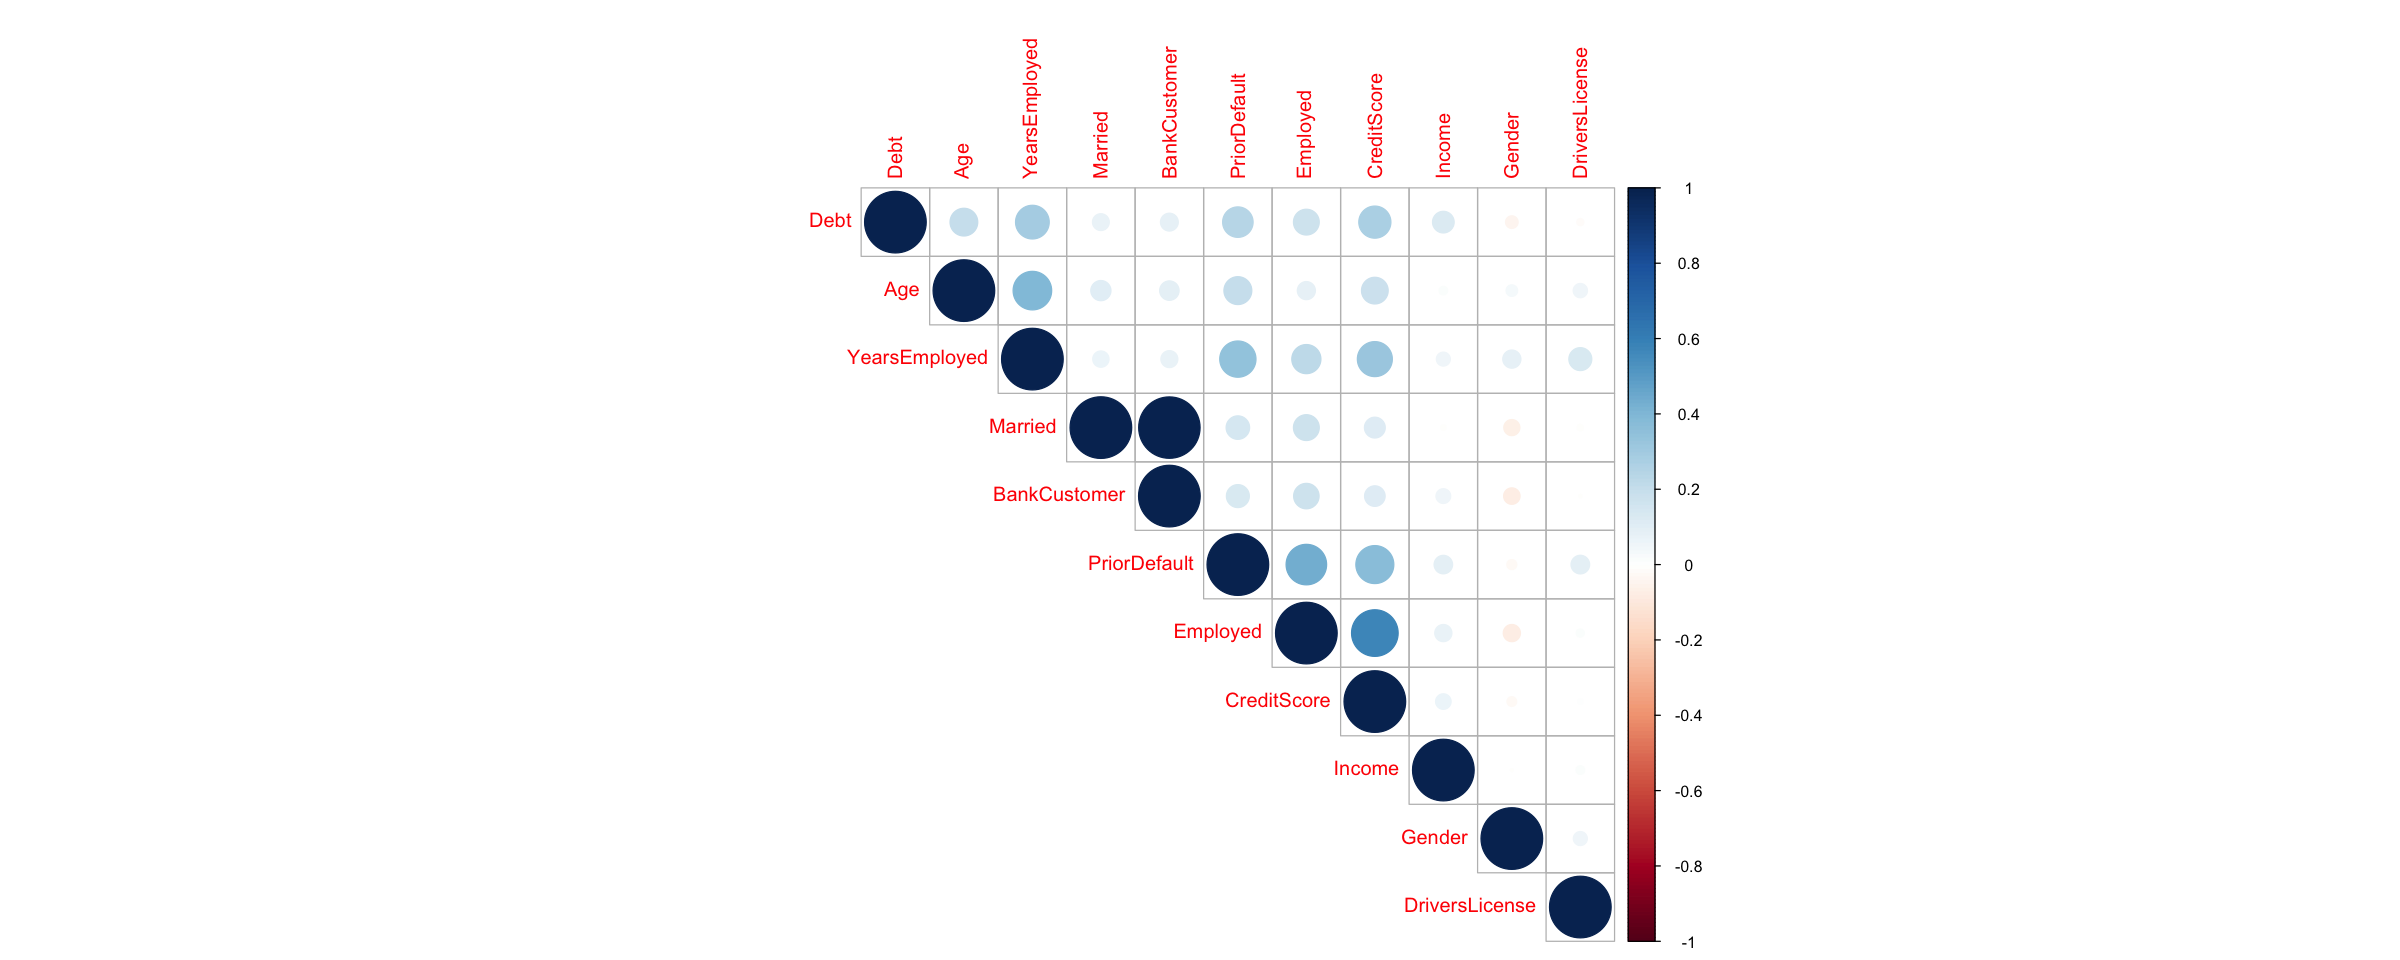

In [36]:
corrplot(df,type="upper",order="hclust")

### Variance Infaltion Factor (VIF)

In [37]:
# Running a basic linear model regression to quickly check 1: statistically significant factors. 2 : multicollineary. 
##exclude Zipcode .. should I exclude industry as well??? 
credit_data <-credit_data[,-14]
model_init <-glm(credit_data$Approved~.,data=credit_data,family='binomial')
summary(model_init)
## Significant factors: Priordefault,employed, citizen,creditscore
vif(model_init)


Call:
glm(formula = credit_data$Approved ~ ., family = "binomial", 
    data = credit_data)

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -4.360e+00  9.929e-01  -4.391 1.13e-05 ***
Gender                        -6.598e-02  3.040e-01  -0.217 0.828161    
Age                            2.819e-03  1.220e-02   0.231 0.817325    
Debt                          -1.207e-02  2.856e-02  -0.423 0.672587    
Married                       -1.512e+01  6.946e+02  -0.022 0.982636    
BankCustomer                   1.583e+01  6.946e+02   0.023 0.981820    
IndustryConsumerDiscretionary -3.221e-01  7.579e-01  -0.425 0.670830    
IndustryConsumerStaples       -1.407e-01  6.705e-01  -0.210 0.833816    
IndustryEducation              4.274e-02  1.027e+00   0.042 0.966799    
IndustryEnergy                 2.675e-01  6.040e-01   0.443 0.657856    
IndustryFinancials            -2.860e-01  6.957e-01  -0.411 0.680972    
IndustryHealthca

GVIF         Df GVIF^(1/(2*Df))
Gender         1.194639e+00  1    1.092995    
Age            1.316456e+00  1    1.147369    
Debt           1.166989e+00  1    1.080273    
Married        5.189151e+06  1 2277.970732    
BankCustomer   5.189151e+06  1 2277.970815    
Industry       9.491239e+01 13    1.191382    
Ethnicity      6.232779e+01  4    1.676236    
YearsEmployed  1.308733e+00  1    1.143999    
PriorDefault   1.346023e+00  1    1.160183    
Employed       2.092475e+00  1    1.446539    
CreditScore    2.043065e+00  1    1.429358    
DriversLicense 1.140444e+00  1    1.067916    
Citizen        1.619293e+00  2    1.128058    
Income         1.111085e+00  1    1.054080

In [38]:



credit_data <- read.csv('credit_dataset.csv',header= TRUE)
any(is.na(credit_data))
summary(credit_data)

# Overview of the dataset. Then moodifying the categorial variables, eliminated Industry & Zipcode, transform continuous variables
New_credit_data <- credit_data %>% 
    dplyr::select(Gender,Age,Debt,Married,BankCustomer,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,Approved,Citizen) %>%
  mutate(Citizen_by_birth=ifelse(Citizen=='ByBirth',1,0)) %>%
  mutate(Citizen_by_others=ifelse(Citizen=='ByOtherMeans',1,0)) %>%
  mutate(Citizen_temp=ifelse(Citizen=='Temporary',1,0))%>%
  mutate(W= ifelse(Ethnicity=='White',1,0)) %>%
  mutate(B=ifelse(Ethnicity=='Black',1,0)) %>%
  mutate(A=ifelse(Ethnicity=='Asian',1,0)) %>%
  mutate(L=ifelse(Ethnicity=='Latino',1,0)) %>%
  mutate(O=ifelse(Ethnicity=='Other',1,0)) %>%
  mutate(log_age=log(Age))%>%
  mutate(log_debt=log(Debt+1)) %>%
  mutate(log_yearsemployed=log(YearsEmployed+1)) %>%
  mutate(log_income=log(Income+1))



[1] FALSE

     Gender            Age             Debt           Married      
 Min.   :0.0000   Min.   :13.75   Min.   : 0.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:22.67   1st Qu.: 1.000   1st Qu.:1.0000  
 Median :1.0000   Median :28.46   Median : 2.750   Median :1.0000  
 Mean   :0.6957   Mean   :31.51   Mean   : 4.759   Mean   :0.7609  
 3rd Qu.:1.0000   3rd Qu.:37.71   3rd Qu.: 7.207   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :80.25   Max.   :28.000   Max.   :1.0000  
  BankCustomer      Industry          Ethnicity         YearsEmployed   
 Min.   :0.0000   Length:690         Length:690         Min.   : 0.000  
 1st Qu.:1.0000   Class :character   Class :character   1st Qu.: 0.165  
 Median :1.0000   Mode  :character   Mode  :character   Median : 1.000  
 Mean   :0.7638                                         Mean   : 2.223  
 3rd Qu.:1.0000                                         3rd Qu.: 2.625  
 Max.   :1.0000                                         Max.   :28.500  
  PriorDefaul

In [39]:


# Final dataset to train, drop Ethnicity , citizen. Scale the dataset. 

New_credit_data <-subset(New_credit_data,select=-c(Ethnicity,Citizen))
New_credit_data$Income <-scale(New_credit_data$Income)

# Splitting data into training and testing 

set.seed(1)
sample <- sample(c(TRUE,FALSE),nrow(New_credit_data),replace=TRUE,prob=c(0.7,0.3))
train <- New_credit_data[sample,]
test <-New_credit_data[!sample,]


### PCA Transform

In [40]:

# PCA transform 

PCA_data <- prcomp(train,scale=TRUE,center=TRUE)
summary(PCA_data)
var_explained= PCA_data$sdev^2/sum(PCA_data$sdev^2)
which(cumsum(var_explained) >=0.9)

# Plotting elbow when it is finalized.The first 15 variables are able explaining 94% of the variances
# Creating predict model using the first 14 factors
# reverse the signs & displaying principal componnents.

PCA_data$rotation <- -1*PCA_data$rotation
PCA_data$rotation

# EXTRACTING 15 pc FOR TRAIN AND TEST DATASET

mydata <- data.frame(Class= train[,"Approved"],PCA_data$x[,1:15])
head(mydata)



Importance of components:
                          PC1     PC2     PC3    PC4     PC5     PC6     PC7
Standard deviation     2.0706 1.52249 1.44546 1.3558 1.29445 1.24403 1.23402
Proportion of Variance 0.1786 0.09658 0.08706 0.0766 0.06982 0.06448 0.06345
Cumulative Proportion  0.1786 0.27522 0.36227 0.4389 0.50868 0.57317 0.63662
                           PC8     PC9    PC10    PC11    PC12   PC13    PC14
Standard deviation     1.11182 1.06907 1.01020 0.95333 0.94210 0.9007 0.88954
Proportion of Variance 0.05151 0.04762 0.04252 0.03787 0.03698 0.0338 0.03297
Cumulative Proportion  0.68812 0.73574 0.77826 0.81613 0.85311 0.8869 0.91989
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.81479 0.65749 0.63957 0.49351 0.31153 0.22736 0.13559
Proportion of Variance 0.02766 0.01801 0.01704 0.01015 0.00404 0.00215 0.00077
Cumulative Proportion  0.94755 0.96556 0.98260 0.99275 0.99679 0.99895 0.99971
                          PC22      PC

[1] 14 15 16 17 18 19 20 21 22 23 24

PC1          PC2          PC3          PC4        
Gender             0.027859178 -0.172544869 -0.022266988  0.16552153
Age               -0.256733844 -0.235293258 -0.192855194 -0.39450732
Debt              -0.253810784  0.064474717 -0.181629178 -0.01201534
Married           -0.131390776 -0.059101100  0.538570945 -0.30217323
BankCustomer      -0.132057664 -0.066422268  0.541515108 -0.30542157
YearsEmployed     -0.329719683 -0.233414737 -0.129218378  0.15795738
PriorDefault      -0.328235145 -0.009529919  0.109234756  0.20875820
Employed          -0.290553621  0.180020414  0.141096173  0.07758653
CreditScore       -0.294394980  0.060506130  0.034496699  0.06033094
DriversLicense    -0.052501044 -0.147879679  0.004814972  0.15120570
Income            -0.087329928  0.063483824  0.064588523 -0.03538638
Approved          -0.321771476  0.017064277  0.179950059  0.19011279
Citizen_by_birth  -0.124128190  0.532089602 -0.085158720 -0.04233252
Citizen_by_others  0.113798722 -0.517450200  0.050716046  0.10041084
Citizen_temp       0.045816219 -0.121796270  0.100286526 -0.13942211
W                  0.118811622 -0.052393038  0.284738226  0.24087074
B                 -0.112013444  0.054813065 -0.101655540  0.12388442
A                 -0.071113793 -0.097739937 -0.064732753 -0.11077161
L                  0.032070505  0.069060503 -0.219762427 -0.38259471
O                 -0.007156724  0.059090037 -0.101627143 -0.16330191
log_age           -0.252626329 -0.252051487 -0.189777788 -0.37619949
log_debt          -0.250410539  0.066796613 -0.171847694  0.01711321
log_yearsemployed -0.326026991 -0.234984221 -0.071884081  0.24700908
log_income        -0.191441041  0.271091916  0.122066604 -0.03090388
                  PC5         PC6          PC7         PC8          PC9        
Gender            -0.05825944 -0.189153107 -0.09977302  0.397580161  0.12481295
Age                0.06430473 -0.211543920 -0.19890457 -0.058049527  0.12693816
Debt              -0.47808545 -0.021219735  0.36757497  0.020214357 -0.01984186
Married            0.06789978 -0.021573178  0.26883622  0.098248599  0.06296208
BankCustomer       0.03276035  0.019660394  0.25008961  0.099897324  0.07289262
YearsEmployed      0.06205108 -0.057094517  0.05470303 -0.002847629  0.17864030
PriorDefault       0.08477880  0.050544066 -0.08728339 -0.123845319 -0.14921122
Employed           0.08182380 -0.002964074 -0.13208144 -0.149820176 -0.27344878
CreditScore       -0.03933977 -0.049005973 -0.12128861 -0.096650309 -0.29449732
DriversLicense     0.13232419 -0.030775117 -0.05568453  0.339768285 -0.02321321
Income            -0.36118344  0.345225322 -0.32318718  0.142986744  0.10807809
Approved           0.02948409  0.139276441 -0.17286212 -0.172407733 -0.03842497
Citizen_by_birth   0.18797237 -0.262905896  0.01647934  0.178113778  0.17471241
Citizen_by_others -0.08712369  0.180996754  0.09672944 -0.146568943 -0.32300956
Citizen_temp      -0.28384201  0.248135370 -0.28757255 -0.107833315  0.34536414
W                 -0.27456369 -0.528618045 -0.14607369 -0.160740527  0.09983445
B                  0.34532126  0.450608203  0.24261852 -0.069995148  0.33521595
A                  0.07110856  0.091348623 -0.06973484  0.603206256 -0.44106414
L                  0.05149021  0.001115728  0.06927394 -0.344309445 -0.30199298
O                 -0.17941169  0.238404815 -0.11705756  0.134400826  0.09442914
log_age            0.09239128 -0.209663300 -0.20948106 -0.032650209  0.12662226
log_debt          -0.44320864 -0.052025542  0.41125137  0.069300075 -0.01902600
log_yearsemployed  0.11031906 -0.037683168  0.07220273  0.008238187  0.18520068
log_income        -0.12226781  0.105897644 -0.29366480  0.061607802 -0.08625776
                  PC10          ⋯ PC15         PC16         PC17        
Gender            -0.2749572244 ⋯  0.474072656  0.001094597 -0.004779946
Age                0.0153471163 ⋯ -0.117104529  0.029254647  0.087834125
Debt              -0.0317006320 ⋯ -0.017600452 -0.046136740  0.001052060
M

Class PC1          PC2         PC3        PC4         PC5       PC6        
1 1     -0.002081838 -0.02600977 -1.7504160 -0.36773561 -1.205872  0.88542539
2 1      3.492728801 -0.09572438  0.1885372  1.47546554 -1.534480 -0.82233677
3 1      0.255725807 -1.11140768 -1.0491118 -0.10169525 -1.934195 -2.19178227
5 1     -1.025881721  3.36275620 -1.6982389 -1.62198028  1.578185 -0.95287174
8 1      0.357271569 -1.70295008 -1.2610704 -0.04598424  1.906984 -0.02510283
9 1      1.294527353  0.61861952  2.6636101 -0.40863240 -2.163684 -0.63945281
  PC7        PC8       PC9         PC10      PC11      PC12       PC13       
1  1.0853721 0.7155358 -0.05364931 0.1268706 0.7672639 -0.4124947 0.358235664
2  0.2995245 1.4111187 -0.68062300 0.3243402 0.9424681 -0.7179627 0.001075101
3 -0.1488373 0.8603185 -0.73122990 0.4892020 0.4419275 -0.6193991 1.009197859
5 -1.3026134 1.2498924  1.34577316 0.2047685 1.1884549 -0.3424203 0.367512553
8 -1.0100865 0.7648438  0.33268308 0.1430496 0.1817154 -1.5323953 0.787952617
9  2.0356410 0.7142707 -1.61733800 1.1036615 1.5468968 -0.5749538 0.246167092
  PC14       PC15      
1  0.4527306 -1.3054256
2 -0.6154432  1.3614588
3 -1.0288093  0.2475404
5 -0.6655929 -1.0384961
8 -1.3736173  0.1130771
9 -1.1966140 -0.1018405

## Building Logistic Model

In [41]:
#Build logistic model 

model <-glm(Class~.,data=mydata,family='binomial')
summary(model)

# Predict on the test set data

test.p <-predict(PCA_data,newdata=test)
pred <-predict(model,newdata=data.frame(test.p[,1:15]),type="response")

# Displaying the cross classification table

predApproved <-factor(ifelse(pred>=0.5,"0","1"))
table(test$Approved,predApproved)




Call:
glm(formula = Class ~ ., family = "binomial", data = mydata)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -1.2416     0.7247  -1.713  0.08665 . 
PC1           4.1124     1.8112   2.271  0.02317 * 
PC2          -0.3634     0.2570  -1.414  0.15748   
PC3          -2.6897     1.1489  -2.341  0.01922 * 
PC4          -2.6811     1.3110  -2.045  0.04085 * 
PC5           0.4214     0.4488   0.939  0.34771   
PC6          -2.2129     0.8553  -2.587  0.00967 **
PC7           2.9952     1.0779   2.779  0.00546 **
PC8           2.5218     1.8693   1.349  0.17733   
PC9          -0.3716     0.5874  -0.633  0.52697   
PC10         -0.3326     0.6583  -0.505  0.61336   
PC11          0.5296     0.4701   1.126  0.25998   
PC12         -2.8778     1.8441  -1.561  0.11863   
PC13         -0.1583     0.5036  -0.314  0.75332   
PC14         -2.2421     1.0697  -2.096  0.03608 * 
PC15         -5.1261     2.4045  -2.132  0.03302 * 
---
Signif. codes:  0 ‘***’ 0.001

   predApproved
     0  1
  0 95 21
  1  2 86

## Tree based Model

n= 690 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 690 307 0 (0.55507246 0.44492754)  
    2) PriorDefault=0 329  23 0 (0.93009119 0.06990881) *
    3) PriorDefault=1 361  77 1 (0.21329640 0.78670360)  
      6) Employed=0 133  56 1 (0.42105263 0.57894737)  
       12) Industry=CommunicationServices,ConsumerDiscretionary,ConsumerStaples,Energy,Healthcare,Real Estate,Research 74  31 0 (0.58108108 0.41891892)  
         24) Age>=26.71 42  12 0 (0.71428571 0.28571429) *
         25) Age< 26.71 32  13 1 (0.40625000 0.59375000)  
           50) ZipCode>=60 25  12 0 (0.52000000 0.48000000)  
            100) Industry=CommunicationServices,ConsumerDiscretionary,ConsumerStaples,Healthcare 14   4 0 (0.71428571 0.28571429) *
            101) Industry=Energy,Real Estate 11   3 1 (0.27272727 0.72727273) *
           51) ZipCode< 60 7   0 1 (0.00000000 1.00000000) *
       13) Industry=Education,Financials,Industrials,InformationTechnology,Materials,Transport,Uti

PriorDefault    CreditScore       Employed  YearsEmployed       Industry 
   176.8779437     87.5320282     87.5320282     69.0981292     50.8569021 
        Income            Age        ZipCode      Ethnicity           Debt 
    48.1050026      3.8834113      3.8309829      2.9731109      2.6868477 
       Citizen         Gender DriversLicense 
     2.5969529      0.6492045      0.2896235

         
pred.tree   0   1
        0 346  39
        1  37 268

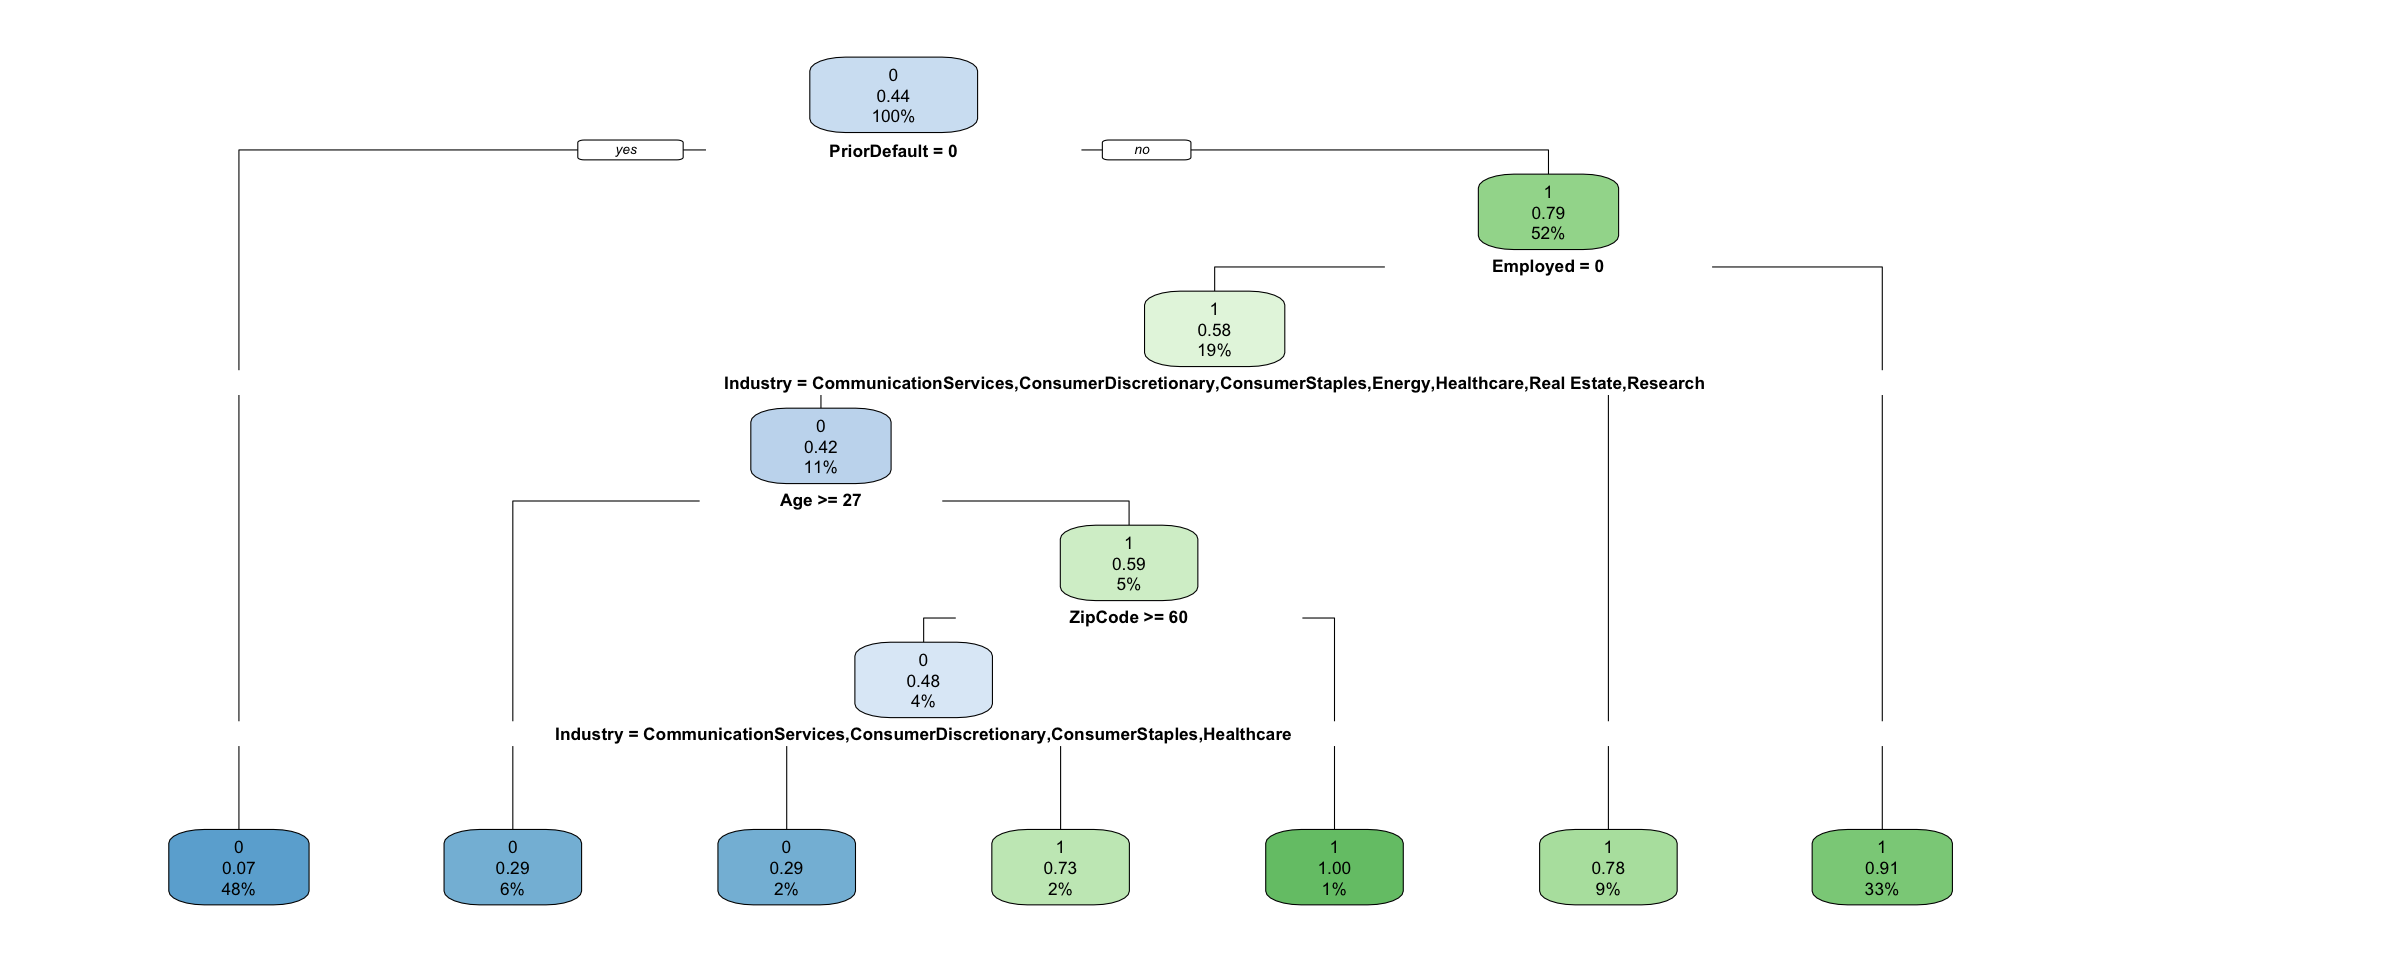

In [42]:
# Build the classification tree based on non-modified dataset- to answer 1st part of question which attributes are significant

credit_data$Gender <-factor(credit_data$Gender)
credit_data$Approved <- factor(credit_data$Approved)
credit_data$Married <-factor(credit_data$Married)
credit_data$BankCustomer <-factor(credit_data$BankCustomer)
credit_data$PriorDefault <-factor(credit_data$PriorDefault)
credit_data$Employed <-factor(credit_data$Employed)
credit_data$DriversLicense<-factor(credit_data$DriversLicense)
fit.tree=rpart(Approved ~.,data=credit_data,method="class",cp=0.008)
fit.tree
rpart.plot(fit.tree)
fit.tree$variable.importance
pred.tree=predict(fit.tree,credit_data,type="class")
table(pred.tree,credit_data$Approved)



## Neural Network

In [43]:
# This code provides the steps to build a neural net model from a principal component analysis which is built from a reduced set of variables from the Credit Approval data set.

# Read the data
credit_data <- read.csv("credit_dataset.csv")

# Create a new dataframe called `New_credit_data_nn`.
New_credit_data <- credit_data %>%
  dplyr::select(Debt,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved)
head(New_credit_data)


Debt  YearsEmployed PriorDefault Employed CreditScore Income Approved
1 0.000 1.25          1            1        1             0    1       
2 4.460 3.04          1            1        6           560    1       
3 0.500 1.50          1            0        0           824    1       
4 1.540 3.75          1            1        5             3    1       
5 5.625 1.71          1            0        0             0    1       
6 4.000 2.50          1            0        0             0    1

### Scaling Data for Neural Network

In [44]:

# Scale the 'Debt', 'YearsEmployed', 'CreditScore', and 'Income' variables
New_credit_data$Debt <- scale(New_credit_data$Debt)
New_credit_data$YearsEmployed <- scale(New_credit_data$YearsEmployed)
New_credit_data$CreditScore <- scale(New_credit_data$CreditScore)
New_credit_data$Income <-scale(New_credit_data$Income)
head(New_credit_data)


Debt       YearsEmployed PriorDefault Employed CreditScore Income     
1 -0.9559198 -0.29087163   1            1        -0.2878917  -0.19527168
2 -0.0600070  0.24401343   1            1         0.7402929  -0.08778820
3 -0.8554811 -0.21616701   1            0        -0.4935286  -0.03711741
4 -0.6465687  0.45617454   1            1         0.5346560  -0.19469588
5  0.1740151 -0.15341513   1            0        -0.4935286  -0.19527168
6 -0.1524106  0.08265146   1            0        -0.4935286  -0.19527168
  Approved
1 1       
2 1       
3 1       
4 1       
5 1       
6 1

In [45]:
# Split data into training and test set
set.seed(1)
sample <- sample(c(TRUE, FALSE), nrow(New_credit_data), replace=TRUE, prob=c(0.7, 0.3))
train <- New_credit_data[sample,]
test <- New_credit_data[!sample,]


### PCA Transformation

In [46]:

# Perform PCA on training set
PCA_data <- prcomp(train, scale=TRUE, center=TRUE)
summary(PCA_data)

# Select principal components that explain at least 90% of the variance in the data
var_explained = PCA_data$sdev^2 / sum(PCA_data$sdev^2)
var_explained
which(cumsum(var_explained) >= 0.9)

# The first 5 components explain at least 90% of the data. Create new data frame called `mydata_nn` using first 5 components
mydata <- data.frame(Class=train[,"Approved"], PCA_data$x[,1:5])



Importance of components:
                         PC1    PC2    PC3    PC4    PC5     PC6     PC7
Standard deviation     1.684 1.0187 0.9811 0.9020 0.8068 0.65691 0.51832
Proportion of Variance 0.405 0.1482 0.1375 0.1162 0.0930 0.06165 0.03838
Cumulative Proportion  0.405 0.5533 0.6908 0.8070 0.9000 0.96162 1.00000

[1] 0.40500246 0.14825127 0.13750708 0.11621650 0.09299616 0.06164643 0.03838009

[1] 6 7

In [47]:
# Train neural net on `mydata_nn`
model <- neuralnet(Class~., data=mydata, hidden=2, linear.output=FALSE)

# Make predictions on the test set
# First transform the test_nn data
test.p <- predict(PCA_data, newdata=test)

# Make predictions
pred <-predict(model, newdata=data.frame(test.p[,1:5]))

# Create a confusion matrix to test the performance of the neural net
predApproved <- factor(ifelse(pred >= 0.5,"1","0"))
confusionMatrix(data=as.factor(test$Approved), reference=predApproved, positive="1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 115   1
         1   0  88
                                         
               Accuracy : 0.9951         
                 95% CI : (0.973, 0.9999)
    No Information Rate : 0.5637         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.99           
                                         
 Mcnemar's Test P-Value : 1              
                                         
            Sensitivity : 0.9888         
            Specificity : 1.0000         
         Pos Pred Value : 1.0000         
         Neg Pred Value : 0.9914         
             Prevalence : 0.4363         
         Detection Rate : 0.4314         
   Detection Prevalence : 0.4314         
      Balanced Accuracy : 0.9944         
                                         
       'Positive' Class : 1              
                                         

### ROC for Neural Network

Setting levels: control = 0, case = 1

Setting direction: controls < cases



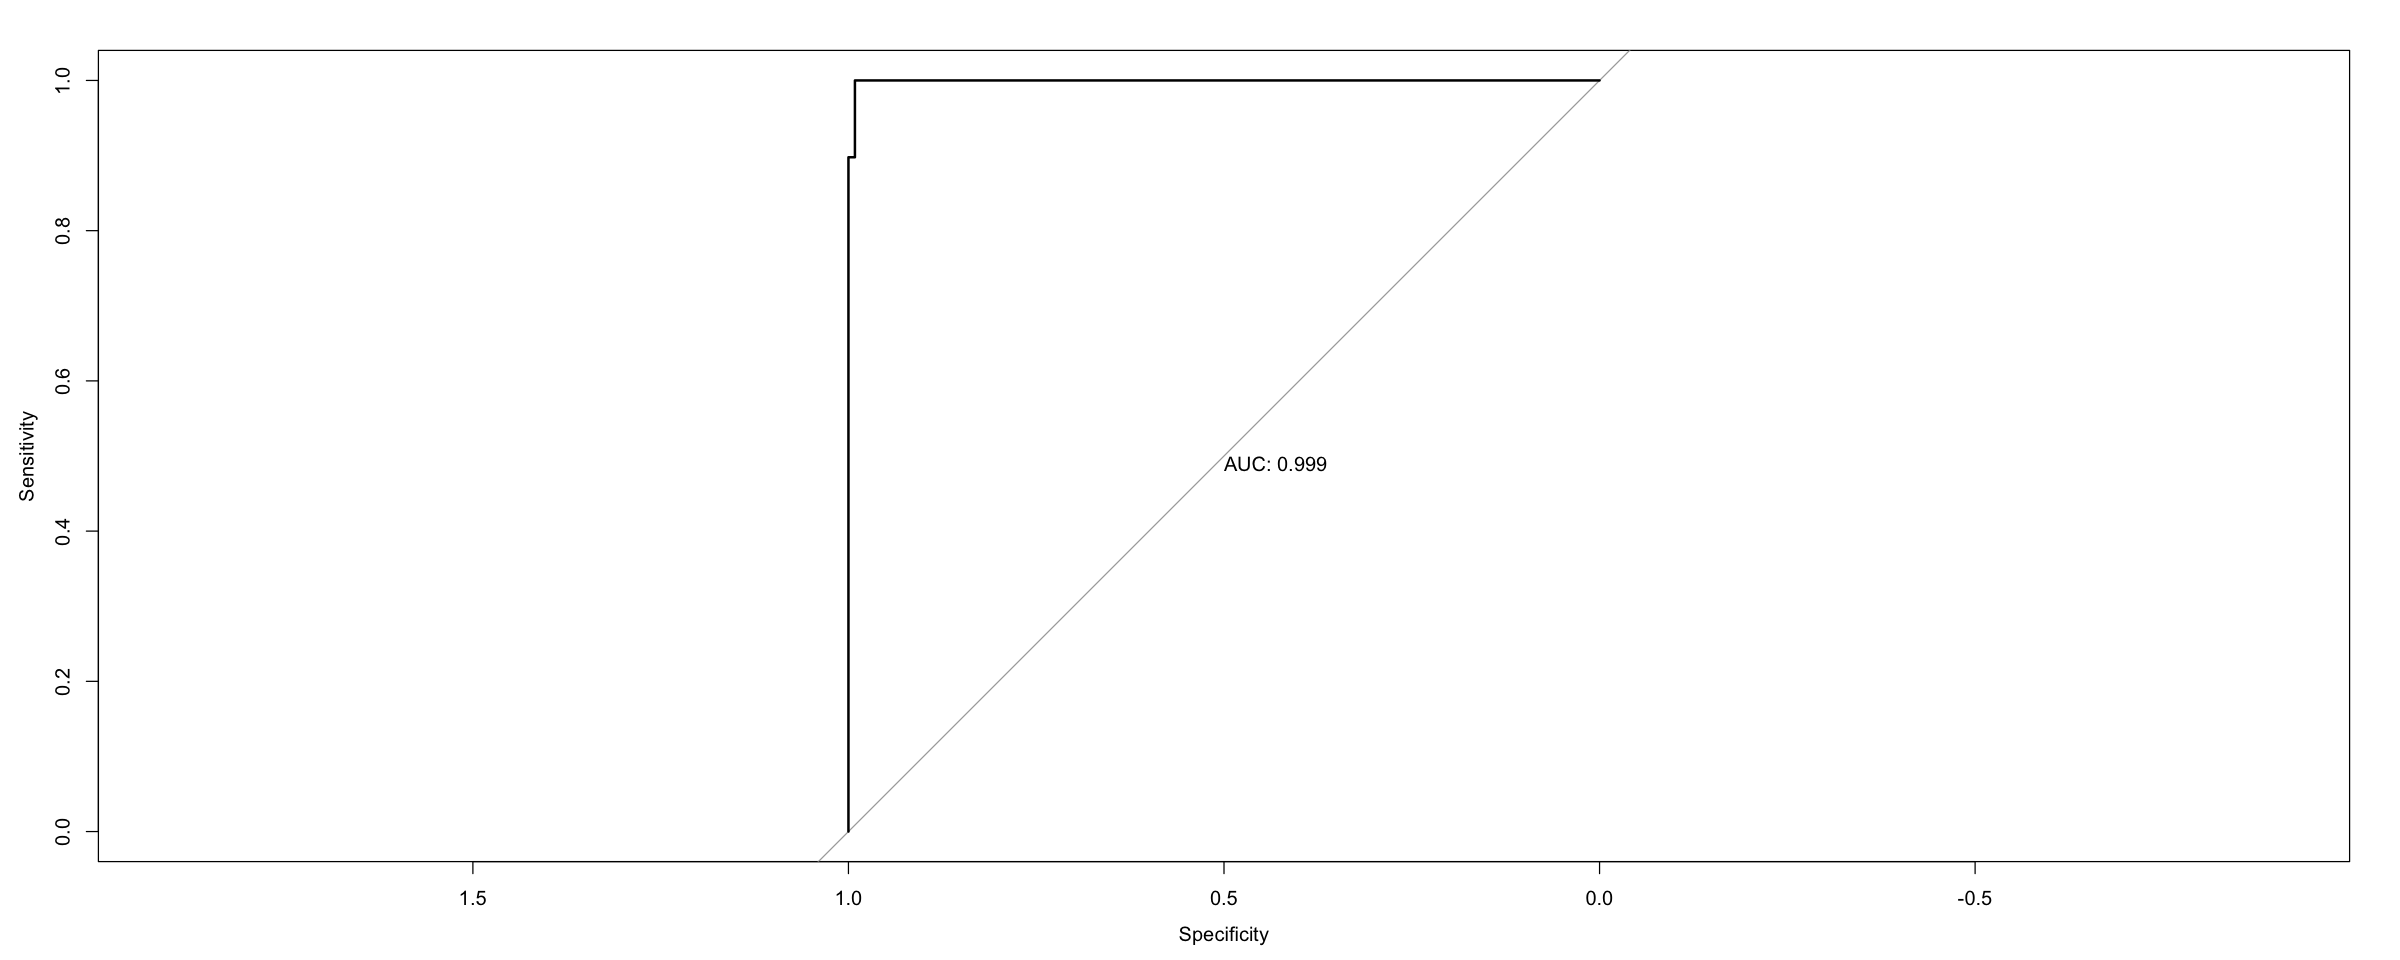

In [48]:
# Create an ROC curve and calculate the AUC
credit_roc <- roc(test$Approved, pred)
plot(credit_roc, print.auc=TRUE)

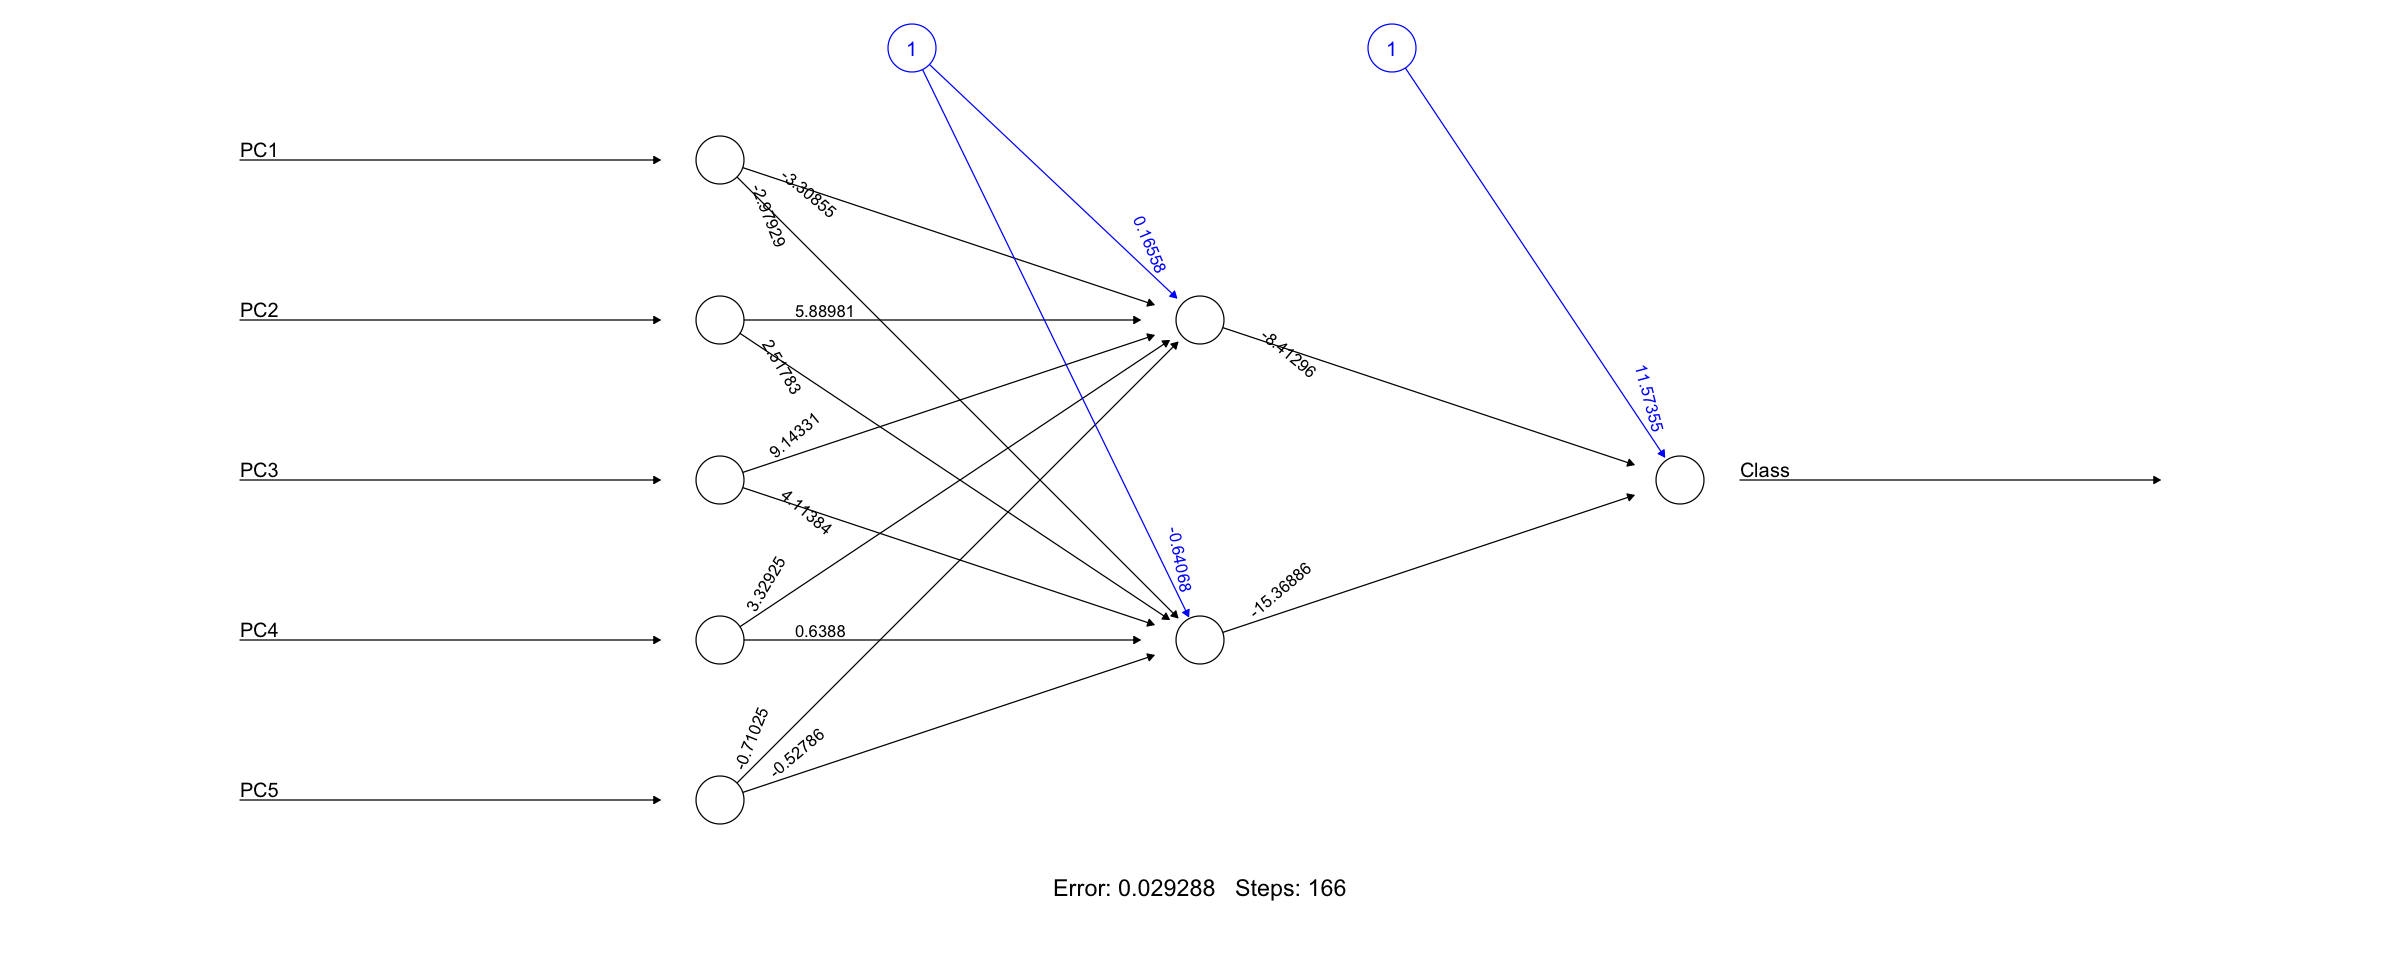

In [51]:
# plot neural network
plot(model, rep="best")